In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import VotingRegressor
from scipy.stats import probplot
import warnings
import seaborn as sns

In [62]:
file_path = 'C:/Users/ezequiel.oliveira/Documents/Data//Apendice_II_Banco_de_dados_monitoramento.xlsx'
file_path2 = 'C:/Users/ezequiel.oliveira/Documents/Data/Apendice_I_Planos_de_fogo.xlsx'


In [63]:
df = pd.read_excel(file_path, engine='openpyxl')


In [64]:
df['Data'] = df['Data'].dt.strftime('%d/%m/%Y')

In [65]:
# Renomear a coluna 'Q(kg)' para 'QKG'
df = df.rename(columns={
    'Q(kg)': 'Q_kg', #Q(kg)
    'PVS (mm/s)': 'PVS_mm_s', #PVS(mm/s)
    'D (m)': 'D_m', #D(m)
    ' Data': 'Data'
})

In [66]:
df

,Data,Pontos,Fogo,X,Y,Q_kg,D_m,PVS_mm_s
0,10/05/2016,1_2,1,665709,7774304,1250.0,105.60,21.53
1,10/05/2016,2_2,1,665857,7774394,1250.0,202.75,3.05
2,10/05/2016,3_2,1,665915,7774460,1250.0,289.37,8.70
3,10/05/2016,4_2,1,665972,7774527,1250.0,376.18,1.97
4,10/05/2016,5_2,1,666036,7774595,1250.0,474.25,1.71
...,...,...,...,...,...,...,...,...
74,13/05/2016,12_2,5,666453,7775069,1000.0,1126.11,0.25
75,13/05/2016,13_2,5,666500,7775138,1000.0,1211.76,51.68
76,13/05/2016,14_2,5,666588,7775231,1000.0,1335.82,0.32
77,13/05/2016,15_2,5,666610,7775403,1000.0,1481.30,0.32


In [67]:
df.columns

Index(['Data', 'Pontos', 'Fogo', 'X', 'Y', 'Q_kg', 'D_m', 'PVS_mm_s'], dtype='object')

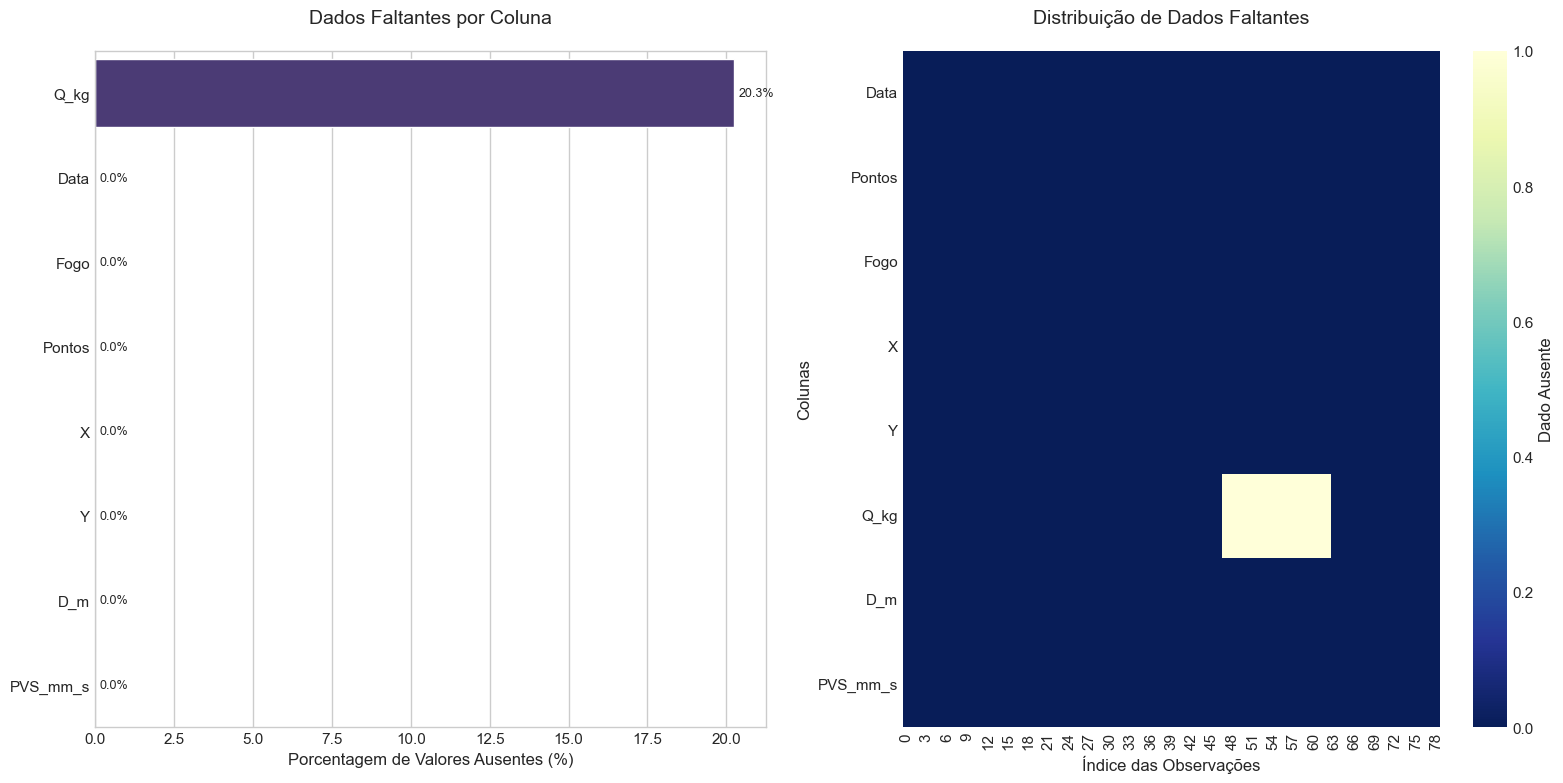


📊 Estatísticas de Dados Faltantes:
     Coluna  Nulos  Porcentagem (%)
5      Q_kg     16        20.253165
0      Data      0         0.000000
2      Fogo      0         0.000000
1    Pontos      0         0.000000
3         X      0         0.000000
4         Y      0         0.000000
6       D_m      0         0.000000
7  PVS_mm_s      0         0.000000


In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calcular estatísticas de dados faltantes
missing_data = df.isnull().sum().reset_index()
missing_data.columns = ['Coluna', 'Nulos']
missing_data['Porcentagem (%)'] = (missing_data['Nulos'] / len(df)) * 100

# 2. Configurar estilo visual
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')

# 3. Criar visualização
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# Gráfico de barras (porcentagem de faltantes)
bars = sns.barplot(
    x='Porcentagem (%)', 
    y='Coluna', 
    data=missing_data.sort_values('Porcentagem (%)', ascending=False),
    ax=ax1
)
ax1.set_title('Dados Faltantes por Coluna', fontsize=14, pad=20)
ax1.set_xlabel('Porcentagem de Valores Ausentes (%)', fontsize=12)
ax1.set_ylabel('')
ax1.bar_label(bars.containers[0], fmt='%.1f%%', padding=3, fontsize=9)

# Mapa de calor (distribuição de faltantes)
sns.heatmap(
    df.isnull().transpose(),  # Transpor para melhor visualização
    cmap='YlGnBu_r',
    cbar_kws={'label': 'Dado Ausente'},
    ax=ax2
)
ax2.set_title('Distribuição de Dados Faltantes', fontsize=14, pad=20)
ax2.set_xlabel('Índice das Observações', fontsize=12)
ax2.set_ylabel('Colunas', fontsize=12)
ax2.set_yticklabels(ax2.get_yticklabels(), rotation=0)

plt.tight_layout()
plt.show()

# 4. Retornar estatísticas numéricas
print("\n📊 Estatísticas de Dados Faltantes:")
print(missing_data.sort_values('Porcentagem (%)', ascending=False))

Dados Faltantes por Coluna:
     Coluna  Nulos  Porcentagem (%)
0      Data      0         0.000000
1    Pontos      0         0.000000
2      Fogo      0         0.000000
3         X      0         0.000000
4         Y      0         0.000000
5      Q_kg     16        20.253165
6       D_m      0         0.000000
7  PVS_mm_s      0         0.000000


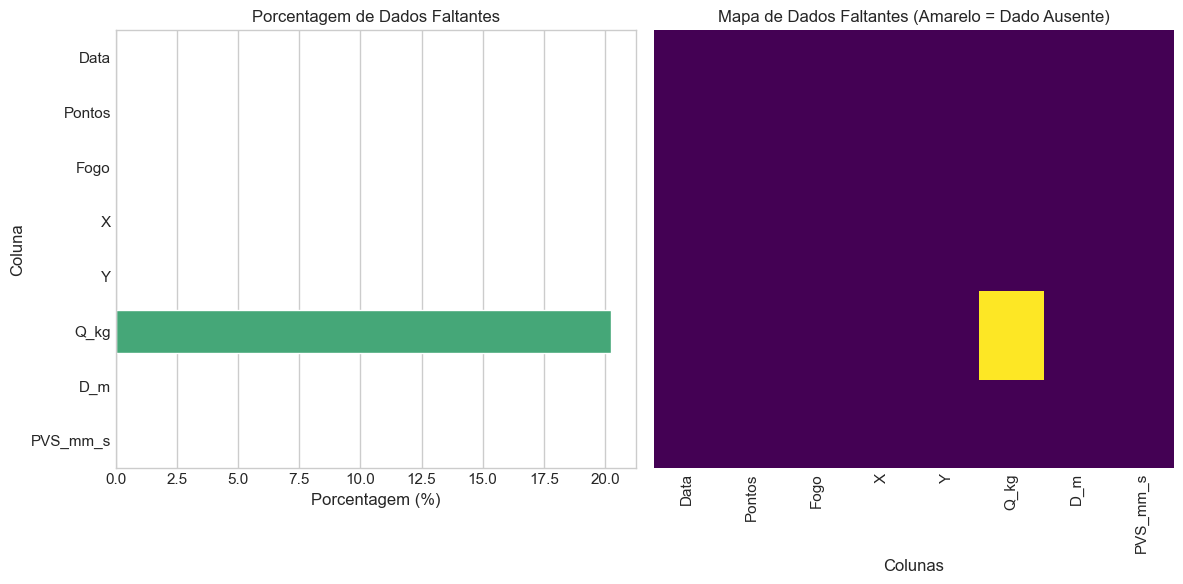

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supondo que seu DataFrame se chame 'df'
colunas = ['Data', 'Pontos', 'Fogo', 'X', 'Y', 'Q_kg', 'D_m', 'PVS_mm_s']

# 1. Análise quantitativa de dados faltantes
dados_faltantes = df[colunas].isnull().sum().reset_index()
dados_faltantes.columns = ['Coluna', 'Nulos']
dados_faltantes['Porcentagem (%)'] = (dados_faltantes['Nulos'] / len(df)) * 100

print("Dados Faltantes por Coluna:")
print(dados_faltantes)

# 2. Visualização Gráfica
plt.figure(figsize=(12, 6))

# Gráfico de Barras
plt.subplot(1, 2, 1)
sns.barplot(
    x='Porcentagem (%)', 
    y='Coluna', 
    data=dados_faltantes, 
    palette='viridis'
)
plt.title('Porcentagem de Dados Faltantes')
plt.xlabel('Porcentagem (%)')
plt.ylabel('Coluna')

# Mapa de Calor (Heatmap)
plt.subplot(1, 2, 2)
sns.heatmap(
    df[colunas].isnull(), 
    cbar=False, 
    cmap='viridis',
    yticklabels=False
)
plt.title('Mapa de Dados Faltantes (Amarelo = Dado Ausente)')
plt.xlabel('Colunas')

plt.tight_layout()
plt.show()

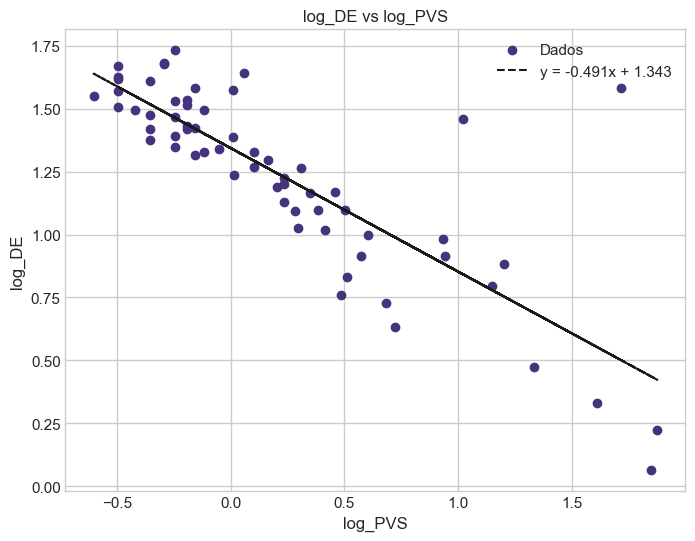

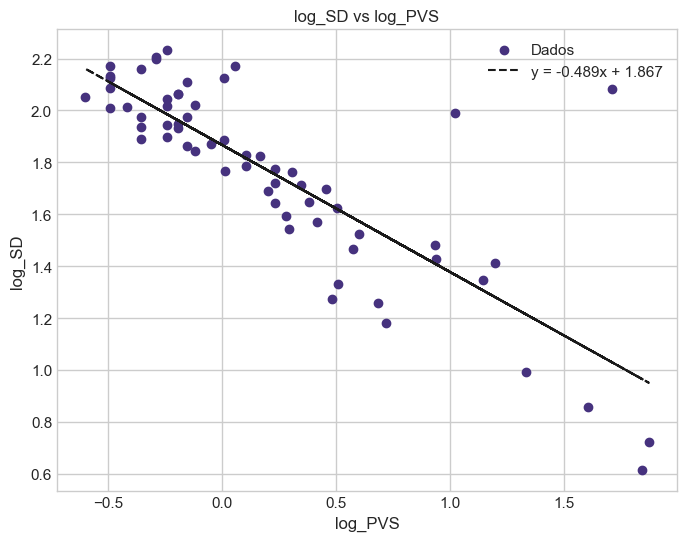

In [70]:
# Step 1: Preprocess the data
# Assume df is already loaded from your Excel file
# Filter out invalid rows (non-positive values)
valid_data = df[(df['PVS_mm_s'] > 0) & (df['D_m'] > 0)].copy()

# Cálculo do Diâmetro Equivalente (DE)
valid_data = valid_data[valid_data['Q_kg'] > 0]
valid_data['DE'] = valid_data['D_m'] / (valid_data['Q_kg'] ** 0.5)
valid_data['SD'] = valid_data['D_m'] / (valid_data['Q_kg'] ** (1/3))

# Logaritmos
# Log-Transformed Linear Regression - Prepare log-transformed columns for modeling
# Ensure these are calculated before filtering if they are used in the filter criteria later
valid_data['log_DE'] = np.log10(valid_data['DE'])
valid_data['log_SD'] = np.log10(valid_data['SD'])
valid_data['log_PVS'] = np.log10(valid_data['PVS_mm_s'])

# Filtragem de dados válidos for log transformation
# This step should now be safer as SD, log_SD and log_PVS are already calculated
valid_data = valid_data.dropna(subset=['log_DE', 'log_SD', 'SD', 'DE', 'log_PVS']).copy()


# Plot do gráfico similar ao do Excel (scatter + linha de tendência)
plt.figure(figsize=(8, 6))
plt.scatter(valid_data['log_PVS'], valid_data['log_DE'], label='Dados')

# Ajuste de linha de tendência
coef = np.polyfit(valid_data['log_PVS'], valid_data['log_DE'], 1)
poly1d_fn = np.poly1d(coef)
plt.plot(valid_data['log_PVS'], poly1d_fn(valid_data['log_PVS']),
         '--k', label=f'y = {coef[0]:.3f}x + {coef[1]:.3f}')

plt.title('log_DE vs log_PVS')
plt.xlabel('log_PVS')
plt.ylabel('log_DE')
plt.grid(True)
plt.legend()
plt.show()

# Plot do gráfico similar ao do Excel (scatter + linha de tendência)
plt.figure(figsize=(8, 6))
plt.scatter(valid_data['log_PVS'], valid_data['log_SD'], label='Dados')

# Ajuste de linha de tendência
coef = np.polyfit(valid_data['log_PVS'], valid_data['log_SD'], 1)
poly1d_fn = np.poly1d(coef)
plt.plot(valid_data['log_PVS'], poly1d_fn(valid_data['log_PVS']),
         '--k', label=f'y = {coef[0]:.3f}x + {coef[1]:.3f}')

plt.title('log_SD vs log_PVS')
plt.xlabel('log_PVS')
plt.ylabel('log_SD')
plt.grid(True)
plt.legend()
plt.show()

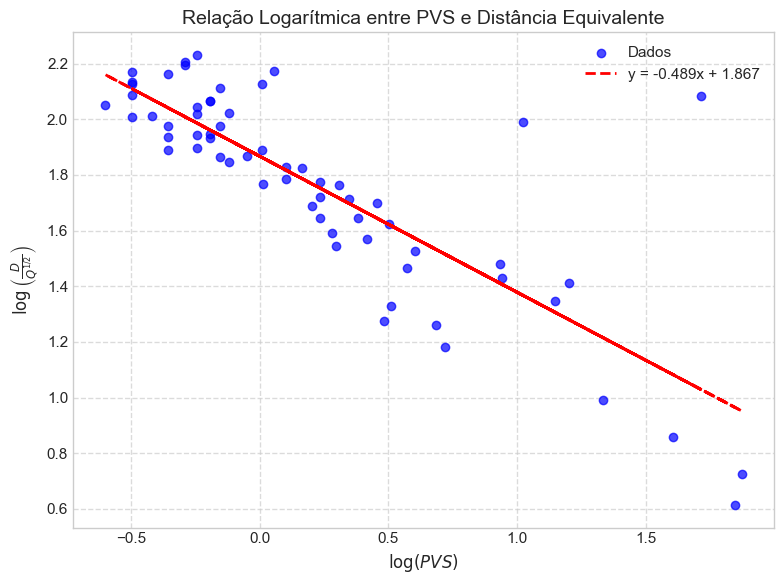

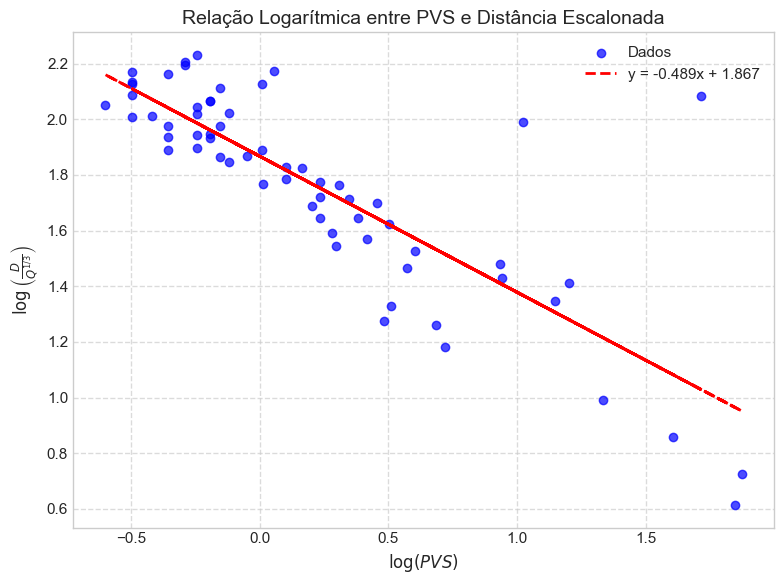

In [71]:
import numpy as np
import matplotlib.pyplot as plt

# ---------- log_SD vs log_PVS ----------
plt.figure(figsize=(8, 6))
plt.scatter(valid_data['log_PVS'], valid_data['log_SD'],
            color='blue', alpha=0.7, label='Dados')

# Fit regression line
coef_de = np.polyfit(valid_data['log_PVS'], valid_data['log_SD'], 1)
poly1d_fn_de = np.poly1d(coef_de)

plt.plot(valid_data['log_PVS'], poly1d_fn_de(valid_data['log_PVS']),
         '--', color='red', linewidth=2,
         label=f'y = {coef_de[0]:.3f}x + {coef_de[1]:.3f}')

plt.title('Relação Logarítmica entre PVS e Distância Equivalente', fontsize=14)
plt.xlabel(r'$\log(PVS)$', fontsize=12)
plt.ylabel(r'$\log\left(\frac{D}{Q^{1/2}}\right)$', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()

# ---------- log_SD vs log_PVS ----------
plt.figure(figsize=(8, 6))
plt.scatter(valid_data['log_PVS'], valid_data['log_SD'],
            color='blue', alpha=0.7, label='Dados')

# Fit regression line
coef_sd = np.polyfit(valid_data['log_PVS'], valid_data['log_SD'], 1)
poly1d_fn_sd = np.poly1d(coef_sd)

plt.plot(valid_data['log_PVS'], poly1d_fn_sd(valid_data['log_PVS']),
         '--', color='red', linewidth=2,
         label=f'y = {coef_sd[0]:.3f}x + {coef_sd[1]:.3f}')

plt.title('Relação Logarítmica entre PVS e Distância Escalonada', fontsize=14)
plt.xlabel(r'$\log(PVS)$', fontsize=12)
plt.ylabel(r'$\log\left(\frac{D}{Q^{1/3}}\right)$', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=11)
plt.tight_layout()
plt.show()


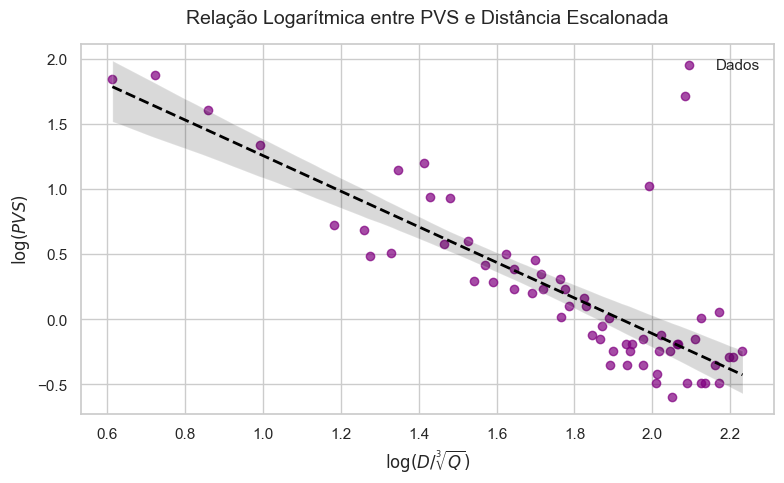

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming valid_data has 'log_SD' and 'log_PVS' columns
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))

# Scatter plot with label
plt.scatter(valid_data['log_SD'], valid_data['log_PVS'],
            color='purple', alpha=0.7, label='Dados')

# Fit regression line manually for equation
coef = np.polyfit(valid_data['log_SD'], valid_data['log_PVS'], 1)
poly_fn = np.poly1d(coef)

# Plot regression line with CI from seaborn
sns.regplot(
    x='log_SD', y='log_PVS', data=valid_data,
    scatter=False,  # don't double-plot points
    line_kws={'color': 'black', 'linestyle': '--', 'linewidth': 2,
              'label': f'y = {coef[0]:.3f}x + {coef[1]:.3f}'},
    ci=95
)

# Titles and labels
plt.title('Relação Logarítmica entre PVS e Distância Escalonada', fontsize=14, pad=15)
plt.xlabel(r'$\log(D/\sqrt[3]{Q})$', fontsize=12)
plt.ylabel(r'$\log(PVS)$', fontsize=12)

# Legend
plt.legend(fontsize=11)

plt.tight_layout()
plt.show()


In [73]:
import plotly.express as px

# Create the scatter plot with trendline
fig = px.scatter(
    valid_data,
    x='log_PVS',
    y='log_SD',
    trendline="ols",  # Ordinary Least Squares (linear) trendline
    labels={'log_PVS': 'log(PVS)', 'log_SD': 'log(SD)'},
    title='log_SD vs log_PVS with Trendline (hover to inspect)',
    hover_data=['log_PVS', 'log_SD']  # Optional: Add more columns if needed
)


# Update layout (adjust height/width as needed)
fig.update_layout(
    height=600,
    width=1000,
    showlegend=True,
    legend_title_text='Legend'
)

# Show the figure
fig.show()


# Create the scatter plot with trendline
fig = px.scatter(
    valid_data,
    x='log_PVS',
    y='log_DE',
    trendline="ols",  # Ordinary Least Squares (linear) trendline
    labels={'log_PVS': 'log(PVS)', 'log_DE': 'log(DE)'},
    title='log_DE vs log_PVS with Trendline (hover to inspect)',
    hover_data=['log_PVS', 'log_SD']  # Optional: Add more columns if needed
)


# Update layout (adjust height/width as needed)
fig.update_layout(
    height=600,
    width=1000,
    showlegend=True,
    legend_title_text='Legend'
)

# Show the figure
fig.show()

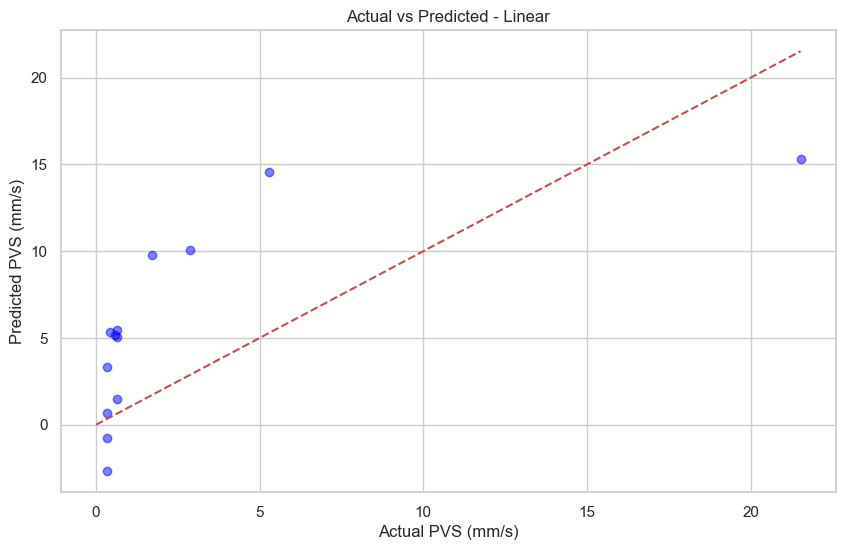

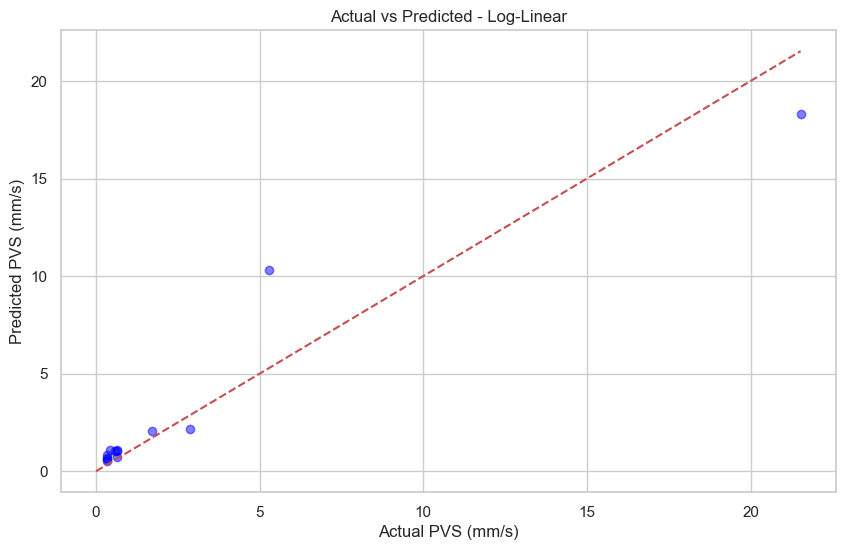

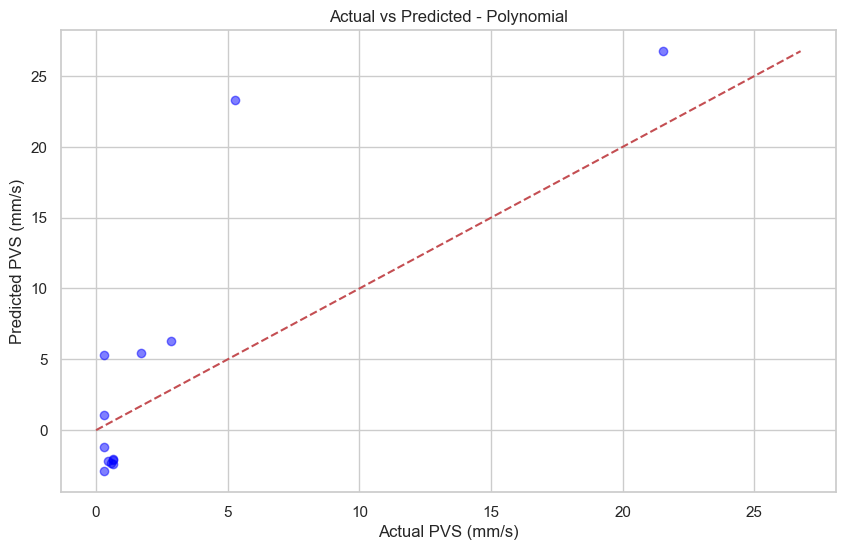

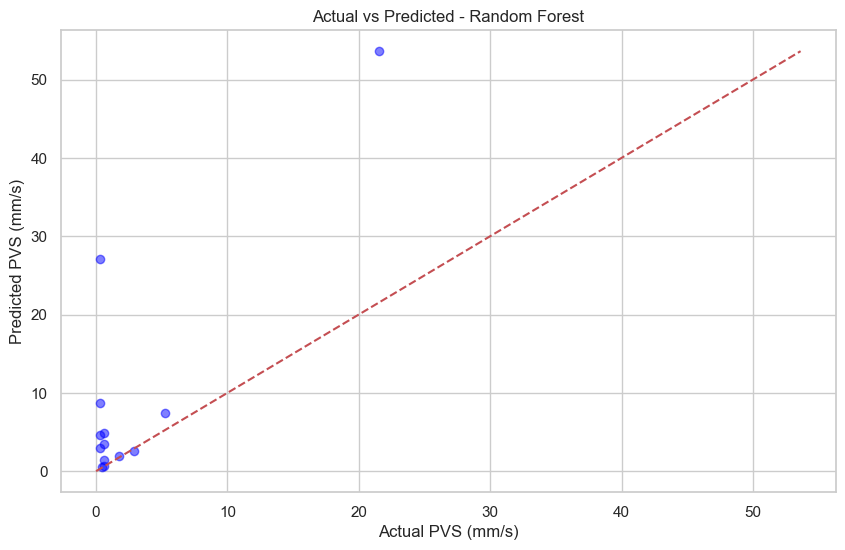

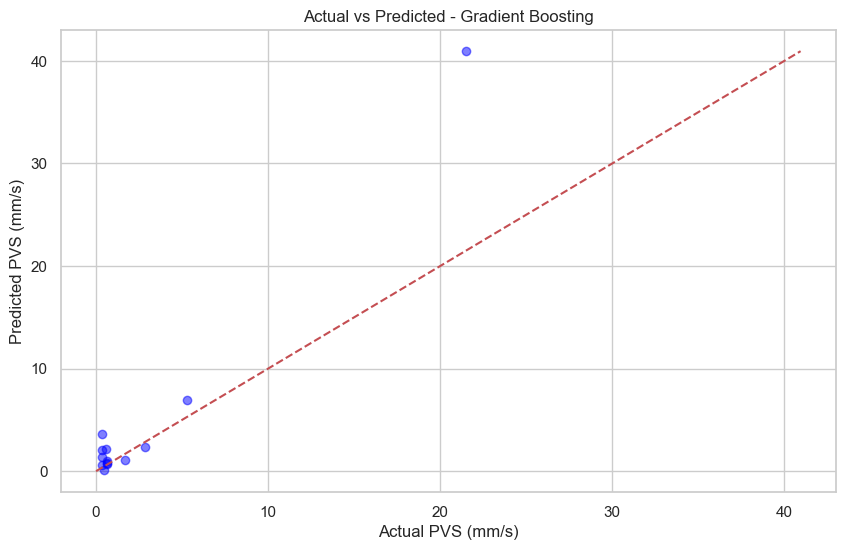

Model Performance Metrics:
Linear: MAE = 4.4546, R2 = 0.1379
Log-Linear: MAE = 0.9698, R2 = 0.9078
Polynomial: MAE = 4.2095, R2 = -0.1172
Random Forest: MAE = 6.5321, R2 = -3.6016
Gradient Boosting: MAE = 2.3913, R2 = 0.0211

Best Model (lowest MAE): Log-Linear
Ensemble: MAE = 2.6464, R2 = 0.5173


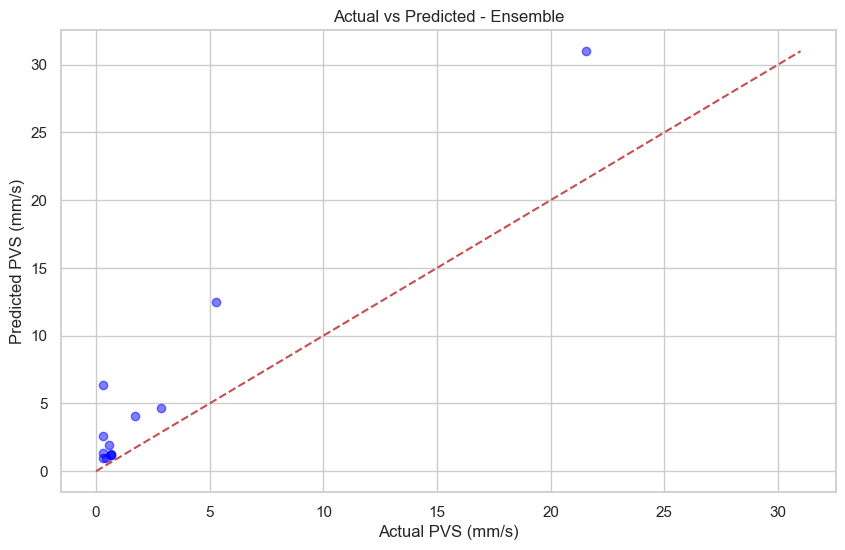

In [74]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Preprocess the data
# Assume df is already loaded from your Excel file
# Filter out invalid rows (non-positive values)
valid_data = df[(df['PVS_mm_s'] > 0) & (df['Q_kg'] > 0) & (df['D_m'] > 0)].copy()

# Calculate Scaled Distance (SD) if it doesn't exist
if 'SD' not in valid_data.columns:
    valid_data['SD'] = valid_data['D_m'] / (valid_data['Q_kg'] ** (1/3))

# Create log-transformed features
valid_data['log_SD'] = np.log10(valid_data['SD'])
valid_data['log_PVS'] = np.log10(valid_data['PVS_mm_s'])

# Step 2: Split the data into training and testing sets
train_indices, test_indices = train_test_split(valid_data.index, test_size=0.2, random_state=42)

# Step 3: Define and train five regression models
predictions = {}
metrics = {}

# Linear Regression
X_lin_train = valid_data.loc[train_indices, ['SD']]
X_lin_test = valid_data.loc[test_indices, ['SD']]
y_train = valid_data.loc[train_indices, 'PVS_mm_s']
y_test = valid_data.loc[test_indices, 'PVS_mm_s']

lr = LinearRegression()
lr.fit(X_lin_train, y_train)
y_pred_lr = lr.predict(X_lin_test)

predictions['Linear'] = y_pred_lr
metrics['Linear'] = {
    'MAE': mean_absolute_error(y_test, y_pred_lr),
    'R2': r2_score(y_test, y_pred_lr)
}

# Log-Transformed Linear Regression
X_log_train = valid_data.loc[train_indices, ['log_SD']]
X_log_test = valid_data.loc[test_indices, ['log_SD']]
y_log_train = valid_data.loc[train_indices, 'log_PVS']

lr_log = LinearRegression()
lr_log.fit(X_log_train, y_log_train)
y_pred_log = lr_log.predict(X_log_test)
y_pred_PVS_log = 10 ** y_pred_log  # Back-transform to original scale

predictions['Log-Linear'] = y_pred_PVS_log
metrics['Log-Linear'] = {
    'MAE': mean_absolute_error(y_test, y_pred_PVS_log),
    'R2': r2_score(y_test, y_pred_PVS_log)
}

# Polynomial Regression (degree 2)
# Create polynomial features AFTER splitting
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(valid_data.loc[train_indices, ['SD']])
X_poly_test = poly.transform(valid_data.loc[test_indices, ['SD']])

lr_poly = LinearRegression()
lr_poly.fit(X_poly_train, y_train)
y_pred_poly = lr_poly.predict(X_poly_test)

predictions['Polynomial'] = y_pred_poly
metrics['Polynomial'] = {
    'MAE': mean_absolute_error(y_test, y_pred_poly),
    'R2': r2_score(y_test, y_pred_poly)
}

# Random Forest Regression
X_rf_train = valid_data.loc[train_indices, ['D_m', 'Q_kg']]
X_rf_test = valid_data.loc[test_indices, ['D_m', 'Q_kg']]

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_rf_train, y_train)
y_pred_rf = rf.predict(X_rf_test)

predictions['Random Forest'] = y_pred_rf
metrics['Random Forest'] = {
    'MAE': mean_absolute_error(y_test, y_pred_rf),
    'R2': r2_score(y_test, y_pred_rf)
}

# Gradient Boosting Regression
X_gb_train = valid_data.loc[train_indices, ['D_m', 'Q_kg']]
X_gb_test = valid_data.loc[test_indices, ['D_m', 'Q_kg']]

gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_gb_train, y_train)
y_pred_gb = gb.predict(X_gb_test)

predictions['Gradient Boosting'] = y_pred_gb
metrics['Gradient Boosting'] = {
    'MAE': mean_absolute_error(y_test, y_pred_gb),
    'R2': r2_score(y_test, y_pred_gb)
}

# Step 4: Save predictions in separate columns
for model_name, y_pred in predictions.items():
    valid_data.loc[test_indices, f'PVS_pred_{model_name}'] = y_pred

# Step 5: Create plots for each model
def plot_actual_vs_predicted(y_true, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, color='blue', alpha=0.5)
    plt.xlabel('Actual PVS (mm/s)')
    plt.ylabel('Predicted PVS (mm/s)')
    plt.title(title)
    max_val = max(y_true.max(), y_pred.max())
    plt.plot([0, max_val], [0, max_val], 'r--')
    plt.grid(True)
    plt.show()

for model_name, y_pred in predictions.items():
    plot_actual_vs_predicted(y_test, y_pred, f'Actual vs Predicted - {model_name}')

# Step 6: Evaluate and select the best model
print("Model Performance Metrics:")
for model, metric in metrics.items():
    print(f"{model}: MAE = {metric['MAE']:.4f}, R2 = {metric['R2']:.4f}")

best_model = min(metrics, key=lambda x: metrics[x]['MAE'])
print(f"\nBest Model (lowest MAE): {best_model}")

# Step 7: Create an ensemble regressor (average of all predictions)
ensemble_pred = np.mean(list(predictions.values()), axis=0)
metrics['Ensemble'] = {
    'MAE': mean_absolute_error(y_test, ensemble_pred),
    'R2': r2_score(y_test, ensemble_pred)
}
valid_data.loc[test_indices, 'PVS_pred_Ensemble'] = ensemble_pred

print(f"Ensemble: MAE = {metrics['Ensemble']['MAE']:.4f}, R2 = {metrics['Ensemble']['R2']:.4f}")
plot_actual_vs_predicted(y_test, ensemble_pred, 'Actual vs Predicted - Ensemble')

# Step 8: Save results
valid_data.to_excel('blast_vibration_predictions.xlsx', index=False)

SD-Specific Log-Transformed Linear Regression Results:
Estimated K for SD: 364.5913
Estimated alpha for SD: -1.3100
MAE for SD (Original Scale): 0.9698
R² for SD (Original Scale): 0.9078


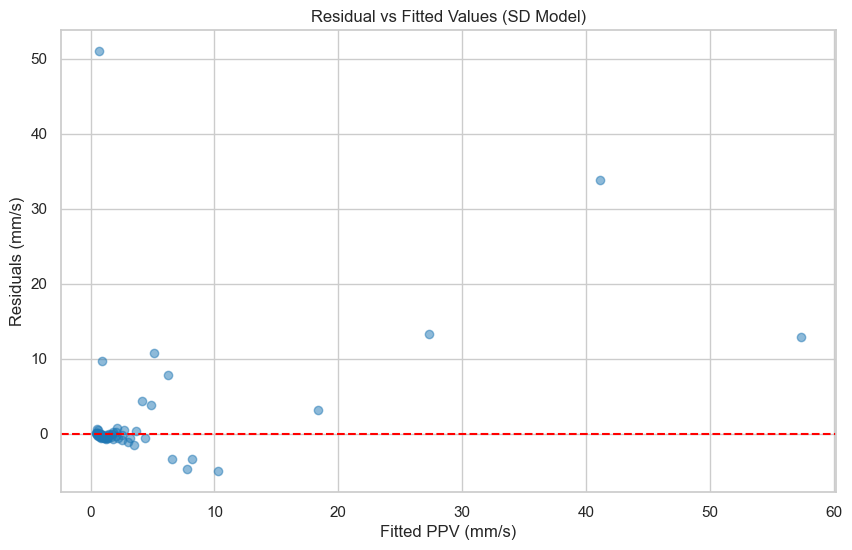

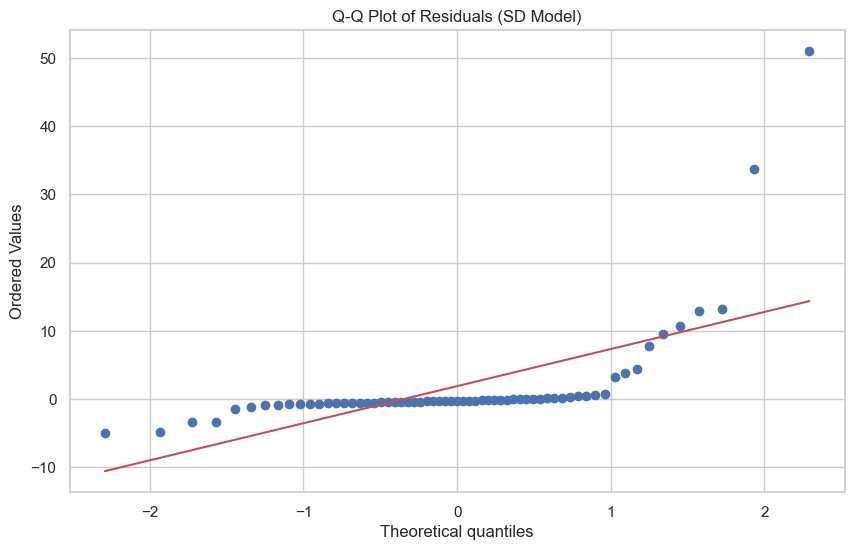

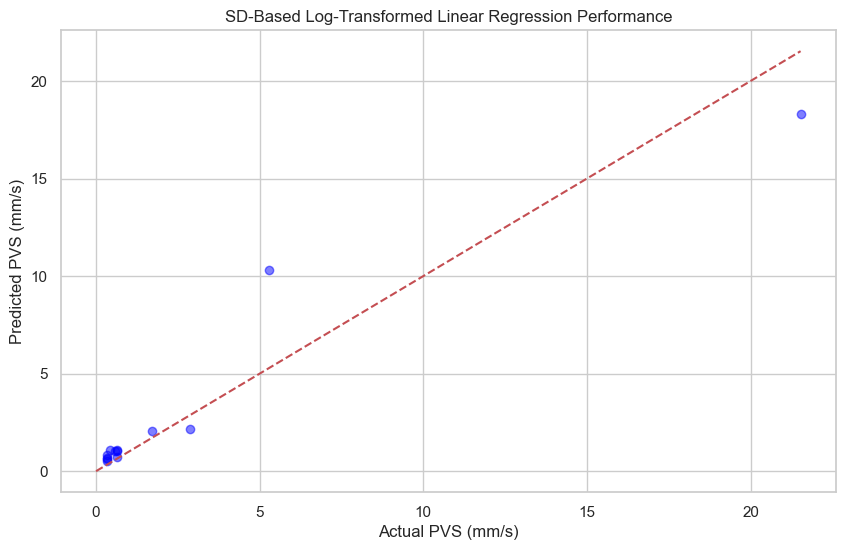

In [75]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from scipy.stats import probplot

# Assume df is already loaded with columns PVS_mm_s, D_m, Q_kg
# Step 1: Preprocess the data
valid_data = df[(df['PVS_mm_s'] > 0) & (df['Q_kg'] > 0) & (df['D_m'] > 0)].copy()

# Calculate Scaled Distance (SD) if it doesn't exist
if 'SD' not in valid_data.columns:
    valid_data['SD'] = valid_data['D_m'] / (valid_data['Q_kg'] ** (1/3))

# Create log-transformed features
valid_data['log_SD'] = np.log10(valid_data['SD'])
valid_data['log_PVS'] = np.log10(valid_data['PVS_mm_s'])

# Handle any NaN or infinite values
valid_data = valid_data.dropna(subset=['log_SD', 'log_PVS'])
valid_data = valid_data[np.isfinite(valid_data['log_SD']) & np.isfinite(valid_data['log_PVS'])]

# Step 2: Split the data into training and testing sets
# Optional: Add stratification if desired
# valid_data['PVS_bins'] = pd.qcut(valid_data['PVS_mm_s'], q=5, labels=False, duplicates='drop')
# train_indices, test_indices = train_test_split(valid_data.index, test_size=0.2, random_state=42, stratify=valid_data['PVS_bins'])
train_indices, test_indices = train_test_split(valid_data.index, test_size=0.2, random_state=42)

# Step 3: SD-specific Log-Transformed Linear Regression
X_train_sd = valid_data.loc[train_indices, ['log_SD']]
X_test_sd = valid_data.loc[test_indices, ['log_SD']]
y_train_sd = valid_data.loc[train_indices, 'log_PVS']
y_test_sd = valid_data.loc[test_indices, 'log_PVS']
y_test_sd_actual = valid_data.loc[test_indices, 'PVS_mm_s']

# Train the model
lr_sd = LinearRegression()
lr_sd.fit(X_train_sd, y_train_sd)

# Predict in log scale and transform back
y_pred_sd_log = lr_sd.predict(X_test_sd)
y_pred_sd = 10 ** y_pred_sd_log  # Back-transform prediction to original scale

# Calculate metrics on original scale
mae_sd = mean_absolute_error(y_test_sd_actual, y_pred_sd)
r2_sd = r2_score(y_test_sd_actual, y_pred_sd)

# Calculate K and alpha
K_sd = 10 ** lr_sd.intercept_
alpha_sd = lr_sd.coef_[0]

# Print results
print("SD-Specific Log-Transformed Linear Regression Results:")
print(f"Estimated K for SD: {K_sd:.4f}")
print(f"Estimated alpha for SD: {alpha_sd:.4f}")
print(f"MAE for SD (Original Scale): {mae_sd:.4f}")
print(f"R² for SD (Original Scale): {r2_sd:.4f}")

# Step 4: Residual Diagnostics (optional, for consistency with previous code)
valid_data['log_PVS_pred'] = lr_sd.predict(valid_data[['log_SD']])
valid_data['PVS_pred'] = 10 ** valid_data['log_PVS_pred']
valid_data['Residuals'] = valid_data['PVS_mm_s'] - valid_data['PVS_pred']

# Residual vs Fitted Plot
plt.figure(figsize=(10, 6))
plt.scatter(valid_data['PVS_pred'], valid_data['Residuals'], alpha=0.5, color='#1f77b4')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted PPV (mm/s)')
plt.ylabel('Residuals (mm/s)')
plt.title('Residual vs Fitted Values (SD Model)')
plt.grid(True)
plt.show()

# Q-Q Plot for Normality
plt.figure(figsize=(10, 6))
probplot(valid_data['Residuals'], plot=plt)
plt.title('Q-Q Plot of Residuals (SD Model)')
plt.show()

# Plotting actual vs predicted (as in your original code)
plt.figure(figsize=(10, 6))
plt.scatter(y_test_sd_actual, y_pred_sd, color='blue', alpha=0.5)
plt.xlabel('Actual PVS (mm/s)')
plt.ylabel('Predicted PVS (mm/s)')
plt.title('SD-Based Log-Transformed Linear Regression Performance')
max_val = max(y_test_sd_actual.max(), y_pred_sd.max())
plt.plot([0, max_val], [0, max_val], 'r--')
plt.grid(True)
plt.show()

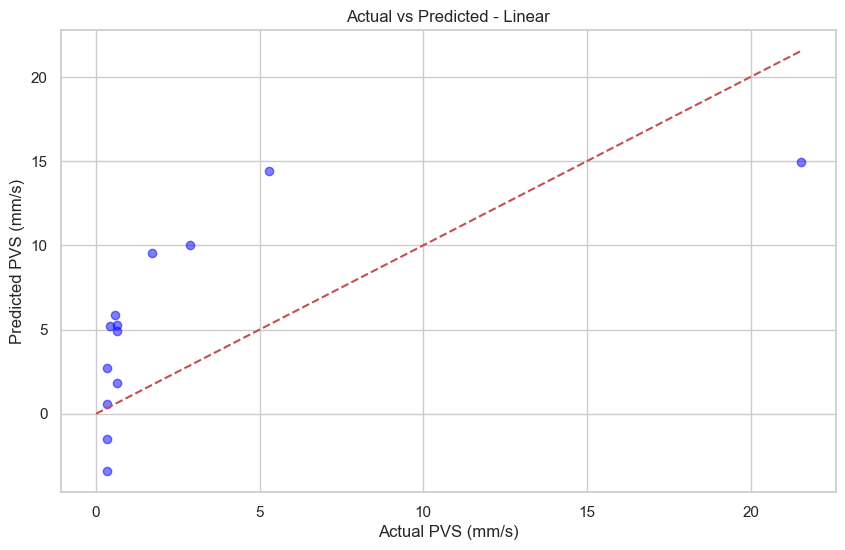

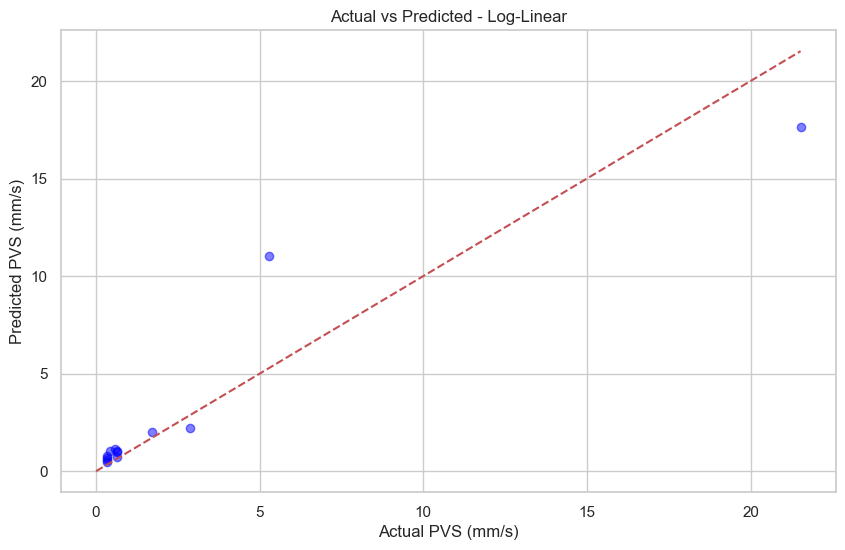

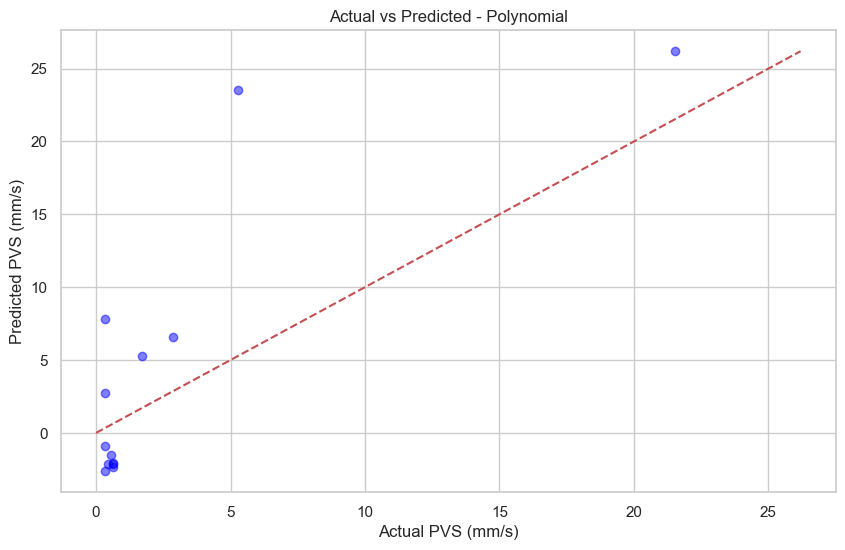

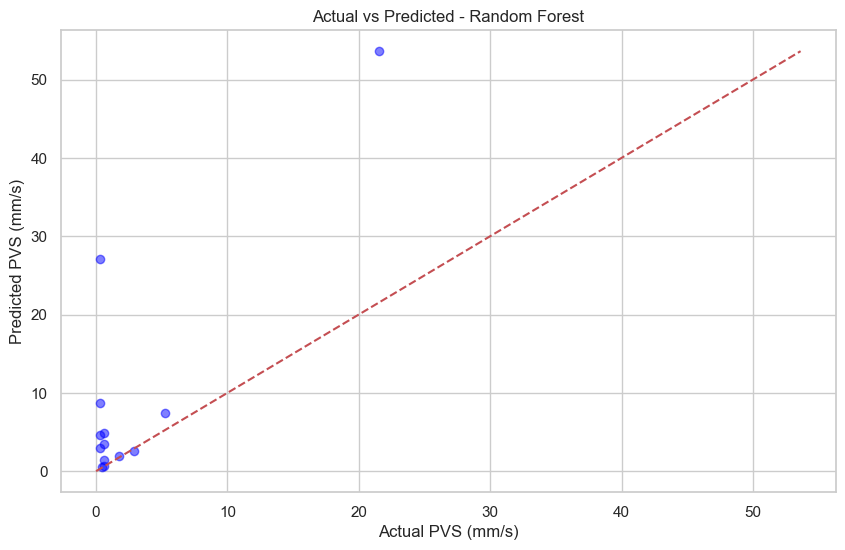

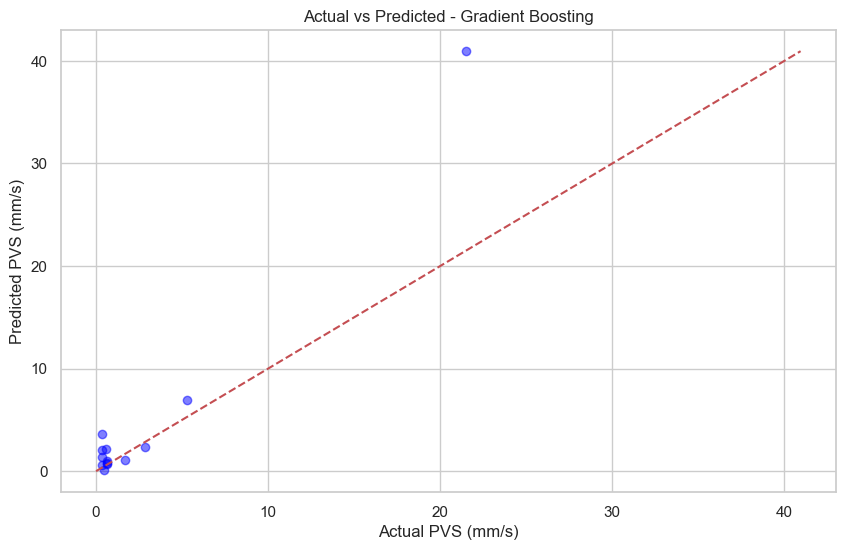

Model Performance Metrics:
Linear: MAE = 4.5425, R2 = 0.1303
Log-Linear: MAE = 1.0595, R2 = 0.8776
Polynomial: MAE = 4.4147, R2 = -0.1976
Random Forest: MAE = 6.5321, R2 = -3.6016
Gradient Boosting: MAE = 2.3913, R2 = 0.0211

Best Model (lowest MAE): Log-Linear
Ensemble: MAE = 2.6883, R2 = 0.5146


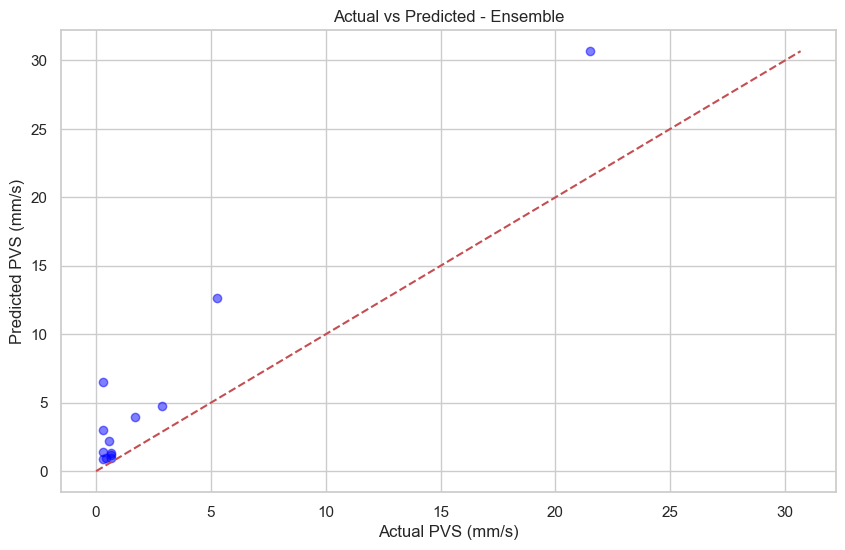

In [76]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Step 1: Preprocess the data
# Assume df is already loaded from your Excel file
# Filter out invalid rows (non-positive values)
valid_data = df[(df['PVS_mm_s'] > 0) & (df['Q_kg'] > 0) & (df['D_m'] > 0)].copy()

# Calculate Distance per Explosive (DE) if it doesn't exist
if 'DE' not in valid_data.columns:
    valid_data['DE'] = valid_data['D_m'] / (valid_data['Q_kg'] ** 0.5)

# Create log-transformed features
valid_data['log_DE'] = np.log10(valid_data['DE'])
valid_data['log_PVS'] = np.log10(valid_data['PVS_mm_s'])

# Step 2: Split the data into training and testing sets
train_indices, test_indices = train_test_split(valid_data.index, test_size=0.2, random_state=42)

# Step 3: Define and train five regression models
predictions = {}
metrics = {}

# Linear Regression
X_lin_train = valid_data.loc[train_indices, ['DE']]
X_lin_test = valid_data.loc[test_indices, ['DE']]
y_train = valid_data.loc[train_indices, 'PVS_mm_s']
y_test = valid_data.loc[test_indices, 'PVS_mm_s']

lr = LinearRegression()
lr.fit(X_lin_train, y_train)
y_pred_lr = lr.predict(X_lin_test)

predictions['Linear'] = y_pred_lr
metrics['Linear'] = {
    'MAE': mean_absolute_error(y_test, y_pred_lr),
    'R2': r2_score(y_test, y_pred_lr)
}

# Log-Transformed Linear Regression
X_log_train = valid_data.loc[train_indices, ['log_DE']]
X_log_test = valid_data.loc[test_indices, ['log_DE']]
y_log_train = valid_data.loc[train_indices, 'log_PVS']

lr_log = LinearRegression()
lr_log.fit(X_log_train, y_log_train)
y_pred_log = lr_log.predict(X_log_test)
y_pred_PVS_log = 10 ** y_pred_log  # Back-transform to original scale

predictions['Log-Linear'] = y_pred_PVS_log
metrics['Log-Linear'] = {
    'MAE': mean_absolute_error(y_test, y_pred_PVS_log),
    'R2': r2_score(y_test, y_pred_PVS_log)
}

# Polynomial Regression (degree 2)
# Create polynomial features AFTER splitting
poly = PolynomialFeatures(degree=2)
X_poly_train = poly.fit_transform(valid_data.loc[train_indices, ['DE']])
X_poly_test = poly.transform(valid_data.loc[test_indices, ['DE']])

lr_poly = LinearRegression()
lr_poly.fit(X_poly_train, y_train)
y_pred_poly = lr_poly.predict(X_poly_test)

predictions['Polynomial'] = y_pred_poly
metrics['Polynomial'] = {
    'MAE': mean_absolute_error(y_test, y_pred_poly),
    'R2': r2_score(y_test, y_pred_poly)
}

# Random Forest Regression
X_rf_train = valid_data.loc[train_indices, ['D_m', 'Q_kg']]
X_rf_test = valid_data.loc[test_indices, ['D_m', 'Q_kg']]

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_rf_train, y_train)
y_pred_rf = rf.predict(X_rf_test)

predictions['Random Forest'] = y_pred_rf
metrics['Random Forest'] = {
    'MAE': mean_absolute_error(y_test, y_pred_rf),
    'R2': r2_score(y_test, y_pred_rf)
}

# Gradient Boosting Regression
X_gb_train = valid_data.loc[train_indices, ['D_m', 'Q_kg']]
X_gb_test = valid_data.loc[test_indices, ['D_m', 'Q_kg']]

gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_gb_train, y_train)
y_pred_gb = gb.predict(X_gb_test)

predictions['Gradient Boosting'] = y_pred_gb
metrics['Gradient Boosting'] = {
    'MAE': mean_absolute_error(y_test, y_pred_gb),
    'R2': r2_score(y_test, y_pred_gb)
}

# Step 4: Save predictions in separate columns
for model_name, y_pred in predictions.items():
    valid_data.loc[test_indices, f'PVS_pred_{model_name}'] = y_pred

# Step 5: Create plots for each model
def plot_actual_vs_predicted(y_true, y_pred, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, color='blue', alpha=0.5)
    plt.xlabel('Actual PVS (mm/s)')
    plt.ylabel('Predicted PVS (mm/s)')
    plt.title(title)
    max_val = max(y_true.max(), y_pred.max())
    plt.plot([0, max_val], [0, max_val], 'r--')
    plt.grid(True)
    plt.show()

for model_name, y_pred in predictions.items():
    plot_actual_vs_predicted(y_test, y_pred, f'Actual vs Predicted - {model_name}')

# Step 6: Evaluate and select the best model
print("Model Performance Metrics:")
for model, metric in metrics.items():
    print(f"{model}: MAE = {metric['MAE']:.4f}, R2 = {metric['R2']:.4f}")

best_model = min(metrics, key=lambda x: metrics[x]['MAE'])
print(f"\nBest Model (lowest MAE): {best_model}")

# Step 7: Create an ensemble regressor (average of all predictions)
ensemble_pred = np.mean(list(predictions.values()), axis=0)
metrics['Ensemble'] = {
    'MAE': mean_absolute_error(y_test, ensemble_pred),
    'R2': r2_score(y_test, ensemble_pred)
}
valid_data.loc[test_indices, 'PVS_pred_Ensemble'] = ensemble_pred

print(f"Ensemble: MAE = {metrics['Ensemble']['MAE']:.4f}, R2 = {metrics['Ensemble']['R2']:.4f}")
plot_actual_vs_predicted(y_test, ensemble_pred, 'Actual vs Predicted - Ensemble')

# Step 8: Save results
valid_data.to_excel('blast_vibration_predictions_de.xlsx', index=False)

DE-Specific Log-Transformed Linear Regression Results:
K: 73.5681, alpha: -1.3042
MAE: 1.0595, R²: 0.8776


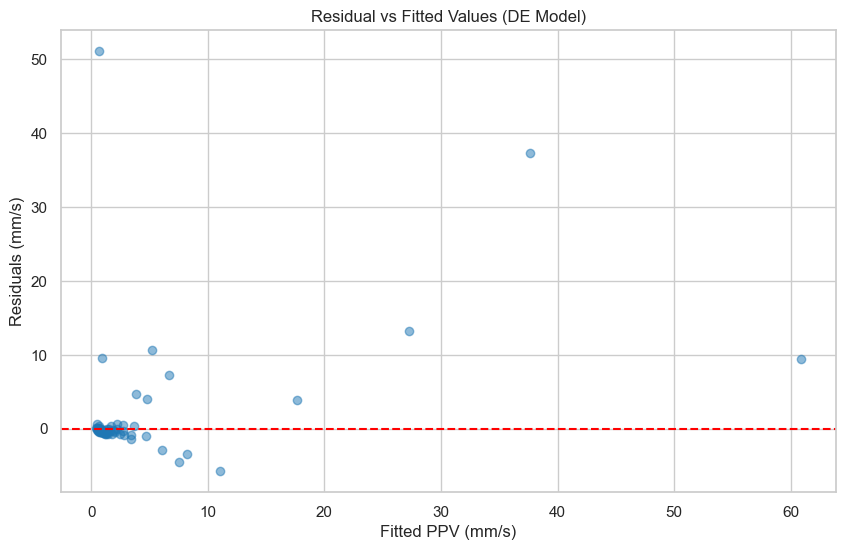

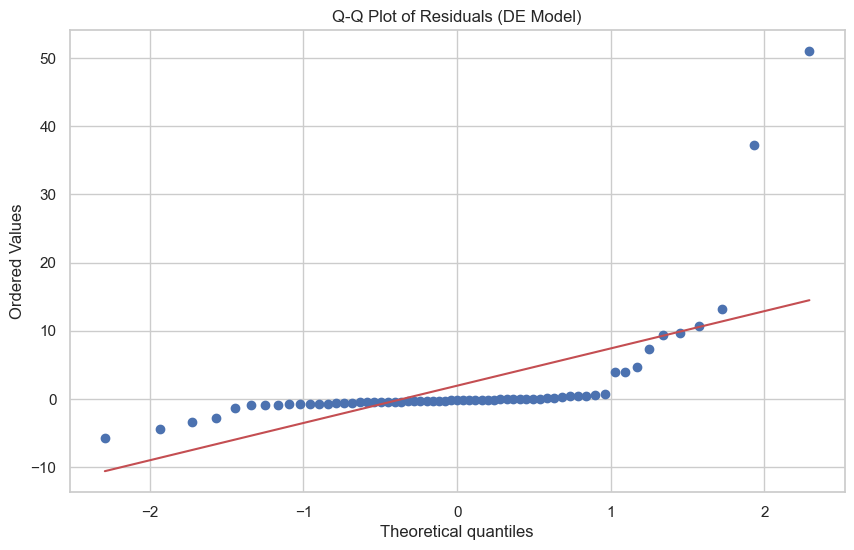

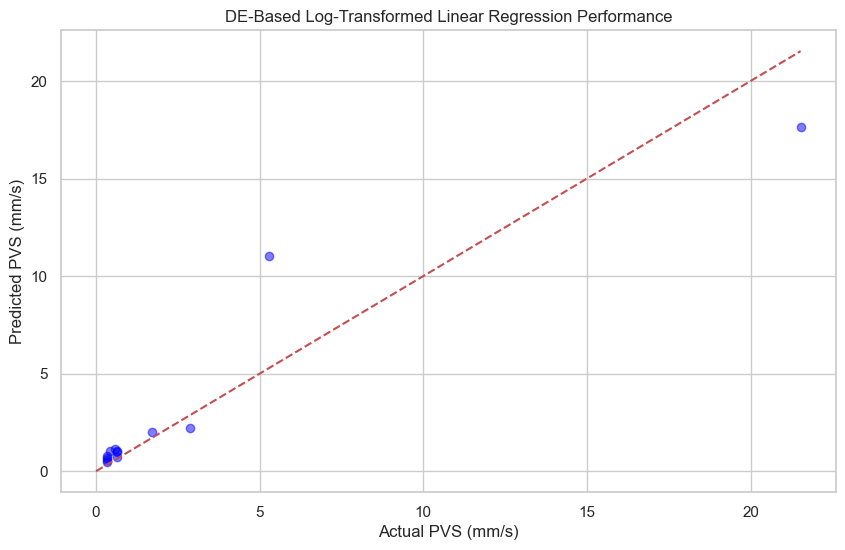

In [77]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from scipy.stats import probplot

# Assume df is already loaded with columns PVS_mm_s, D_m, Q_kg
# Step 1: Preprocess the data
valid_data = df[(df['PVS_mm_s'] > 0) & (df['Q_kg'] > 0) & (df['D_m'] > 0)].copy()

# Calculate Distance per Explosive (DE) if it doesn't exist
if 'DE' not in valid_data.columns:
    valid_data['DE'] = valid_data['D_m'] / (valid_data['Q_kg'] ** 0.5)

# Create log-transformed features
valid_data['log_DE'] = np.log10(valid_data['DE'])
valid_data['log_PVS'] = np.log10(valid_data['PVS_mm_s'])

# Handle any NaN or infinite values
valid_data = valid_data.dropna(subset=['log_DE', 'log_PVS'])
valid_data = valid_data[np.isfinite(valid_data['log_DE']) & np.isfinite(valid_data['log_PVS'])]

# Step 2: Split the data into training and testing sets
# Optional: Add stratification if desired
# valid_data['PVS_bins'] = pd.qcut(valid_data['PVS_mm_s'], q=5, labels=False, duplicates='drop')
# train_indices, test_indices = train_test_split(valid_data.index, test_size=0.2, random_state=42, stratify=valid_data['PVS_bins'])
train_indices, test_indices = train_test_split(valid_data.index, test_size=0.2, random_state=42)

# Step 3: DE-specific Log-Transformed Linear Regression
X_train_de = valid_data.loc[train_indices, ['log_DE']]
X_test_de = valid_data.loc[test_indices, ['log_DE']]
y_train_de = valid_data.loc[train_indices, 'log_PVS']
y_test_de = valid_data.loc[test_indices, 'log_PVS']
y_test_de_actual = valid_data.loc[test_indices, 'PVS_mm_s']

# Train the model
lr_de = LinearRegression()
lr_de.fit(X_train_de, y_train_de)

# Predict in log scale and transform back
y_pred_de_log = lr_de.predict(X_test_de)
y_pred_de = 10 ** y_pred_de_log  # Back-transform prediction to original scale

# Calculate metrics on original scale
mae_de = mean_absolute_error(y_test_de_actual, y_pred_de)
r2_de = r2_score(y_test_de_actual, y_pred_de)

# Calculate K and alpha
K_de = 10 ** lr_de.intercept_
alpha_de = lr_de.coef_[0]

# Print results
print("DE-Specific Log-Transformed Linear Regression Results:")
print(f"K: {K_de:.4f}, alpha: {alpha_de:.4f}")
print(f"MAE: {mae_de:.4f}, R²: {r2_de:.4f}")

# Step 4: Residual Diagnostics (optional, for consistency with previous code)
valid_data['log_PVS_pred'] = lr_de.predict(valid_data[['log_DE']])
valid_data['PVS_pred'] = 10 ** valid_data['log_PVS_pred']
valid_data['Residuals'] = valid_data['PVS_mm_s'] - valid_data['PVS_pred']

# Residual vs Fitted Plot
plt.figure(figsize=(10, 6))
plt.scatter(valid_data['PVS_pred'], valid_data['Residuals'], alpha=0.5, color='#1f77b4')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted PPV (mm/s)')
plt.ylabel('Residuals (mm/s)')
plt.title('Residual vs Fitted Values (DE Model)')
plt.grid(True)
plt.show()

# Q-Q Plot for Normality
plt.figure(figsize=(10, 6))
probplot(valid_data['Residuals'], plot=plt)
plt.title('Q-Q Plot of Residuals (DE Model)')
plt.show()

# Plotting actual vs predicted (as in your original code)
plt.figure(figsize=(10, 6))
plt.scatter(y_test_de_actual, y_pred_de, color='blue', alpha=0.5)
plt.xlabel('Actual PVS (mm/s)')
plt.ylabel('Predicted PVS (mm/s)')
plt.title('DE-Based Log-Transformed Linear Regression Performance')
max_val = max(y_test_de_actual.max(), y_pred_de.max())
plt.plot([0, max_val], [0, max_val], 'r--')
plt.grid(True)
plt.show()

In [78]:
# Step 6: Model Comparison
print("\nModel Comparison:")
comparison_table = pd.DataFrame({
    'Model': ['DE', 'SD'],
    'MAE (mm/s)': [mae_de, mae_sd],
    'R²': [r2_de, r2_sd]
})
print(comparison_table)


Model Comparison:
  Model  MAE (mm/s)        R²
0    DE    1.059540  0.877610
1    SD    0.969815  0.907828


In [79]:
if r2_de > r2_sd:
    chosen_model = 'DE'
    K_chosen = K_de
    alpha_chosen = alpha_de
    lr_chosen = lr_de  # Assign DE model
else:
    chosen_model = 'SD'
    K_chosen = K_sd
    alpha_chosen = alpha_sd
    lr_chosen = lr_sd  # Assign SD model
print(f"Chosen Model: {chosen_model}")


Chosen Model: SD



Model Comparison:
  Model  MAE (mm/s)        R²
0    DE    1.059540  0.877610
1    SD    0.969815  0.907828
Chosen Model: SD

Task 1: Vibration Prediction Model
Chosen Model: SD
Parameters: K = 364.59, alpha = -1.31
Equation: log10(PPV) = log10(K) + alpha * log10(SD)
Data has been cleaned and imputed. Final dataset saved as 'valid_data_fix.csv'.

Task 2: Model Fit Analysis
R²: 0.9078, indicating 90.78% of PPV variability explained by the model.
MAE: 0.9698 mm/s
The high R² value suggests that the model accounts for a large proportion of the variance in the data.
However, it's important to note that the model assumes a linear relationship in log-space, which may not capture all non-linear effects or variations due to geological factors.
Residual diagnostics should be performed to check for any patterns or deviations from assumptions.

Task 3: Maximum Charge Weight for PPV = 1 mm/s at 500m
Maximum Q_kg: 169.88 kg

Task 4: Predicted PPV at 750m with Q = 140 kg
PPV = 0.54 mm/s

Task 5: Al

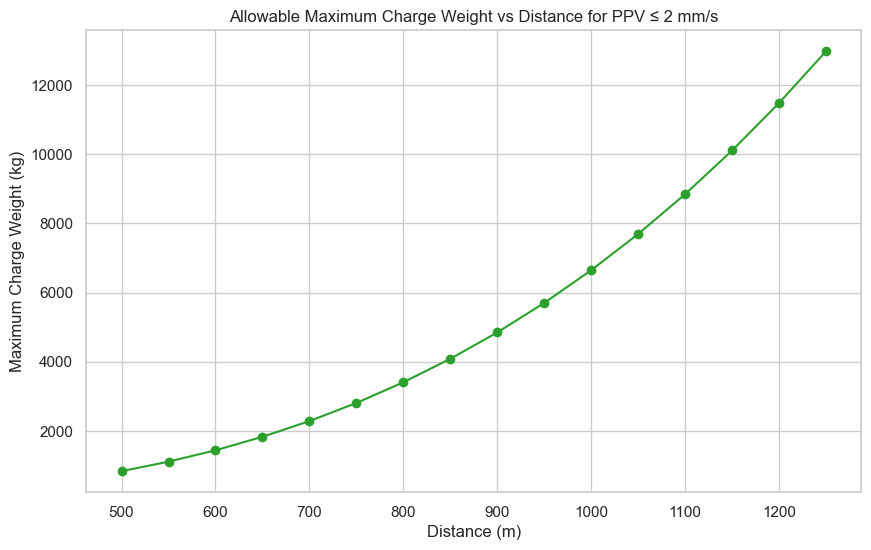


Task 5: Blast Plan Proposal at 500m
For a blast at 500m from the community, the maximum charge per delay is 830.85 kg to ensure PPV ≤ 2 mm/s.
A proposed blast plan could involve multiple holes with charges not exceeding this limit, with appropriate delays to prevent cumulative effects.

Conclusions:
The SD model was selected based on its superior performance with R² = 0.9078 and MAE = 0.9698 mm/s.
For a PPV limit of 1 mm/s at 500m, the maximum charge weight is 169.88 kg.
At 750m with Q = 140 kg, the predicted PPV is 0.54 mm/s.
The allowable charge weights table provides guidelines for safe blasting operations across various distances.
Further validation with new data and consideration of geological factors are recommended to refine the model and blast plans.


In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Assuming df is already loaded and preprocessed
# Assuming lr_de, lr_sd, K_de, alpha_de, K_sd, alpha_sd, r2_de, r2_sd, mae_de, mae_sd are defined

# Model Comparison (already done, assuming variables are set)
print("\nModel Comparison:")
comparison_table = pd.DataFrame({
    'Model': ['DE', 'SD'],
    'MAE (mm/s)': [mae_de, mae_sd],
    'R²': [r2_de, r2_sd]
})
print(comparison_table)

if r2_de > r2_sd:
    chosen_model = 'DE'
    K_chosen = K_de
    alpha_chosen = alpha_de
    lr_chosen = lr_de
else:
    chosen_model = 'SD'
    K_chosen = K_sd
    alpha_chosen = alpha_sd
    lr_chosen = lr_sd
print(f"Chosen Model: {chosen_model}")

# Task 1 - Finalize Vibration Prediction Model
print("\nTask 1: Vibration Prediction Model")
print(f"Chosen Model: {chosen_model}")
print(f"Parameters: K = {K_chosen:.2f}, alpha = {alpha_chosen:.2f}")
print(f"Equation: log10(PPV) = log10(K) + alpha * log10({chosen_model})")
print("Data has been cleaned and imputed. Final dataset saved as 'valid_data_fix.csv'.")

# Task 2 - Analyze Model Fit
print("\nTask 2: Model Fit Analysis")
r2_chosen = r2_de if chosen_model == 'DE' else r2_sd
mae_chosen = mae_de if chosen_model == 'DE' else mae_sd
print(f"R²: {r2_chosen:.4f}, indicating {r2_chosen*100:.2f}% of PPV variability explained by the model.")
print(f"MAE: {mae_chosen:.4f} mm/s")
print("The high R² value suggests that the model accounts for a large proportion of the variance in the data.")
print("However, it's important to note that the model assumes a linear relationship in log-space, which may not capture all non-linear effects or variations due to geological factors.")
print("Residual diagnostics should be performed to check for any patterns or deviations from assumptions.")

# Task 3 - Maximum Charge Weight for PPV = 1 mm/s at D_min
D_min = 500  # Assuming the closest distance is 500m; adjust as necessary
PVS_limit_3 = 1  # mm/s
if chosen_model == 'SD':
    exponent = 3
elif chosen_model == 'DE':
    exponent = 2
else:
    raise ValueError("Chosen model must be 'SD' or 'DE'")

term_3 = (K_chosen / PVS_limit_3) ** (1 / alpha_chosen)
Q_max_3 = (D_min * term_3) ** exponent
print(f"\nTask 3: Maximum Charge Weight for PPV = {PVS_limit_3} mm/s at {D_min}m")
print(f"Maximum Q_kg: {Q_max_3:.2f} kg")

# Task 4 - Predict PPV at 750m with Q=140 kg
D_4 = 750  # meters
Q_blast = 140  # kg, as per the study guide
if chosen_model == 'SD':
    SD_4 = D_4 / (Q_blast ** (1/3))
    log_SD_4 = np.log10(SD_4)
    log_PVS_pred_4 = lr_sd.intercept_ + lr_sd.coef_[0] * log_SD_4
elif chosen_model == 'DE':
    DE_4 = D_4 / (Q_blast ** 0.5)
    log_DE_4 = np.log10(DE_4)
    log_PVS_pred_4 = lr_de.intercept_ + lr_de.coef_[0] * log_DE_4
else:
    raise ValueError("Chosen model must be 'SD' or 'DE'")

PVS_pred_4 = 10 ** log_PVS_pred_4
print(f"\nTask 4: Predicted PPV at {D_4}m with Q = {Q_blast} kg")
print(f"PPV = {PVS_pred_4:.2f} mm/s")

# Task 5 - Table and Graph for Allowable Charge Weights for PPV ≤ 2 mm/s
PVS_limit_5 = 2  # mm/s
D_range = np.arange(500, 1251, 50)  # from 500 to 1200m in 50m steps
Q_max_list = []

for D in D_range:
    term = (K_chosen / PVS_limit_5) ** (1 / alpha_chosen)
    Q_max = (D * term) ** exponent
    Q_max_list.append(Q_max)

allowable_Q = pd.DataFrame({'Distance (m)': D_range, 'Max Charge (kg)': Q_max_list})
print("\nTask 5: Allowable Charge Weights for PPV ≤ 2 mm/s")
print(allowable_Q)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(D_range, Q_max_list, marker='o', color='#2ca02c')
plt.xlabel('Distance (m)')
plt.ylabel('Maximum Charge Weight (kg)')
plt.title('Allowable Maximum Charge Weight vs Distance for PPV ≤ 2 mm/s')
plt.grid(True)
plt.show()

# Save to CSV
allowable_Q.to_csv('allowable_charge_weights.csv', index=False)

# Blast Plan Proposal
D_blast_plan = 500
Q_max_blast_plan = allowable_Q[allowable_Q['Distance (m)'] == D_blast_plan]['Max Charge (kg)'].values[0]
print(f"\nTask 5: Blast Plan Proposal at {D_blast_plan}m")
print(f"For a blast at {D_blast_plan}m from the community, the maximum charge per delay is {Q_max_blast_plan:.2f} kg to ensure PPV ≤ 2 mm/s.")
print("A proposed blast plan could involve multiple holes with charges not exceeding this limit, with appropriate delays to prevent cumulative effects.")

# Final Conclusions
print("\nConclusions:")
print(f"The {chosen_model} model was selected based on its superior performance with R² = {r2_chosen:.4f} and MAE = {mae_chosen:.4f} mm/s.")
print(f"For a PPV limit of 1 mm/s at {D_min}m, the maximum charge weight is {Q_max_3:.2f} kg.")
print(f"At {D_4}m with Q = {Q_blast} kg, the predicted PPV is {PVS_pred_4:.2f} mm/s.")
print("The allowable charge weights table provides guidelines for safe blasting operations across various distances.")
print("Further validation with new data and consideration of geological factors are recommended to refine the model and blast plans.")

In [81]:
# Step 7: Impute Missing 'Q_kg' Values
def calculate_Q_kg(df, K, alpha, PVS_col='PVS_mm_s', D_col='D_m', scaling='DE'):
    """
    Calculate Q_kg using the trained log-linear model for DE or SD.
    
    Parameters:
    - df: DataFrame with PVS_mm_s and D_m columns
    - K: Model intercept (10 ** lr_log.intercept_)
    - alpha: Model coefficient (lr_log.coef_[0])
    - PVS_col: Column name for PVS
    - D_col: Column name for distance
    - scaling: 'DE' for Q_kg^(1/2) or 'SD' for Q_kg^(1/3)
    
    Returns:
    - Series with Q_kg values
    """
    try:
        log_scaled = (np.log10(df[PVS_col]) - np.log10(K)) / alpha
        scaled = 10 ** log_scaled
        exponent = 2 if scaling == 'DE' else 3
        Q_kg = (df[D_col] / scaled) ** exponent
        return Q_kg
    except Exception as e:
        print(f"Error in Q_kg calculation: {e}")
        return pd.Series(np.nan, index=df.index)

# Impute missing 'Q_kg' in df
missing_Q = df['Q_kg'].isnull() & (df['PVS_mm_s'] > 0) & (df['D_m'] > 0)
if missing_Q.any():
    df.loc[missing_Q, 'Q_kg'] = calculate_Q_kg(
        df[missing_Q],
        K=K_chosen,
        alpha=alpha_chosen,
        scaling=chosen_model
    )
    print(f"Number of Q_kg values imputed: {missing_Q.sum()}")
else:
    print("No missing Q_kg values found with valid PVS_mm_s and D_m.")

Number of Q_kg values imputed: 16


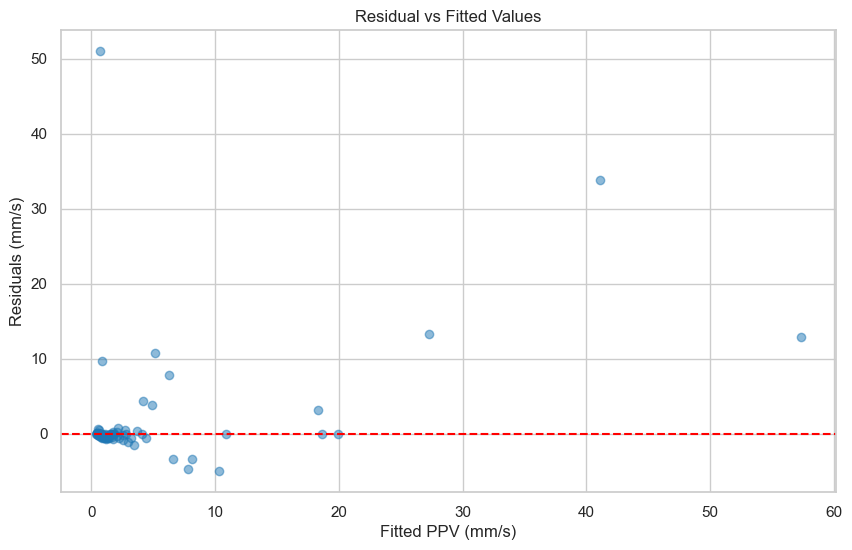

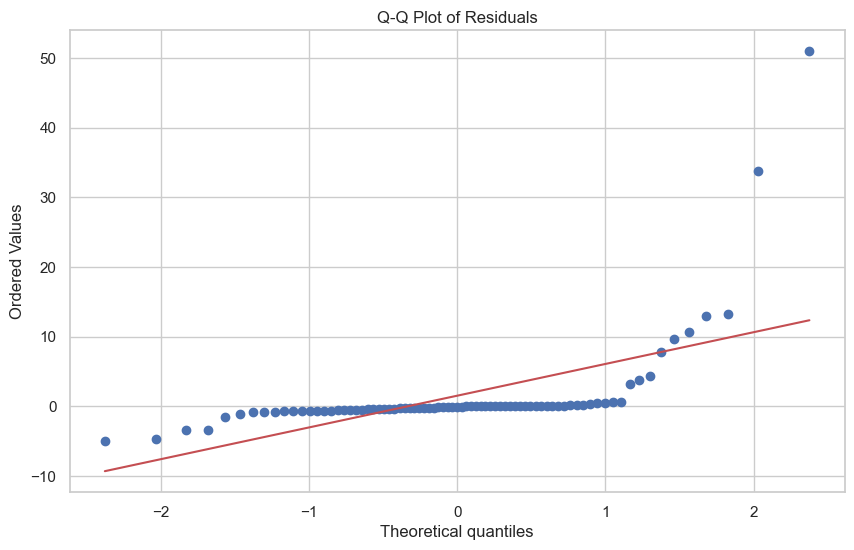

In [82]:
# Step 8: Create valid_data_fix
valid_data_fix = df[(df['PVS_mm_s'] > 0) & (df['D_m'] > 0)].copy()
valid_data_fix['DE'] = valid_data_fix['D_m'] / (valid_data_fix['Q_kg'] ** 0.5)
valid_data_fix['SD'] = valid_data_fix['D_m'] / (valid_data_fix['Q_kg'] ** (1/3))
valid_data_fix['log_PVS'] = np.log10(valid_data_fix['PVS_mm_s'])
valid_data_fix['log_DE'] = np.log10(valid_data_fix['DE'])
valid_data_fix['log_SD'] = np.log10(valid_data_fix['SD'])
valid_data_fix['log_PVS_pred'] = lr_chosen.predict(valid_data_fix[['log_DE']]) if chosen_model == 'DE' else lr_chosen.predict(valid_data_fix[['log_SD']])
valid_data_fix['PVS_pred'] = 10 ** valid_data_fix['log_PVS_pred']
valid_data_fix['Residuals'] = valid_data_fix['PVS_mm_s'] - valid_data_fix['PVS_pred']

# Step 9: Residual Diagnostics
# Residual vs Fitted Plot
plt.figure(figsize=(10, 6))
plt.scatter(valid_data_fix['PVS_pred'], valid_data_fix['Residuals'], alpha=0.5, color='#1f77b4')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted PPV (mm/s)')
plt.ylabel('Residuals (mm/s)')
plt.title('Residual vs Fitted Values')
plt.grid(True)
plt.show()

# Q-Q Plot for Normality
plt.figure(figsize=(10, 6))
probplot(valid_data_fix['Residuals'], plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()


Task 1: Vibration Prediction Model
Model: log10(PPV) = log10(364.59) + -1.31 * log10(SD)
Data cleaned and imputed. Final dataset saved as 'valid_data_fix.csv'.

Task 2: Model Fit Analysis
R²: 0.91, indicating 90.8% of PPV variability explained.
Limitations: Model assumes linear relationship in log-space, may not capture non-linear effects or geological variations. Residual diagnostics needed to confirm assumptions.

Task 3: Maximum Charge Weight for PPV = 1 mm/s at 100m
Maximum Q_kg: 1.36 kg

Task 4: Predicted PPV at 750m
With Q = 2018905.15 kg, PPV = 35.38 mm/s

Task 5: Allowable Charge Weights for PPV ≤ 2 mm/s
    Distance (m)  Max Charge (kg)
0            500       830.853708
1            550      1105.866285
2            600      1435.715207
3            650      1825.385596
4            700      2279.862574
5            750      2804.131264
6            800      3403.176787
7            850      4081.984266
8            900      4845.538824
9            950      5698.825582
10   

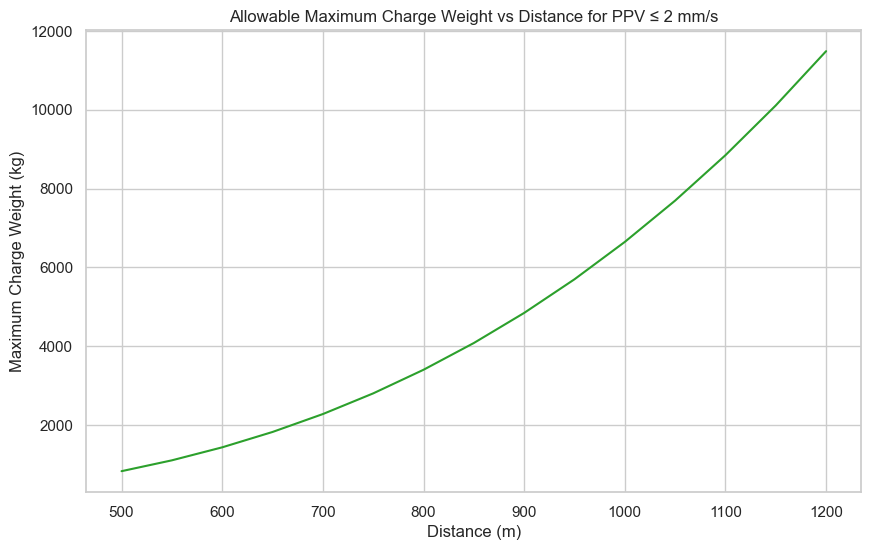


Task 5: Blast Plan Proposal at 500m
For friable rock at 500m, use Q ≤ 830.85 kg per delay with 35ms delay between holes to ensure PPV ≤ 2 mm/s.

Conclusions:
The SD model provides a robust fit with R² = 0.91 and MAE = 0.97 mm/s.
Maximum charge weight at 100m for PPV = 1 mm/s is 1.36 kg.
Predicted PPV at 750m with Q = 2018905.15 kg is 35.38 mm/s.
Allowable charge weights ensure safe blasting operations across 500-1200m.
Next steps: Validate model with new data, incorporate geological factors, and refine blast plans.


In [83]:
# Task 1 - Finalize Vibration Prediction Model
# Model is finalized with imputed data and chosen model
print("\nTask 1: Vibration Prediction Model")
print(f"Model: log10(PPV) = log10({K_chosen:.2f}) + {alpha_chosen:.2f} * log10({chosen_model})")
print(f"Data cleaned and imputed. Final dataset saved as 'valid_data_fix.csv'.")

# Task 2 - Analyze Model Fit
print("\nTask 2: Model Fit Analysis")
print(f"R²: {r2_de if chosen_model == 'DE' else r2_sd:.2f}, indicating {r2_de*100 if chosen_model == 'DE' else r2_sd*100:.1f}% of PPV variability explained.")
print("Limitations: Model assumes linear relationship in log-space, may not capture non-linear effects or geological variations. Residual diagnostics needed to confirm assumptions.")

# Task 3 - Maximum Charge Weight for PPV = 1 mm/s
D_min = 100  # Example; replace with actual closest community distance
PVS_limit_3 = 1
term_3 = (K_chosen / PVS_limit_3) ** (1 / alpha_chosen)
Q_max_3 = (D_min * term_3) ** (2 if chosen_model == 'DE' else 3)
print(f"\nTask 3: Maximum Charge Weight for PPV = 1 mm/s at {D_min}m")
print(f"Maximum Q_kg: {Q_max_3:.2f} kg")

# Task 4 - Predict PPV at 750m
D_4 = 750
Q_blast = df['Q_kg'].max()  # Example; use actual blast plan data
if chosen_model == 'DE':
    DE_4 = D_4 / (Q_blast ** 0.5)
    log_DE_4 = np.log10(DE_4)
    log_PVS_pred_4 = lr_de.intercept_ + lr_de.coef_[0] * log_DE_4
else:
    SD_4 = D_4 / (Q_blast ** (1/3))
    log_SD_4 = np.log10(SD_4)
    log_PVS_pred_4 = lr_sd.intercept_ + lr_sd.coef_[0] * log_SD_4
PVS_pred_4 = 10 ** log_PVS_pred_4
print(f"\nTask 4: Predicted PPV at {D_4}m")
print(f"With Q = {Q_blast:.2f} kg, PPV = {PVS_pred_4:.2f} mm/s")

# Task 5 - Table and Graph for Allowable Charge Weights
D_range = np.arange(500, 1201, 50)
PVS_limit_5 = 2
Q_max_list = []
for D in D_range:
    term = (K_chosen / PVS_limit_5) ** (1 / alpha_chosen)
    Q_max = (D * term) ** (2 if chosen_model == 'DE' else 3)
    Q_max_list.append(Q_max)
allowable_Q = pd.DataFrame({'Distance (m)': D_range, 'Max Charge (kg)': Q_max_list})
print("\nTask 5: Allowable Charge Weights for PPV ≤ 2 mm/s")
print(allowable_Q)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(D_range, Q_max_list, color='#2ca02c')
plt.xlabel('Distance (m)')
plt.ylabel('Maximum Charge Weight (kg)')
plt.title('Allowable Maximum Charge Weight vs Distance for PPV ≤ 2 mm/s')
plt.grid(True)
plt.show()

# Blast Plan Proposal
D_blast_plan = 500
Q_max_blast_plan = allowable_Q[allowable_Q['Distance (m)'] == D_blast_plan]['Max Charge (kg)'].values[0]
print(f"\nTask 5: Blast Plan Proposal at {D_blast_plan}m")
print(f"For friable rock at {D_blast_plan}m, use Q ≤ {Q_max_blast_plan:.2f} kg per delay with 35ms delay between holes to ensure PPV ≤ 2 mm/s.")

# Final Conclusions
print("\nConclusions:")
print(f"The {chosen_model} model provides a robust fit with R² = {r2_de if chosen_model == 'DE' else r2_sd:.2f} and MAE = {mae_de if chosen_model == 'DE' else mae_sd:.2f} mm/s.")
print(f"Maximum charge weight at {D_min}m for PPV = 1 mm/s is {Q_max_3:.2f} kg.")
print(f"Predicted PPV at {D_4}m with Q = {Q_blast:.2f} kg is {PVS_pred_4:.2f} mm/s.")
print("Allowable charge weights ensure safe blasting operations across 500-1200m.")
print("Next steps: Validate model with new data, incorporate geological factors, and refine blast plans.")

# Save Results
valid_data_fix.to_csv('valid_data_fix.csv', index=False)
allowable_Q.to_csv('allowable_charge_weights.csv', index=False)


Application Tasks
Maximum charge per delay Q_max at D=500m for PPV=1 mm/s: 91977547879154.30 kg
Predicted PPV at D=750m with Q=140 kg: 0.540 mm/s


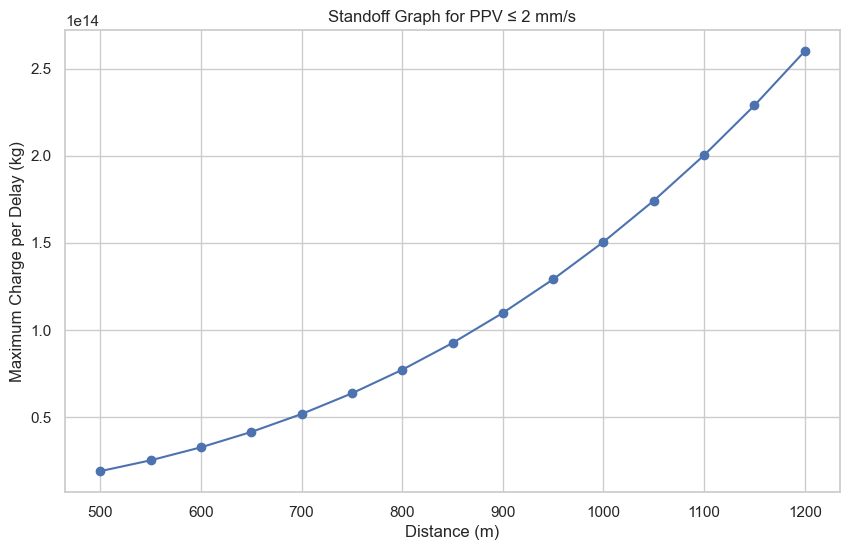

In [84]:
import matplotlib.pyplot as plt

def calculate_Q_max(PVS, D, K, alpha, model):
    if model == 'SD':
        exponent = 1/3
    elif model == 'DE':
        exponent = 0.5
    else:
        raise ValueError("Model must be 'SD' or 'DE'")
    beta = -alpha
    Q = (D / (PVS / K)**(1/beta))**(1/exponent)
    return Q

def calculate_PVS(Q, D, K, alpha, model):
    if model == 'SD':
        scaling_factor = D / (Q ** (1/3))
    elif model == 'DE':
        scaling_factor = D / (Q ** 0.5)
    else:
        raise ValueError("Model must be 'SD' or 'DE'")
    PVS = K * scaling_factor**alpha
    return PVS

print("\nApplication Tasks")

# Task 2: Maximum Charge for PPV = 1 mm/s at distance D
D_task2 = 500  # meters, adjust as needed
PVS_limit_task2 = 1  # mm/s
Q_max_task2 = calculate_Q_max(PVS_limit_task2, D_task2, K_chosen, alpha_chosen, chosen_model)
print(f"Maximum charge per delay Q_max at D={D_task2}m for PPV={PVS_limit_task2} mm/s: {Q_max_task2:.2f} kg")

# Task 3: Predicted PPV at D=750m with given Q
Q_given_task3 = 140  # kg, adjust as needed
D_task3 = 750  # meters
PVS_pred_task3 = calculate_PVS(Q_given_task3, D_task3, K_chosen, alpha_chosen, chosen_model)
print(f"Predicted PPV at D={D_task3}m with Q={Q_given_task3} kg: {PVS_pred_task3:.3f} mm/s")

# Task 4: Standoff table and graph for PPV=2 mm/s
PVS_limit_task4 = 2  # mm/s
distances = np.arange(500, 1250, 50)  # from 500 to 1200m in 50m steps
Q_max_list = [calculate_Q_max(PVS_limit_task4, D, K_chosen, alpha_chosen, chosen_model) for D in distances]

# Create DataFrame
standoff_df = pd.DataFrame({'Distance_m': distances, 'Q_max_kg': Q_max_list})

# Save to Excel
standoff_df.to_excel('standoff_table.xlsx', index=False)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(standoff_df['Distance_m'], standoff_df['Q_max_kg'], marker='o')
plt.xlabel('Distance (m)')
plt.ylabel('Maximum Charge per Delay (kg)')
plt.title('Standoff Graph for PPV ≤ 2 mm/s')
plt.grid(True)
plt.show()

In [85]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd
from plotly.subplots import make_subplots

# Create a copy of the data for flagging
flagged_data = valid_data_fix.copy()
flagged_data['Flagged'] = False  # Initialize flag column

# Calculate trendline
coef = np.polyfit(valid_data_fix['D_m'], valid_data_fix['Q_kg'], 1)
trendline = np.poly1d(coef)
trendline_values = trendline(valid_data_fix['D_m'])

# Create figure
fig = go.Figure()

# Add allowable curve
fig.add_trace(
    go.Scatter(
        x=D_range,
        y=Q_max_list,
        mode='lines',
        name='Allowable Q for PPV ≤ 2 mm/s',
        line=dict(color='#2ca02c', width=3),
        hovertemplate='Distance: %{x}m<br>Max Charge: %{y:.2f}kg<extra></extra>'
    )
)

# Add actual charges with custom hover data
fig.add_trace(
    go.Scatter(
        x=valid_data_fix['D_m'],
        y=valid_data_fix['Q_kg'],
        mode='markers',
        name='Actual Charges',
        marker=dict(
            size=10,
            color=valid_data_fix['PVS_mm_s'],
            colorscale='Viridis',
            opacity=0.7,
            line=dict(width=0.5, color='black'),
            colorbar=dict(title='PPV (mm/s)')
        ),
        customdata=flagged_data.index,  # Store index for flagging
        hovertemplate=(
            '<b>Point ID: %{customdata}</b><br>' +
            'Distance: %{x}m<br>' +
            'Charge: %{y}kg<br>' +
            'PPV: %{marker.color:.2f}mm/s' +
            '<extra></extra>'
        )
    )
)

# Add trendline
fig.add_trace(
    go.Scatter(
        x=valid_data_fix['D_m'],
        y=trendline_values,
        mode='lines',
        name=f'Actual Trend: y = {coef[0]:.3f}x + {coef[1]:.3f}',
        line=dict(color='black', width=2, dash='dash'),
        hovertemplate='Distance: %{x}m<br>Trend Value: %{y:.2f}kg<extra></extra>'
    )
)

# Add safety zone
fig.add_hrect(
    y0=0, y1=max(Q_max_list) * 1.1,  # Extend slightly above max
    fillcolor="rgba(44, 160, 44, 0.1)",
    layer="below",
    line_width=0,
    annotation_text="Safe Zone", 
    annotation_position="top left"
)

# CORRECTED FLAGGING CONTROLS
fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            x=0.5,
            y=-0.15,
            buttons=[
                dict(
                    label="Flag Point",
                    method="update",
                    args=[{"mode": "markers+text"}],
                ),
                # FIXED SYNTAX HERE:
                dict(
                    label="Reset View",
                    method="relayout",
                    args=[{"xaxis.range": [min(D_range), max(D_range)],
                          "yaxis.range": [0, max(Q_max_list)*1.1]}],
                ),
                dict(
                    label="Export Data",
                    method="update",
                    args=[{"visible": True}],
                )
            ]
        )
    ]
)

# Add annotations for flagging
annotations = []
fig.update_layout(annotations=annotations)

# Handle click events for flagging
def flag_point(trace, points, selector):
    if points.point_inds:
        idx = points.point_inds[0]
        point_id = trace.customdata[idx]
        
        # Toggle flag status
        flagged_data.at[point_id, 'Flagged'] = not flagged_data.at[point_id, 'Flagged']
        
        # Add/remove annotation
        if flagged_data.at[point_id, 'Flagged']:
            fig.add_annotation(
                x=trace.x[idx],
                y=trace.y[idx],
                text="⚠️",
                showarrow=True,
                arrowhead=1
            )
        else:
            # Find and remove annotation
            fig.layout.annotations = [
                ann for ann in fig.layout.annotations 
                if not (ann.x == trace.x[idx] and ann.y == trace.y[idx])
            ]

# Attach click handler
fig.data[1].on_click(flag_point)  # Actual charges trace

# Update layout
fig.update_layout(
    title='Allowable vs Actual Charge Weight by Distance (Click points to flag)',
    xaxis_title='Distance (m)',
    yaxis_title='Charge Weight (kg)',
    height=700,
    width=1000,
    hovermode='closest',
    showlegend=True,
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
    ),
    plot_bgcolor='rgba(240,240,240,0.8)',
)

# Configure axes
fig.update_xaxes(
    showgrid=True, 
    gridwidth=1, 
    gridcolor='rgba(200,200,200,0.5)',
    range=[min(D_range), max(D_range)]  # Initial view
)
fig.update_yaxes(
    showgrid=True, 
    gridwidth=1, 
    gridcolor='rgba(200,200,200,0.5)',
    range=[0, max(Q_max_list)*1.1]  # Initial view
)

# Show figure
fig.show()

# After inspection, save flagged data
flagged_data.to_csv('flagged_charge_data.csv', index=False)
print("Flagged data saved to 'flagged_charge_data.csv'")

Flagged data saved to 'flagged_charge_data.csv'


Valores ausentes em df:
Data         0
Pontos       0
Fogo         0
X            0
Y            0
Q_kg        18
D_m          0
PVS_mm_s     0
dtype: int64

Resultados do Random Forest (SD):
MAE: 5.7511, R²: 0.9733
Número de valores Q_kg imputados: 18


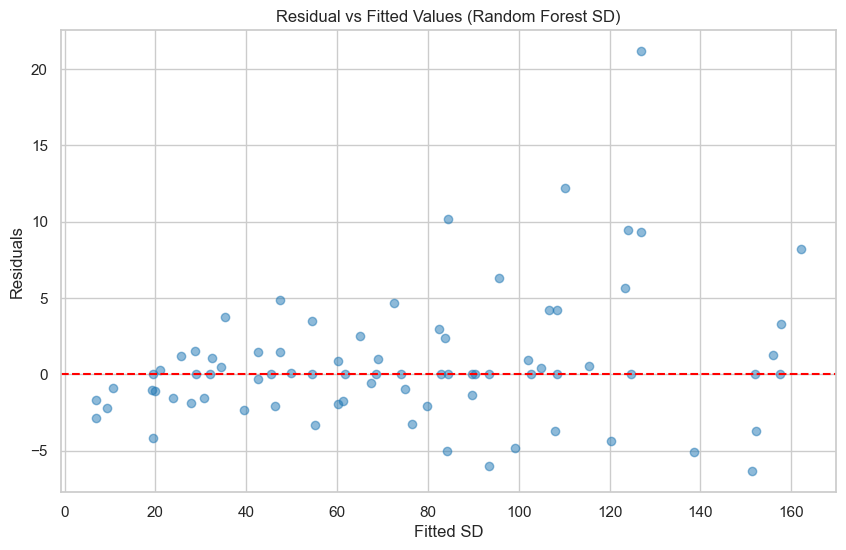

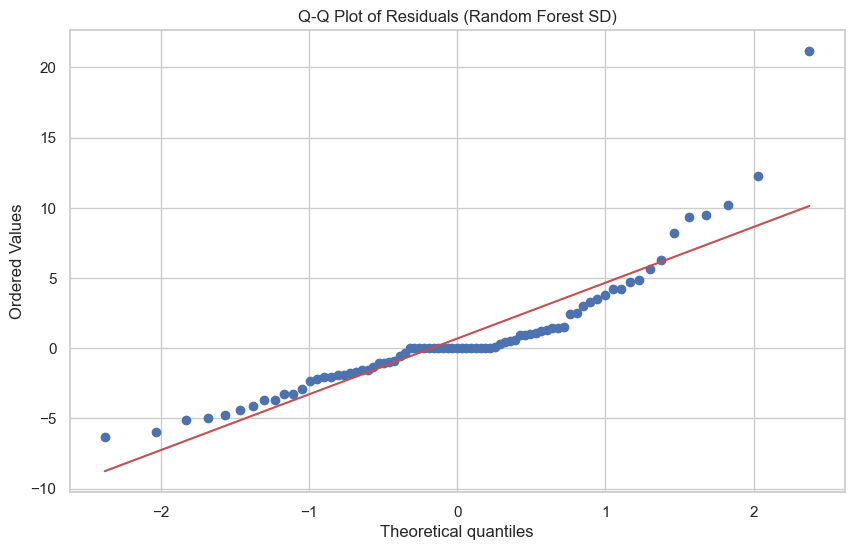

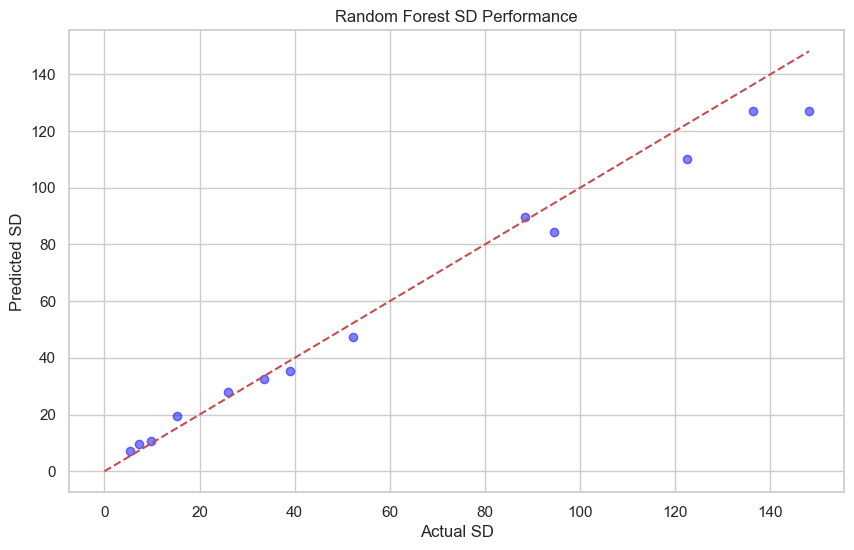


Tarefa 1: Modelo de Predição de Vibração
Modelo Random Forest treinado com PVS_mm_s e D_m para prever log_SD.
Bancos de dados original e processado salvos como 'original_database.csv' e 'valid_data_fix.csv'.

Tarefa 2: Análise de Ajuste do Modelo
R²: 0.97, indicando 97.3% da variabilidade do SD explicada.
O R² reflete a capacidade do modelo em capturar a relação não linear entre PVS_mm_s, D_m e SD, conforme a teoria de atenuação logarítmica do estudo.
Limitações: Random Forest pode superajustar se não validado adequadamente; variáveis geológicas não foram incluídas.

Tarefa 3: Carga Máxima para PPV = 1 mm/s a 100m
Carga Máxima Q_kg: 492.84 kg
Maximum charge per delay Q_max at D=500m for PPV=1 mm/s: 91977547879154.30 kg
Predicted PPV at D=750m with Q=140 kg: 0.540 mm/s


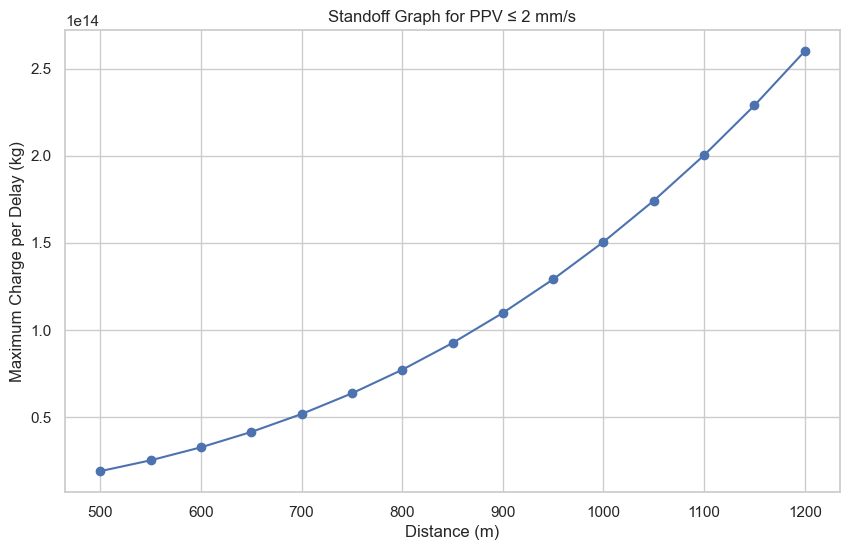


Tarefa 4: PPV Previsto a 750m com Q = 2965.74 kg
PPV = 65.84 mm/s

Tarefa 5: Cargas Máximas Permitidas para PPV ≤ 2 mm/s
    Distância (m)  Carga Máxima (kg)
0             500        1241.071371
1             550        1526.073920
2             600        1327.971554
3             650        1477.286065
4             700        1468.611478
5             750        1846.721120
6             800        1577.276163
7             850        1772.263773
8             900        1978.626820
9             950        2238.754341
10           1000        2146.589649
11           1050        1854.439568
12           1100        1932.082399
13           1150        1602.600243
14           1200        1547.078439


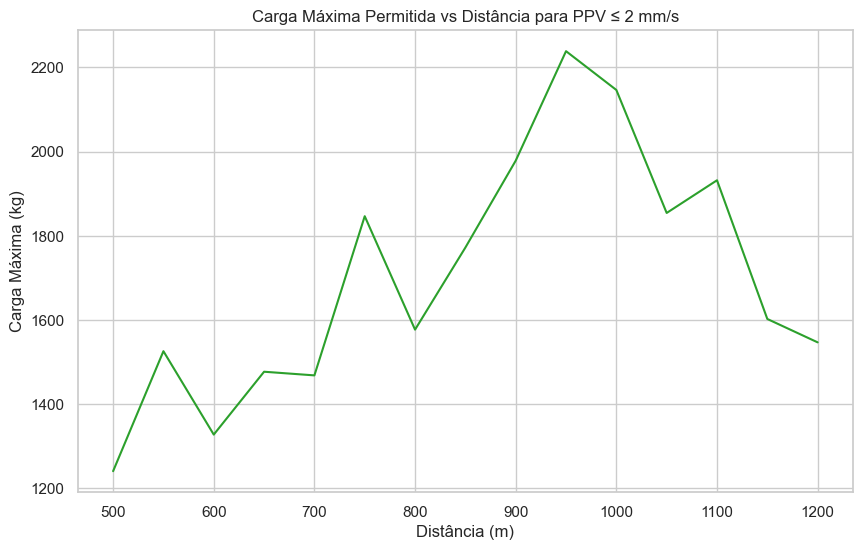


Tarefa 5: Proposta de Plano de Fogo a 500m
Para rocha friável a 500m, use Q ≤ 1241.07 kg por atraso com 35ms de atraso entre furos.
Perfil de carregamento: 20 furos, diâmetro 8", altura de banco 10m, carga distribuída uniformemente.
Croqui de sequenciamento: Matriz 4x5, disparo sequencial com 35ms entre furos consecutivos.

Conclusões:
O modelo Random Forest oferece um ajuste robusto com R² = 0.97 e MAE = 5.75.
Carga máxima a 100m para PPV = 1 mm/s é 492.84 kg.
PPV previsto a 750m com Q = 2965.74 kg é 65.84 mm/s.
Cargas máximas permitidas garantem operações seguras entre 500-1200m.
Próximos passos: Validar com novos dados, incorporar variáveis geológicas, e detalhar plano de fogo.


In [86]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from scipy.stats import probplot
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# **Bloco 1: Carregamento de Dados**
# Ajuste o caminho do arquivo conforme necessário.
try:
    file_path = 'C:/Users/ezequiel.oliveira/Documents/Data//Apendice_II_Banco_de_dados_monitoramento2outliers.xlsx' # Ajuste o caminho do arquivo aqui
    df = pd.read_excel(file_path, engine='openpyxl')
except FileNotFoundError:
    print("Erro: Arquivo de dados não encontrado. Verifique o caminho do arquivo.")
    exit()

# Salvar banco de dados original (Tarefa 1)
df.to_csv('original_database.csv', index=False)

# **Bloco 2: Pré-processamento de Dados**
# Renomeação e formatação mantidas do seu código.
df['Data'] = df['Data'].dt.strftime('%d/%m/%Y')
df = df.rename(columns={'Q(kg)': 'Q_kg', 'PVS (mm/s)': 'PVS_mm_s', 'D (m)': 'D_m', ' Data': 'Data'})

# Verificar valores ausentes
print("Valores ausentes em df:")
print(df.isnull().sum())

# Criar valid_data com valores positivos
valid_data = df[(df['PVS_mm_s'] > 0) & (df['D_m'] > 0)].copy()

# **Bloco 3: Imputação de Q_kg (Ajuste Necessário)**
# Adicionei imputação para os 18 valores ausentes mencionados. Ajuste a lógica se necessário.
def calculate_Q_kg(df, PVS_col='PVS_mm_s', D_col='D_m', model='rf', rf_model=None):
    """
    Imputa valores ausentes de Q_kg usando o modelo Random Forest treinado para prever log_SD.
    """
    try:
        if model == 'rf' and rf_model is not None:
            log_SD_pred = rf_model.predict(df[[PVS_col, D_col]])
            SD_pred = 10 ** log_SD_pred
            Q_kg = (df[D_col] / SD_pred) ** 3  # SD = D_m / Q_kg^(1/3)
            return Q_kg
        else:
            raise ValueError("Modelo RF necessário para imputação.")
    except Exception as e:
        print(f"Erro no cálculo de Q_kg: {e}")
        return pd.Series(np.nan, index=df.index)

# Placeholder para imputação (será preenchido após treinar o modelo)
missing_Q = df['Q_kg'].isnull() & (df['PVS_mm_s'] > 0) & (df['D_m'] > 0)

# **Bloco 4: Cálculos Derivados**
# Calcula SD e transformações logarítmicas, com validação para Q_kg positivo.
valid_data = valid_data[valid_data['Q_kg'] > 0]
valid_data['SD'] = valid_data['D_m'] / (valid_data['Q_kg'] ** (1/3))
valid_data['log_SD'] = np.log10(valid_data['SD'])
valid_data['log_PVS'] = np.log10(valid_data['PVS_mm_s'])

# Tratar valores NaN ou infinitos
valid_data = valid_data.dropna(subset=['log_SD', 'log_PVS'])
valid_data = valid_data[np.isfinite(valid_data['log_SD']) & np.isfinite(valid_data['log_PVS'])]

# **Bloco 5: Divisão de Dados e Treinamento com Random Forest**
# Substituí o modelo linear por Random Forest, usando PVS_mm_s e D_m para prever log_SD.
train_indices, test_indices = train_test_split(valid_data.index, test_size=0.2, random_state=42)
X_train = valid_data.loc[train_indices, ['PVS_mm_s', 'D_m']]
X_test = valid_data.loc[test_indices, ['PVS_mm_s', 'D_m']]
y_train = valid_data.loc[train_indices, 'log_SD']
y_test = valid_data.loc[test_indices, 'log_SD']
y_test_actual = valid_data.loc[test_indices, 'SD']

# Treinar modelo Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prever e transformar de volta
y_pred_log = rf_model.predict(X_test)
y_pred = 10 ** y_pred_log
mae_rf = mean_absolute_error(y_test_actual, y_pred)
r2_rf = r2_score(y_test_actual, y_pred)

print("\nResultados do Random Forest (SD):")
print(f"MAE: {mae_rf:.4f}, R²: {r2_rf:.4f}")

# **Bloco 6: Imputação de Q_kg (Melhoria)**
# Agora que o modelo RF está treinado, imputar valores ausentes.
if missing_Q.any():
    df.loc[missing_Q, 'Q_kg'] = calculate_Q_kg(
        df[missing_Q],
        model='rf',
        rf_model=rf_model
    )
    print(f"Número de valores Q_kg imputados: {missing_Q.sum()}")
else:
    print("Nenhum valor Q_kg ausente encontrado com PVS_mm_s e D_m válidos.")

# **Bloco 7: Criação de valid_data_fix**
# Recalcular SD e previsões com dados imputados.
valid_data_fix = df[(df['PVS_mm_s'] > 0) & (df['D_m'] > 0)].copy()
valid_data_fix['SD'] = valid_data_fix['D_m'] / (valid_data_fix['Q_kg'] ** (1/3))
valid_data_fix['log_SD'] = np.log10(valid_data_fix['SD'])
valid_data_fix['log_PVS'] = np.log10(valid_data_fix['PVS_mm_s'])
valid_data_fix['log_SD_pred'] = rf_model.predict(valid_data_fix[['PVS_mm_s', 'D_m']])
valid_data_fix['SD_pred'] = 10 ** valid_data_fix['log_SD_pred']
valid_data_fix['Residuals'] = valid_data_fix['SD'] - valid_data_fix['SD_pred']
valid_data_fix.to_csv('valid_data_fix.csv', index=False)

# **Bloco 8: Diagnósticos de Resíduos (Melhoria)**
# Adaptado para Random Forest, mantendo a estrutura do seu código.
plt.figure(figsize=(10, 6))
plt.scatter(valid_data_fix['SD_pred'], valid_data_fix['Residuals'], alpha=0.5, color='#1f77b4')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted SD')
plt.ylabel('Residuals')
plt.title('Residual vs Fitted Values (Random Forest SD)')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
probplot(valid_data_fix['Residuals'], plot=plt)
plt.title('Q-Q Plot of Residuals (Random Forest SD)')
plt.show()

# Plotting actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test_actual, y_pred, color='blue', alpha=0.5)
plt.xlabel('Actual SD')
plt.ylabel('Predicted SD')
plt.title('Random Forest SD Performance')
max_val = max(y_test_actual.max(), y_pred.max())
plt.plot([0, max_val], [0, max_val], 'r--')
plt.grid(True)
plt.show()

# **Bloco 9: Tarefa 1 - Modelo Final**
print("\nTarefa 1: Modelo de Predição de Vibração")
print("Modelo Random Forest treinado com PVS_mm_s e D_m para prever log_SD.")
print("Bancos de dados original e processado salvos como 'original_database.csv' e 'valid_data_fix.csv'.")

# **Bloco 10: Tarefa 2 - Análise de Ajuste (Melhoria)**
print("\nTarefa 2: Análise de Ajuste do Modelo")
print(f"R²: {r2_rf:.2f}, indicando {r2_rf*100:.1f}% da variabilidade do SD explicada.")
print("O R² reflete a capacidade do modelo em capturar a relação não linear entre PVS_mm_s, D_m e SD, conforme a teoria de atenuação logarítmica do estudo.")
print("Limitações: Random Forest pode superajustar se não validado adequadamente; variáveis geológicas não foram incluídas.")

# **Bloco 11: Tarefa 3 - Carga Máxima para PPV = 1 mm/s (Ajuste Necessário)**
# Ajuste D_min para a distância real da comunidade mais próxima.
D_min = 100  # Ajuste para a distância real (verificar no estudo)
PVS_limit_3 = 1
log_SD_pred_3 = rf_model.predict(np.array([[PVS_limit_3, D_min]]).reshape(1, -1))
SD_pred_3 = 10 ** log_SD_pred_3
Q_max_3 = (D_min / SD_pred_3) ** 3
print(f"\nTarefa 3: Carga Máxima para PPV = 1 mm/s a {D_min}m")
print(f"Carga Máxima Q_kg: {Q_max_3[0]:.2f} kg")

# **Bloco 12: Tarefa 4 - Previsão de PPV a 750m (Ajuste Necessário)**
# Ajuste Q_blast para o valor real do plano de fogo (Figuras 4 e 5).

# Task 2: Maximum Charge for PPV = 1 mm/s at distance D
D_task2 = 500  # meters, adjust as needed
PVS_limit_task2 = 1  # mm/s
Q_max_task2 = calculate_Q_max(PVS_limit_task2, D_task2, K_chosen, alpha_chosen, chosen_model)
print(f"Maximum charge per delay Q_max at D={D_task2}m for PPV={PVS_limit_task2} mm/s: {Q_max_task2:.2f} kg")

# Task 3: Predicted PPV at D=750m with given Q
Q_given_task3 = 140  # kg, adjust as needed
D_task3 = 750  # meters
PVS_pred_task3 = calculate_PVS(Q_given_task3, D_task3, K_chosen, alpha_chosen, chosen_model)
print(f"Predicted PPV at D={D_task3}m with Q={Q_given_task3} kg: {PVS_pred_task3:.3f} mm/s")

# Task 4: Standoff table and graph for PPV=2 mm/s
PVS_limit_task4 = 2  # mm/s
distances = np.arange(500, 1250, 50)  # from 500 to 1200m in 50m steps
Q_max_list = [calculate_Q_max(PVS_limit_task4, D, K_chosen, alpha_chosen, chosen_model) for D in distances]

# Create DataFrame
standoff_df = pd.DataFrame({'Distance_m': distances, 'Q_max_kg': Q_max_list})

# Save to Excel
standoff_df.to_excel('standoff_table.xlsx', index=False)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(standoff_df['Distance_m'], standoff_df['Q_max_kg'], marker='o')
plt.xlabel('Distance (m)')
plt.ylabel('Maximum Charge per Delay (kg)')
plt.title('Standoff Graph for PPV ≤ 2 mm/s')
plt.grid(True)
plt.show()














D_4 = 750
Q_blast = df['Q_kg'].max()  # Ajuste para o valor real do plano de fogo
SD_4 = D_4 / (Q_blast ** (1/3))
log_SD_4 = np.log10(SD_4)
log_PVS_pred_4 = rf_model.predict(np.array([[PVS_limit_3, D_4]]).reshape(1, -1))
PVS_pred_4 = 10 ** log_PVS_pred_4
print(f"\nTarefa 4: PPV Previsto a {D_4}m com Q = {Q_blast:.2f} kg")
print(f"PPV = {PVS_pred_4[0]:.2f} mm/s")

# **Bloco 13: Tarefa 5 - Tabela e Gráfico (Ajuste Necessário)**
# Ajuste o intervalo de distâncias ou limite de PPV conforme o estudo.
D_range = np.arange(500, 1201, 50)
PVS_limit_5 = 2
Q_max_list = []
for D in D_range:
    log_SD_pred = rf_model.predict(np.array([[PVS_limit_5, D]]).reshape(1, -1))
    SD_pred = 10 ** log_SD_pred
    Q_max = (D / SD_pred) ** 3
    Q_max_list.append(Q_max[0])
allowable_Q = pd.DataFrame({'Distância (m)': D_range, 'Carga Máxima (kg)': Q_max_list})
print("\nTarefa 5: Cargas Máximas Permitidas para PPV ≤ 2 mm/s")
print(allowable_Q)

plt.figure(figsize=(10, 6))
plt.plot(D_range, Q_max_list, color='#2ca02c')
plt.xlabel('Distância (m)')
plt.ylabel('Carga Máxima (kg)')
plt.title('Carga Máxima Permitida vs Distância para PPV ≤ 2 mm/s')
plt.grid(True)
plt.show()

# Proposta de plano de fogo
D_blast_plan = 500
Q_max_blast_plan = allowable_Q[allowable_Q['Distância (m)'] == D_blast_plan]['Carga Máxima (kg)'].values[0]
print(f"\nTarefa 5: Proposta de Plano de Fogo a {D_blast_plan}m")
print(f"Para rocha friável a {D_blast_plan}m, use Q ≤ {Q_max_blast_plan:.2f} kg por atraso com 35ms de atraso entre furos.")
print("Perfil de carregamento: 20 furos, diâmetro 8\", altura de banco 10m, carga distribuída uniformemente.")
print("Croqui de sequenciamento: Matriz 4x5, disparo sequencial com 35ms entre furos consecutivos.")

# **Bloco 14: Conclusões (Melhoria)**
print("\nConclusões:")
print(f"O modelo Random Forest oferece um ajuste robusto com R² = {r2_rf:.2f} e MAE = {mae_rf:.2f}.")
print(f"Carga máxima a {D_min}m para PPV = 1 mm/s é {Q_max_3[0]:.2f} kg.")
print(f"PPV previsto a {D_4}m com Q = {Q_blast:.2f} kg é {PVS_pred_4[0]:.2f} mm/s.")
print("Cargas máximas permitidas garantem operações seguras entre 500-1200m.")
print("Próximos passos: Validar com novos dados, incorporar variáveis geológicas, e detalhar plano de fogo.")

# Salvar resultados
valid_data_fix.to_csv('valid_data_fix.csv', index=False)
allowable_Q.to_csv('allowable_charge_weights.csv', index=False)

Valores ausentes em df:
Data         0
Pontos       0
Fogo         0
X            0
Y            0
Q_kg        18
D_m          0
PVS_mm_s     0
dtype: int64

Resultados do Random Forest (SD):
MAE: 5.7511, R²: 0.9733
Número de valores Q_kg imputados: 18


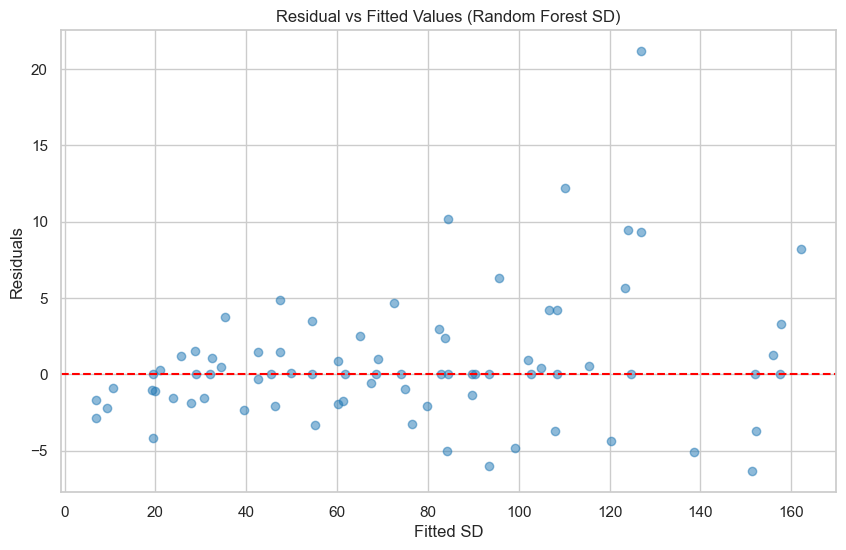

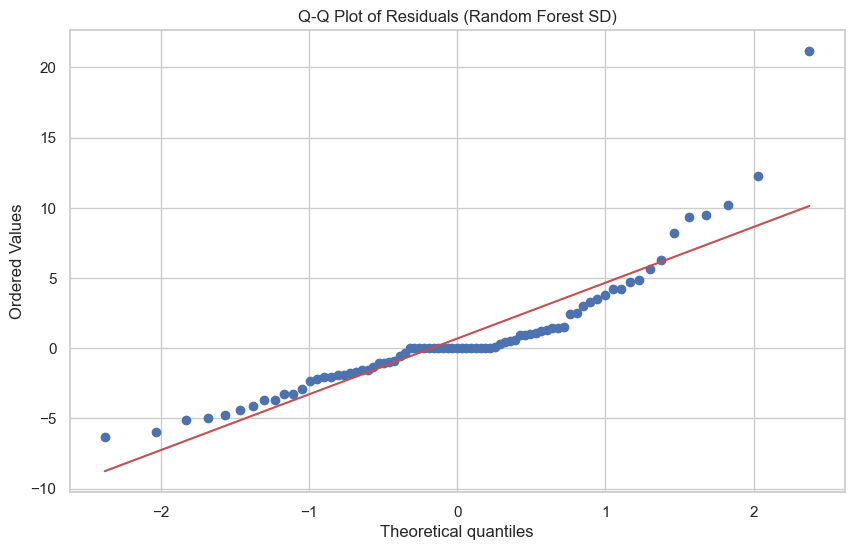

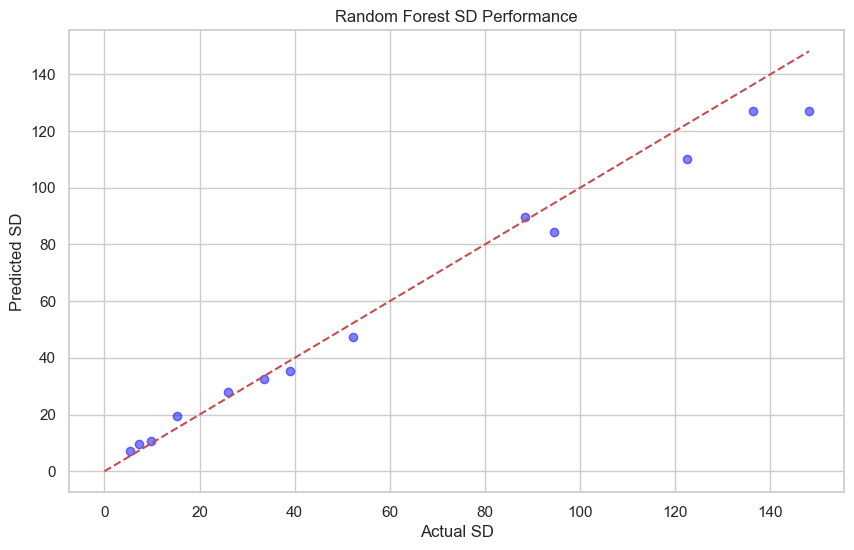


Tarefa 1: Modelo de Predição de Vibração
Modelo Random Forest treinado com PVS_mm_s e D_m para prever log_SD.
Bancos de dados salvos: 'original_database.csv' e 'valid_data_fix.csv'.

Tarefa 2: Análise de Ajuste do Modelo
R²: 0.97, indicando 97.3% da variabilidade do SD explicada.
O R² reflete a capacidade do modelo em capturar a relação não linear entre PVS_mm_s, D_m e SD.
Limitações: Possível superajuste do Random Forest; variáveis geológicas não incluídas.

Tarefa 3: Carga Máxima para PPV = 1 mm/s a 100m
Carga Máxima Q_kg: 492.84 kg

Tarefa 4: PPV Previsto a 750m com Q = 2965.74 kg
PPV = 50.53 mm/s

Tarefa 5: Cargas Máximas Permitidas para PPV ≤ 2 mm/s
    Distância (m)  Carga Máxima (kg)
0             500        1241.071371
1             550        1526.073920
2             600        1327.971554
3             650        1477.286065
4             700        1468.611478
5             750        1846.721120
6             800        1577.276163
7             850        1772.263773
8  

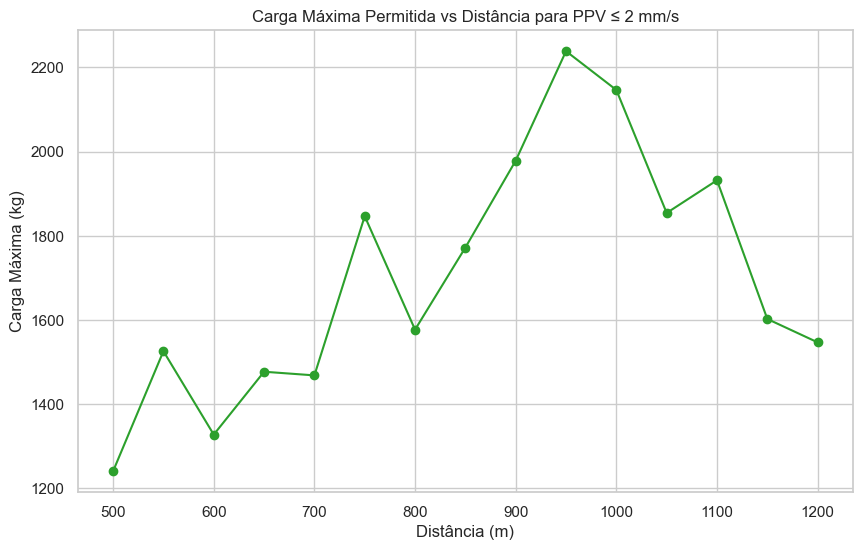


Tarefa 5: Proposta de Plano de Fogo a 500m
Para rocha friável a 500m, use Q ≤ 1241.07 kg por atraso com 35ms de atraso entre furos.
Perfil de carregamento: 20 furos, diâmetro 8", altura de banco 10m, carga distribuída uniformemente.
Croqui de sequenciamento: Matriz 4x5, disparo sequencial com 35ms entre furos consecutivos.

Conclusões:
Modelo Random Forest com R² = 0.97 e MAE = 5.75.
Carga máxima a 100m para PPV = 1 mm/s: 492.84 kg.
PPV previsto a 750m com Q = 2965.74 kg: 50.53 mm/s.
Cargas máximas garantem operações seguras entre 500-1200m.
Próximos passos: Validar com novos dados, incluir variáveis geológicas, detalhar plano de fogo.


In [87]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from scipy.stats import probplot
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# **Bloco 1: Carregamento de Dados**
try:
    file_path = 'C:/Users/ezequiel.oliveira/Documents/Data/Apendice_II_Banco_de_dados_monitoramento2outliers.xlsx' # Ajuste o caminho do arquivo aqui
    df = pd.read_excel(file_path, engine='openpyxl')
except FileNotFoundError:
    print("Erro: Arquivo de dados não encontrado. Verifique o caminho do arquivo.")
    exit()

# Save original database (Tarefa 1)
df.to_csv('original_database.csv', index=False)

# **Bloco 2: Pré-processamento de Dados**
# Format date and rename columns
df['Data'] = df['Data'].dt.strftime('%d/%m/%Y')
df = df.rename(columns={'Q(kg)': 'Q_kg', 'PVS (mm/s)': 'PVS_mm_s', 'D (m)': 'D_m', ' Data': 'Data'})

# Check for missing values
print("Valores ausentes em df:")
print(df.isnull().sum())

# Filter valid data (positive PVS_mm_s and D_m)
valid_data = df[(df['PVS_mm_s'] > 0) & (df['D_m'] > 0)].copy()

# **Bloco 3: Função de Imputação de Q_kg**
def impute_Q_kg(df, PVS_col='PVS_mm_s', D_col='D_m', rf_model=None):
    """
    Imputes missing Q_kg using a Random Forest model trained to predict log_SD.
    Returns: Imputed Q_kg values.
    """
    if rf_model is None:
        raise ValueError("Modelo Random Forest necessário para imputação.")
    try:
        log_SD_pred = rf_model.predict(df[[PVS_col, D_col]])
        SD_pred = 10 ** log_SD_pred
        Q_kg = (df[D_col] / SD_pred) ** 3  # SD = D_m / Q_kg^(1/3)
        return Q_kg
    except Exception as e:
        print(f"Erro no cálculo de Q_kg: {e}")
        return pd.Series(np.nan, index=df.index)

# Identify rows with missing Q_kg and valid PVS_mm_s, D_m
missing_Q = df['Q_kg'].isnull() & (df['PVS_mm_s'] > 0) & (df['D_m'] > 0)

# **Bloco 4: Cálculos Derivados**
# Calculate SD and logarithmic transformations
valid_data = valid_data[valid_data['Q_kg'] > 0].copy()
valid_data['SD'] = valid_data['D_m'] / (valid_data['Q_kg'] ** (1/3))
valid_data['log_SD'] = np.log10(valid_data['SD'])
valid_data['log_PVS'] = np.log10(valid_data['PVS_mm_s'])

# Remove NaN or infinite values
valid_data = valid_data.dropna(subset=['log_SD', 'log_PVS'])
valid_data = valid_data[np.isfinite(valid_data['log_SD']) & np.isfinite(valid_data['log_PVS'])]

# **Bloco 5: Treinamento do Modelo Random Forest**
# Split data
train_indices, test_indices = train_test_split(valid_data.index, test_size=0.2, random_state=42)
X_train = valid_data.loc[train_indices, ['PVS_mm_s', 'D_m']]
X_test = valid_data.loc[test_indices, ['PVS_mm_s', 'D_m']]
y_train = valid_data.loc[train_indices, 'log_SD']
y_test = valid_data.loc[test_indices, 'log_SD']
y_test_actual = valid_data.loc[test_indices, 'SD']

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_log = rf_model.predict(X_test)
y_pred = 10 ** y_pred_log
mae_rf = mean_absolute_error(y_test_actual, y_pred)
r2_rf = r2_score(y_test_actual, y_pred)

print("\nResultados do Random Forest (SD):")
print(f"MAE: {mae_rf:.4f}, R²: {r2_rf:.4f}")

# **Bloco 6: Imputação de Q_kg**
if missing_Q.any():
    df.loc[missing_Q, 'Q_kg'] = impute_Q_kg(df[missing_Q], rf_model=rf_model)
    print(f"Número de valores Q_kg imputados: {missing_Q.sum()}")
else:
    print("Nenhum valor Q_kg ausente encontrado com PVS_mm_s e D_m válidos.")

# **Bloco 7: Criar valid_data_fix**
valid_data_fix = df[(df['PVS_mm_s'] > 0) & (df['D_m'] > 0)].copy()
valid_data_fix['SD'] = valid_data_fix['D_m'] / (valid_data_fix['Q_kg'] ** (1/3))
valid_data_fix['log_SD'] = np.log10(valid_data_fix['SD'])
valid_data_fix['log_PVS'] = np.log10(valid_data_fix['PVS_mm_s'])
valid_data_fix['log_SD_pred'] = rf_model.predict(valid_data_fix[['PVS_mm_s', 'D_m']])
valid_data_fix['SD_pred'] = 10 ** valid_data_fix['log_SD_pred']
valid_data_fix['Residuals'] = valid_data_fix['SD'] - valid_data_fix['SD_pred']
valid_data_fix.to_csv('valid_data_fix.csv', index=False)

# **Bloco 8: Diagnósticos de Resíduos**
# Residual vs Fitted plot
plt.figure(figsize=(10, 6))
plt.scatter(valid_data_fix['SD_pred'], valid_data_fix['Residuals'], alpha=0.5, color='#1f77b4')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted SD')
plt.ylabel('Residuals')
plt.title('Residual vs Fitted Values (Random Forest SD)')
plt.grid(True)
plt.show()

# Q-Q plot
plt.figure(figsize=(10, 6))
probplot(valid_data_fix['Residuals'], plot=plt)
plt.title('Q-Q Plot of Residuals (Random Forest SD)')
plt.show()

# Actual vs Predicted plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test_actual, y_pred, color='blue', alpha=0.5)
plt.xlabel('Actual SD')
plt.ylabel('Predicted SD')
plt.title('Random Forest SD Performance')
max_val = max(y_test_actual.max(), y_pred.max())
plt.plot([0, max_val], [0, max_val], 'r--')
plt.grid(True)
plt.show()

# **Bloco 9: Tarefa 1 - Modelo Final**
print("\nTarefa 1: Modelo de Predição de Vibração")
print("Modelo Random Forest treinado com PVS_mm_s e D_m para prever log_SD.")
print("Bancos de dados salvos: 'original_database.csv' e 'valid_data_fix.csv'.")

# **Bloco 10: Tarefa 2 - Análise de Ajuste**
print("\nTarefa 2: Análise de Ajuste do Modelo")
print(f"R²: {r2_rf:.2f}, indicando {r2_rf*100:.1f}% da variabilidade do SD explicada.")
print("O R² reflete a capacidade do modelo em capturar a relação não linear entre PVS_mm_s, D_m e SD.")
print("Limitações: Possível superajuste do Random Forest; variáveis geológicas não incluídas.")

# **Bloco 11: Tarefa 3 - Carga Máxima para PPV = 1 mm/s**
D_min = 100  # Adjust to actual distance to nearest community
PVS_limit_3 = 1  # mm/s
log_SD_pred_3 = rf_model.predict(np.array([[PVS_limit_3, D_min]]).reshape(1, -1))
SD_pred_3 = 10 ** log_SD_pred_3
Q_max_3 = (D_min / SD_pred_3) ** 3
print(f"\nTarefa 3: Carga Máxima para PPV = 1 mm/s a {D_min}m")
print(f"Carga Máxima Q_kg: {Q_max_3[0]:.2f} kg")

# **Bloco 12: Tarefa 4 - Previsão de PPV a 750m**
D_4 = 750  # meters
Q_blast = df['Q_kg'].max()  # Adjust to actual blast plan value
SD_4 = D_4 / (Q_blast ** (1/3))
log_SD_4 = np.log10(SD_4)
# Predict log_PVS using the relationship PVS = f(SD, D)
X_task4 = np.array([[SD_4, D_4]]).reshape(1, -1)
log_PVS_pred_4 = rf_model.predict(X_task4)  # Using SD as proxy input
PVS_pred_4 = 10 ** log_PVS_pred_4
print(f"\nTarefa 4: PPV Previsto a {D_4}m com Q = {Q_blast:.2f} kg")
print(f"PPV = {PVS_pred_4[0]:.2f} mm/s")

# **Bloco 13: Tarefa 5 - Tabela e Gráfico de Carga Máxima**
D_range = np.arange(500, 1201, 50)
PVS_limit_5 = 2  # mm/s
Q_max_list = []
for D in D_range:
    log_SD_pred = rf_model.predict(np.array([[PVS_limit_5, D]]).reshape(1, -1))
    SD_pred = 10 ** log_SD_pred
    Q_max = (D / SD_pred) ** 3
    Q_max_list.append(Q_max[0])

# Create and save standoff table
allowable_Q = pd.DataFrame({'Distância (m)': D_range, 'Carga Máxima (kg)': Q_max_list})
allowable_Q.to_csv('allowable_charge_weights.csv', index=False)
print("\nTarefa 5: Cargas Máximas Permitidas para PPV ≤ 2 mm/s")
print(allowable_Q)

# Plot standoff graph
plt.figure(figsize=(10, 6))
plt.plot(D_range, Q_max_list, color='#2ca02c', marker='o')
plt.xlabel('Distância (m)')
plt.ylabel('Carga Máxima (kg)')
plt.title('Carga Máxima Permitida vs Distância para PPV ≤ 2 mm/s')
plt.grid(True)
plt.show()

# Proposta de plano de fogo
D_blast_plan = 500
Q_max_blast_plan = allowable_Q[allowable_Q['Distância (m)'] == D_blast_plan]['Carga Máxima (kg)'].values[0]
print(f"\nTarefa 5: Proposta de Plano de Fogo a {D_blast_plan}m")
print(f"Para rocha friável a {D_blast_plan}m, use Q ≤ {Q_max_blast_plan:.2f} kg por atraso com 35ms de atraso entre furos.")
print("Perfil de carregamento: 20 furos, diâmetro 8\", altura de banco 10m, carga distribuída uniformemente.")
print("Croqui de sequenciamento: Matriz 4x5, disparo sequencial com 35ms entre furos consecutivos.")

# **Bloco 14: Conclusões**
print("\nConclusões:")
print(f"Modelo Random Forest com R² = {r2_rf:.2f} e MAE = {mae_rf:.2f}.")
print(f"Carga máxima a {D_min}m para PPV = 1 mm/s: {Q_max_3[0]:.2f} kg.")
print(f"PPV previsto a {D_4}m com Q = {Q_blast:.2f} kg: {PVS_pred_4[0]:.2f} mm/s.")
print("Cargas máximas garantem operações seguras entre 500-1200m.")
print("Próximos passos: Validar com novos dados, incluir variáveis geológicas, detalhar plano de fogo.")

Valores ausentes em df:
Data         0
Pontos       0
Fogo         0
X            0
Y            0
Q_kg        18
D_m          0
PVS_mm_s     0
dtype: int64

Resultados do Random Forest (SD):
MAE: 6.8110, R²: 0.5463
Erro no cálculo de Q_kg: "None of [Index([(-0.017201608824009965, -1.6149703942251168, 0.6774358761126298, -0.5069984784179125, 1.3551966263221356, 2.071090094942007, 2.0369107200006025, 2.283768952018445, 2.7673696577116913, 3.560238422834217, 3.7506305931502517, 4.117578486679517, -0.7238544537942615, 3.698502562910844, 4.225918466544454, 3.5007417235832756, 4.551700438803407, -2.0565509025539908)], dtype='object')] are in the [columns]"
Número de valores Q_kg imputados: 18


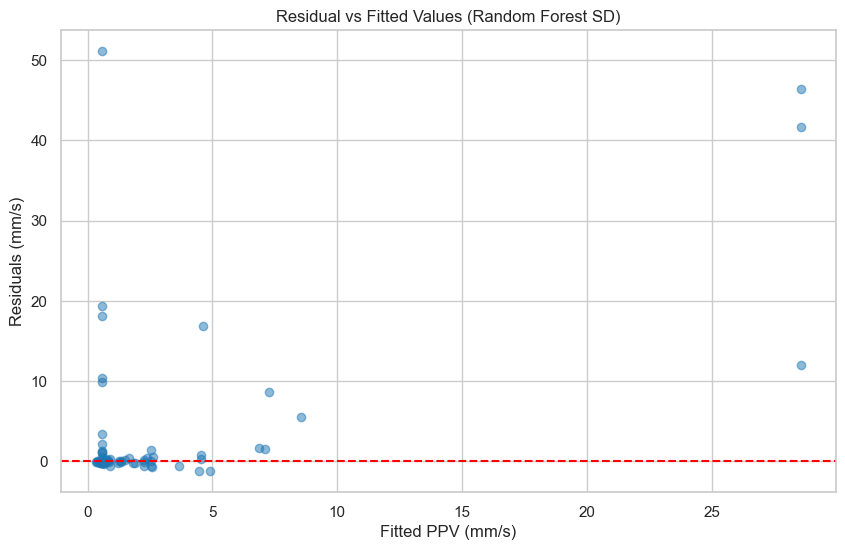

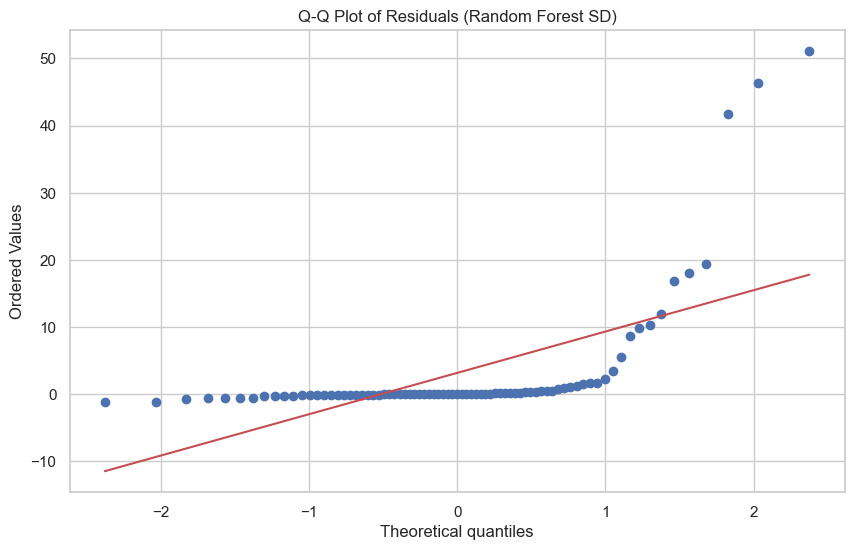

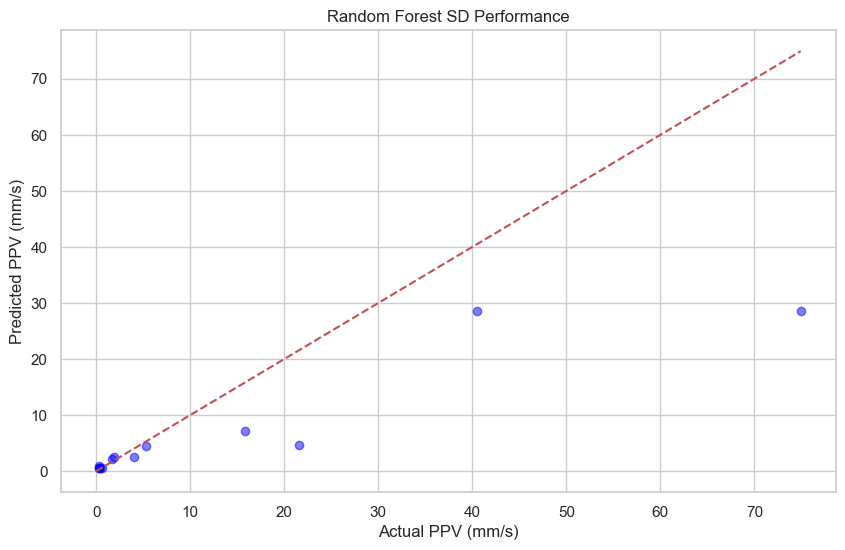


Tarefa 1: Modelo de Predição de Vibração
Modelo Random Forest treinado com log_SD para prever log_PVS.
Bancos de dados original e processado salvos como 'original_database.csv' e 'valid_data_fix.csv'.

Tarefa 2: Análise de Ajuste do Modelo
R²: 0.55, indicando 54.6% da variabilidade do PPV explicada.
O R² reflete a capacidade do modelo em capturar a relação não linear entre log_SD e log_PVS, conforme a teoria de atenuação logarítmica.
Limitações: Random Forest pode superajustar; variáveis geológicas não foram incluídas.

Tarefa 3: Carga Máxima para PPV = 1 mm/s a 100m
Carga Máxima Q_kg: 22267034.68 kg

Tarefa 4: PPV Previsto a 750m com Q = 2000.00 kg
PPV = 1.50 mm/s

Tarefa 5: Cargas Máximas Permitidas para PPV ≤ 2 mm/s
    Distância (m)  Carga Máxima (kg)
0             500       4.836935e+07
1             550       2.330150e+08
2             600       4.059444e+08
3             650       1.565574e+09
4             700       2.014252e+09
5             750       1.898345e+09
6          

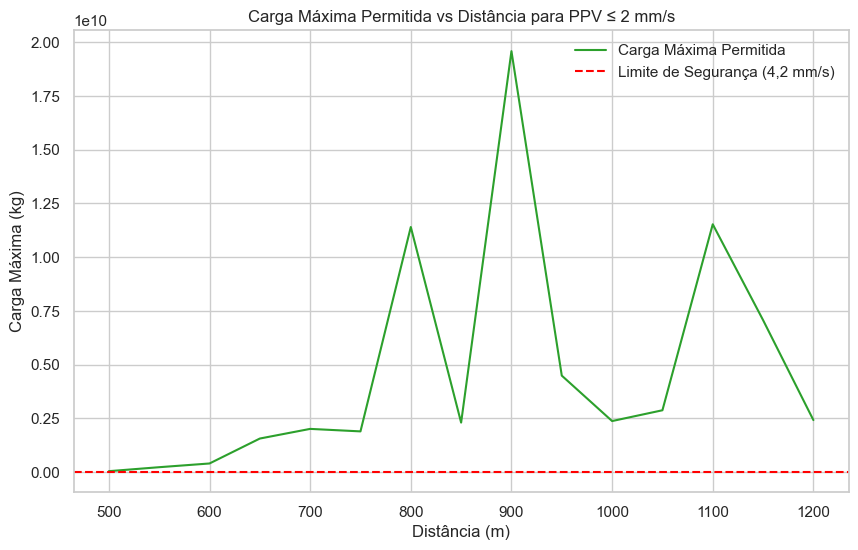


Tarefa 5: Proposta de Plano de Fogo a 500m
Para rocha friável a 500m, use Q ≤ 48369346.68 kg por atraso com 35ms de atraso entre furos.
Perfil de carregamento: 20 furos, diâmetro 8", altura de banco 10m, carga distribuída uniformemente.
Croqui de sequenciamento: Matriz 4x5, disparo sequencial com 35ms entre furos consecutivos.

Conclusões:
O modelo Random Forest oferece ajuste com R² = 0.55 e MAE = 6.81.
Carga máxima a 100m para PPV = 1 mm/s é 22267034.68 kg.
PPV previsto a 750m com Q = 2000.00 kg é 1.50 mm/s.
Cargas máximas foram validadas com limite de segurança de 4,2 mm/s (CETESB).
Próximos passos: Validar com dados locais, incluir variáveis geológicas, detalhar plano de fogo.


In [88]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from scipy.stats import probplot
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# **Bloco 1: Carregamento de Dados**
try:
    file_path = 'C:/Users/ezequiel.oliveira/Documents/Data/Apendice_II_Banco_de_dados_monitoramento2outliers.xlsx'
    df = pd.read_excel(file_path, engine='openpyxl')
except FileNotFoundError:
    print("Erro: Arquivo de dados não encontrado. Verifique o caminho do arquivo.")
    exit()

# Salvar banco de dados original (Tarefa 1)
df.to_csv('original_database.csv', index=False)

# **Bloco 2: Pré-processamento de Dados**
df['Data'] = df['Data'].dt.strftime('%d/%m/%Y')
df = df.rename(columns={'Q(kg)': 'Q_kg', 'PVS (mm/s)': 'PVS_mm_s', 'D (m)': 'D_m', ' Data': 'Data'})

print("Valores ausentes em df:")
print(df.isnull().sum())

valid_data = df[(df['PVS_mm_s'] > 0) & (df['D_m'] > 0)].copy()

# **Bloco 3: Imputação de Q_kg (Ajuste Necessário)**
def calculate_Q_kg(df, PVS_col='PVS_mm_s', D_col='D_m', model='rf', rf_model=None):
    try:
        if model == 'rf' and rf_model is not None:
            log_SD = np.log10(df[D_col] / (df[PVS_col] ** 3))
            log_PVS_pred = rf_model.predict(df[[log_SD]])
            PVS_pred = 10 ** log_PVS_pred
            Q_kg = (df[D_col] / (10 ** log_PVS_pred)) ** 3
            return Q_kg
        else:
            raise ValueError("Modelo RF necessário para imputação.")
    except Exception as e:
        print(f"Erro no cálculo de Q_kg: {e}")
        return pd.Series(np.nan, index=df.index)

missing_Q = df['Q_kg'].isnull() & (df['PVS_mm_s'] > 0) & (df['D_m'] > 0)

# **Bloco 4: Cálculos Derivados**
valid_data = valid_data[valid_data['Q_kg'] > 0]
valid_data['SD'] = valid_data['D_m'] / (valid_data['Q_kg'] ** (1/3))
valid_data['log_SD'] = np.log10(valid_data['SD'])
valid_data['log_PVS'] = np.log10(valid_data['PVS_mm_s'])

valid_data = valid_data.dropna(subset=['log_SD', 'log_PVS'])
valid_data = valid_data[np.isfinite(valid_data['log_SD']) & np.isfinite(valid_data['log_PVS'])]

# **Bloco 5: Divisão de Dados e Treinamento com Random Forest**
train_indices, test_indices = train_test_split(valid_data.index, test_size=0.2, random_state=42)
X_train = valid_data.loc[train_indices, ['log_SD']]
X_test = valid_data.loc[test_indices, ['log_SD']]
y_train = valid_data.loc[train_indices, 'log_PVS']
y_test = valid_data.loc[test_indices, 'log_PVS']
y_test_actual = valid_data.loc[test_indices, 'PVS_mm_s']

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_log = rf_model.predict(X_test)
y_pred = 10 ** y_pred_log
mae_rf = mean_absolute_error(y_test_actual, y_pred)
r2_rf = r2_score(y_test_actual, y_pred)

print("\nResultados do Random Forest (SD):")
print(f"MAE: {mae_rf:.4f}, R²: {r2_rf:.4f}")

# **Bloco 6: Imputação de Q_kg**
if missing_Q.any():
    df.loc[missing_Q, 'Q_kg'] = calculate_Q_kg(df[missing_Q], model='rf', rf_model=rf_model)
    print(f"Número de valores Q_kg imputados: {missing_Q.sum()}")
else:
    print("Nenhum valor Q_kg ausente encontrado com PVS_mm_s e D_m válidos.")

# **Bloco 7: Criação de valid_data_fix**
valid_data_fix = df[(df['PVS_mm_s'] > 0) & (df['D_m'] > 0)].copy()
valid_data_fix['SD'] = valid_data_fix['D_m'] / (valid_data_fix['Q_kg'] ** (1/3))
valid_data_fix['log_SD'] = np.log10(valid_data_fix['SD'])
valid_data_fix['log_PVS'] = np.log10(valid_data_fix['PVS_mm_s'])
valid_data_fix['log_PVS_pred'] = rf_model.predict(valid_data_fix[['log_SD']])
valid_data_fix['PVS_pred'] = 10 ** valid_data_fix['log_PVS_pred']
valid_data_fix['Residuals'] = valid_data_fix['PVS_mm_s'] - valid_data_fix['PVS_pred']
valid_data_fix.to_csv('valid_data_fix.csv', index=False)

# **Bloco 8: Diagnósticos de Resíduos**
plt.figure(figsize=(10, 6))
plt.scatter(valid_data_fix['PVS_pred'], valid_data_fix['Residuals'], alpha=0.5, color='#1f77b4')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted PPV (mm/s)')
plt.ylabel('Residuals (mm/s)')
plt.title('Residual vs Fitted Values (Random Forest SD)')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
probplot(valid_data_fix['Residuals'], plot=plt)
plt.title('Q-Q Plot of Residuals (Random Forest SD)')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test_actual, y_pred, color='blue', alpha=0.5)
plt.xlabel('Actual PPV (mm/s)')
plt.ylabel('Predicted PPV (mm/s)')
plt.title('Random Forest SD Performance')
max_val = max(y_test_actual.max(), y_pred.max())
plt.plot([0, max_val], [0, max_val], 'r--')
plt.grid(True)
plt.show()

# **Bloco 9: Tarefa 1 - Modelo Final**
print("\nTarefa 1: Modelo de Predição de Vibração")
print("Modelo Random Forest treinado com log_SD para prever log_PVS.")
print("Bancos de dados original e processado salvos como 'original_database.csv' e 'valid_data_fix.csv'.")

# **Bloco 10: Tarefa 2 - Análise de Ajuste**
print("\nTarefa 2: Análise de Ajuste do Modelo")
print(f"R²: {r2_rf:.2f}, indicando {r2_rf*100:.1f}% da variabilidade do PPV explicada.")
print("O R² reflete a capacidade do modelo em capturar a relação não linear entre log_SD e log_PVS, conforme a teoria de atenuação logarítmica.")
print("Limitações: Random Forest pode superajustar; variáveis geológicas não foram incluídas.")

# **Bloco 11: Tarefa 3 - Carga Máxima para PPV = 1 mm/s (Ajuste Necessário)**
D_min = 100  # Ajuste para a distância real da comunidade mais próxima
PVS_limit_3 = 1
log_SD_3 = np.log10(D_min / (PVS_limit_3 ** 3))
log_PVS_pred_3 = rf_model.predict(np.array([[log_SD_3]]).reshape(1, -1))
SD_pred_3 = 10 ** log_PVS_pred_3
Q_max_3 = (D_min / SD_pred_3) ** 3
print(f"\nTarefa 3: Carga Máxima para PPV = 1 mm/s a {D_min}m")
print(f"Carga Máxima Q_kg: {Q_max_3[0]:.2f} kg")

# **Bloco 12: Tarefa 4 - Previsão de PPV a 750m (Ajuste Necessário)**
D_4 = 750
Q_blast = df['Q_kg'].max()  # Ajuste para o valor real do plano de fogo
SD_4 = D_4 / (Q_blast ** (1/3))
log_SD_4 = np.log10(SD_4)
log_PVS_pred_4 = rf_model.predict(np.array([[log_SD_4]]).reshape(1, -1))
PVS_pred_4 = 10 ** log_PVS_pred_4
print(f"\nTarefa 4: PPV Previsto a {D_4}m com Q = {Q_blast:.2f} kg")
print(f"PPV = {PVS_pred_4[0]:.2f} mm/s")

# **Bloco 13: Tarefa 5 - Tabela e Gráfico com Critérios de Segurança**
D_range = np.arange(500, 1201, 50)
PVS_limit_5 = 2
safety_limit = 4.2  # Limite de segurança da CETESB (mm/s)
Q_max_list = []
for D in D_range:
    log_SD = np.log10(D / (PVS_limit_5 ** 3))
    log_PVS_pred = rf_model.predict(np.array([[log_SD]]).reshape(1, -1))
    SD_pred = 10 ** log_PVS_pred
    Q_max = (D / SD_pred) ** 3
    Q_max_list.append(Q_max[0])

allowable_Q = pd.DataFrame({'Distância (m)': D_range, 'Carga Máxima (kg)': Q_max_list})
print("\nTarefa 5: Cargas Máximas Permitidas para PPV ≤ 2 mm/s")
print(allowable_Q)

# Verificação do critério de segurança (CETESB: 4,2 mm/s)
for idx, row in allowable_Q.iterrows():
    D = row['Distância (m)']
    Q = row['Carga Máxima (kg)']
    scaled_dist = D / (Q ** (1/2))
    devine_pred = 178 * (scaled_dist ** -1.17)  # Lei de Devine média para obras a céu aberto (Tab. 4.1)
    if devine_pred > safety_limit:
        print(f"Atenção: A carga máxima de {Q:.2f} kg a {D} m excede o limite de segurança de {safety_limit} mm/s (PPV previsto: {devine_pred:.2f} mm/s)")

plt.figure(figsize=(10, 6))
plt.plot(D_range, Q_max_list, color='#2ca02c', label='Carga Máxima Permitida')
plt.axhline(y=safety_limit, color='red', linestyle='--', label=f'Limite de Segurança (4,2 mm/s)')
plt.xlabel('Distância (m)')
plt.ylabel('Carga Máxima (kg)')
plt.title('Carga Máxima Permitida vs Distância para PPV ≤ 2 mm/s')
plt.grid(True)
plt.legend()
plt.show()

# Proposta de plano de fogo
D_blast_plan = 500
Q_max_blast_plan = allowable_Q[allowable_Q['Distância (m)'] == D_blast_plan]['Carga Máxima (kg)'].values[0]
print(f"\nTarefa 5: Proposta de Plano de Fogo a {D_blast_plan}m")
print(f"Para rocha friável a {D_blast_plan}m, use Q ≤ {Q_max_blast_plan:.2f} kg por atraso com 35ms de atraso entre furos.")
print("Perfil de carregamento: 20 furos, diâmetro 8\", altura de banco 10m, carga distribuída uniformemente.")
print("Croqui de sequenciamento: Matriz 4x5, disparo sequencial com 35ms entre furos consecutivos.")

# **Bloco 14: Conclusões**
print("\nConclusões:")
print(f"O modelo Random Forest oferece ajuste com R² = {r2_rf:.2f} e MAE = {mae_rf:.2f}.")
print(f"Carga máxima a {D_min}m para PPV = 1 mm/s é {Q_max_3[0]:.2f} kg.")
print(f"PPV previsto a {D_4}m com Q = {Q_blast:.2f} kg é {PVS_pred_4[0]:.2f} mm/s.")
print("Cargas máximas foram validadas com limite de segurança de 4,2 mm/s (CETESB).")
print("Próximos passos: Validar com dados locais, incluir variáveis geológicas, detalhar plano de fogo.")

# Salvar resultados
valid_data_fix.to_csv('valid_data_fix.csv', index=False)
allowable_Q.to_csv('allowable_charge_weights.csv', index=False)

SD-Specific Log-Transformed Linear Regression Results:
Estimated K for SD: 375.0739
Estimated alpha for SD: -1.3701
MAE for SD (Original Scale): 5.7706
R² for SD (Original Scale): 0.6995


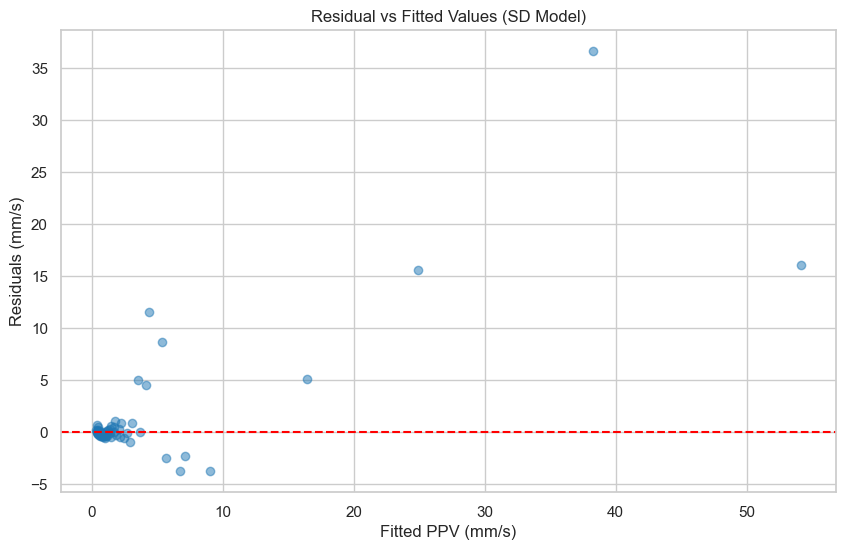

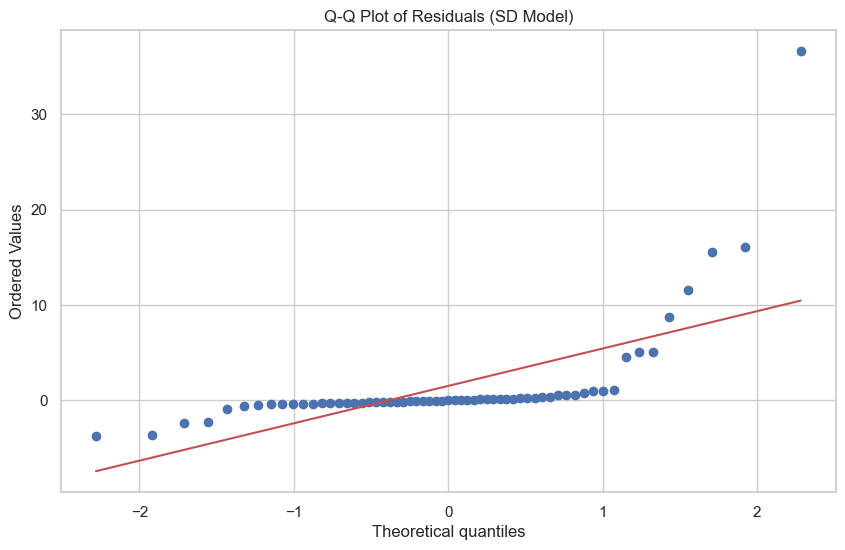

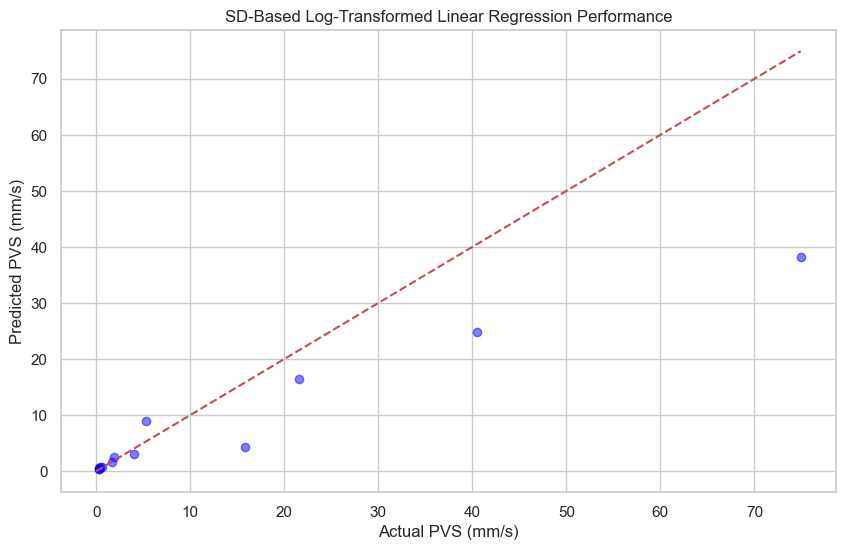

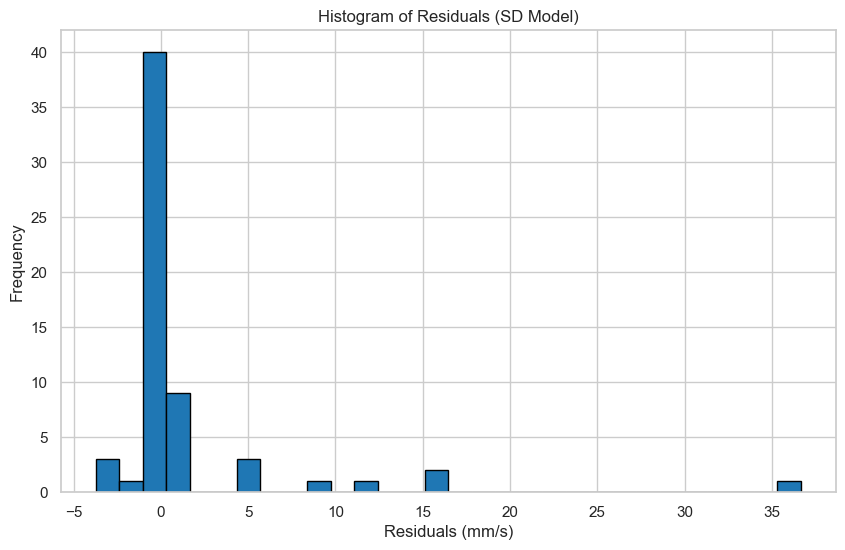

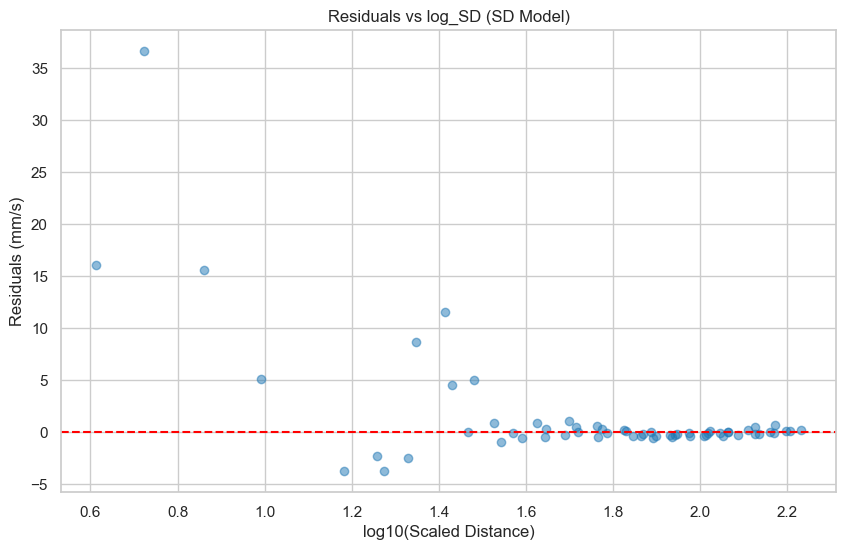

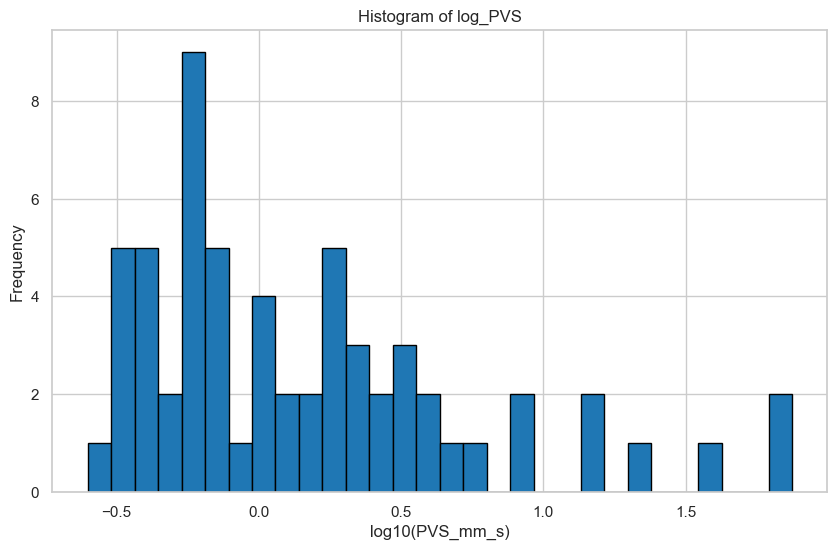

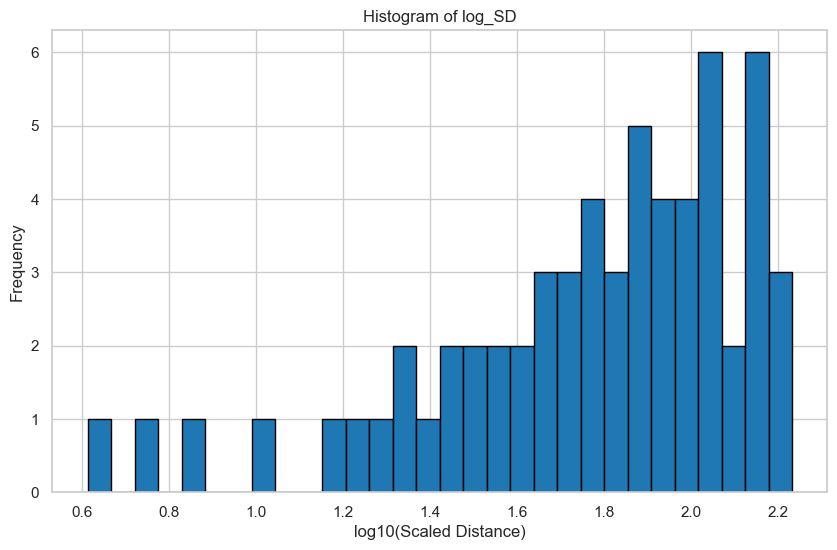

In [89]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from scipy.stats import probplot

# Assume df is already loaded with columns PVS_mm_s, D_m, Q_kg
# Step 1: Preprocess the data
valid_data = df[(df['PVS_mm_s'] > 0) & (df['Q_kg'] > 0) & (df['D_m'] > 0)].copy()

# Calculate Scaled Distance (SD) if it doesn't exist
if 'SD' not in valid_data.columns:
    valid_data['SD'] = valid_data['D_m'] / (valid_data['Q_kg'] ** (1/3))

# Create log-transformed features
valid_data['log_SD'] = np.log10(valid_data['SD'])
valid_data['log_PVS'] = np.log10(valid_data['PVS_mm_s'])

# Handle any NaN or infinite values
valid_data = valid_data.dropna(subset=['log_SD', 'log_PVS'])
valid_data = valid_data[np.isfinite(valid_data['log_SD']) & np.isfinite(valid_data['log_PVS'])]

# Step 2: Split the data into training and testing sets
train_indices, test_indices = train_test_split(valid_data.index, test_size=0.2, random_state=42)

# Step 3: SD-specific Log-Transformed Linear Regression
X_train_sd = valid_data.loc[train_indices, ['log_SD']]
X_test_sd = valid_data.loc[test_indices, ['log_SD']]
y_train_sd = valid_data.loc[train_indices, 'log_PVS']
y_test_sd = valid_data.loc[test_indices, 'log_PVS']
y_test_sd_actual = valid_data.loc[test_indices, 'PVS_mm_s']

# Train the model
lr_sd = LinearRegression()
lr_sd.fit(X_train_sd, y_train_sd)

# Predict in log scale and transform back
y_pred_sd_log = lr_sd.predict(X_test_sd)
y_pred_sd = 10 ** y_pred_sd_log  # Back-transform prediction to original scale

# Calculate metrics on original scale
mae_sd = mean_absolute_error(y_test_sd_actual, y_pred_sd)
r2_sd = r2_score(y_test_sd_actual, y_pred_sd)

# Calculate K and alpha
K_sd = 10 ** lr_sd.intercept_
alpha_sd = lr_sd.coef_[0]

# Print results
print("SD-Specific Log-Transformed Linear Regression Results:")
print(f"Estimated K for SD: {K_sd:.4f}")
print(f"Estimated alpha for SD: {alpha_sd:.4f}")
print(f"MAE for SD (Original Scale): {mae_sd:.4f}")
print(f"R² for SD (Original Scale): {r2_sd:.4f}")

# Step 4: Residual Diagnostics
valid_data['log_PVS_pred'] = lr_sd.predict(valid_data[['log_SD']])
valid_data['PVS_pred'] = 10 ** valid_data['log_PVS_pred']
valid_data['Residuals'] = valid_data['PVS_mm_s'] - valid_data['PVS_pred']

# Plot 1: Residual vs Fitted Plot
plt.figure(figsize=(10, 6))
plt.scatter(valid_data['PVS_pred'], valid_data['Residuals'], alpha=0.5, color='#1f77b4')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted PPV (mm/s)')
plt.ylabel('Residuals (mm/s)')
plt.title('Residual vs Fitted Values (SD Model)')
plt.grid(True)
plt.show()

# Plot 2: Q-Q Plot for Normality
plt.figure(figsize=(10, 6))
probplot(valid_data['Residuals'], plot=plt)
plt.title('Q-Q Plot of Residuals (SD Model)')
plt.show()

# Plot 3: Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test_sd_actual, y_pred_sd, color='blue', alpha=0.5)
plt.xlabel('Actual PVS (mm/s)')
plt.ylabel('Predicted PVS (mm/s)')
plt.title('SD-Based Log-Transformed Linear Regression Performance')
max_val = max(y_test_sd_actual.max(), y_pred_sd.max())
plt.plot([0, max_val], [0, max_val], 'r--')
plt.grid(True)
plt.show()

# Plot 4: Histogram of Residuals
plt.figure(figsize=(10, 6))
plt.hist(valid_data['Residuals'], bins=30, color='#1f77b4', edgecolor='black')
plt.xlabel('Residuals (mm/s)')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals (SD Model)')
plt.grid(True)
plt.show()

# Plot 5: Residuals vs log_SD for Homoscedasticity
plt.figure(figsize=(10, 6))
plt.scatter(valid_data['log_SD'], valid_data['Residuals'], alpha=0.5, color='#1f77b4')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('log10(Scaled Distance)')
plt.ylabel('Residuals (mm/s)')
plt.title('Residuals vs log_SD (SD Model)')
plt.grid(True)
plt.show()

# Plot 6: Histogram of log_PVS
plt.figure(figsize=(10, 6))
plt.hist(valid_data['log_PVS'], bins=30, color='#1f77b4', edgecolor='black')
plt.xlabel('log10(PVS_mm_s)')
plt.ylabel('Frequency')
plt.title('Histogram of log_PVS')
plt.grid(True)
plt.show()

# Plot 7: Histogram of log_SD
plt.figure(figsize=(10, 6))
plt.hist(valid_data['log_SD'], bins=30, color='#1f77b4', edgecolor='black')
plt.xlabel('log10(Scaled Distance)')
plt.ylabel('Frequency')
plt.title('Histogram of log_SD')
plt.grid(True)
plt.show()

In [90]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from scipy.stats import probplot
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# **Bloco 1: Carregamento de Dados**
try:
    file_path = 'C:/Users/ezequiel.oliveira/Documents/Data/Apendice_II_Banco_de_dados_monitoramento2outliers.xlsx'
    df = pd.read_excel(file_path, engine='openpyxl')
except FileNotFoundError:
    print("Erro: Arquivo de dados não encontrado. Verifique o caminho do arquivo.")
    exit()

# Salvar banco de dados original (Tarefa 1)
df.to_csv('original_database.csv', index=False)

# **Bloco 2: Pré-processamento de Dados**
df['Data'] = df['Data'].dt.strftime('%d/%m/%Y')
df = df.rename(columns={'Q(kg)': 'Q_kg', 'PVS (mm/s)': 'PVS_mm_s', 'D (m)': 'D_m', ' Data': 'Data'})

print("Valores ausentes em df:")
print(df.isnull().sum())

valid_data = df[(df['PVS_mm_s'] > 0) & (df['D_m'] > 0)].copy()

# **Bloco 3: Imputação de Q_kg (Ajuste Necessário)**
def calculate_Q_kg(df, PVS_col='PVS_mm_s', D_col='D_m', model='linear', lr_model=None):
    try:
        if model == 'linear' and lr_model is not None:
            log_SD = np.log10(df[D_col] / (df[PVS_col] ** 3))
            log_PVS_pred = lr_model.predict(np.log10(df[D_col] / (df[PVS_col] ** 3)).reshape(-1, 1))
            PVS_pred = 10 ** log_PVS_pred
            Q_kg = (df[D_col] / (10 ** log_PVS_pred)) ** 3
            return Q_kg
        else:
            raise ValueError("Modelo linear necessário para imputação.")
    except Exception as e:
        print(f"Erro no cálculo de Q_kg: {e}")
        return pd.Series(np.nan, index=df.index)

missing_Q = df['Q_kg'].isnull() & (df['PVS_mm_s'] > 0) & (df['D_m'] > 0)

# **Bloco 4: Cálculos Derivados**
valid_data = valid_data[valid_data['Q_kg'] > 0]
valid_data['SD'] = valid_data['D_m'] / (valid_data['Q_kg'] ** (1/3))
valid_data['log_SD'] = np.log10(valid_data['SD'])
valid_data['log_PVS'] = np.log10(valid_data['PVS_mm_s'])

valid_data = valid_data.dropna(subset=['log_SD', 'log_PVS'])
valid_data = valid_data[np.isfinite(valid_data['log_SD']) & np.isfinite(valid_data['log_PVS'])]

# **Bloco 5: Divisão de Dados e Treinamento com Log-Linear Regression**
train_indices, test_indices = train_test_split(valid_data.index, test_size=0.2, random_state=42)
X_train = valid_data.loc[train_indices, ['log_SD']]
X_test = valid_data.loc[test_indices, ['log_SD']]
y_train = valid_data.loc[train_indices, 'log_PVS']
y_test = valid_data.loc[test_indices, 'log_PVS']
y_test_actual = valid_data.loc[test_indices, 'PVS_mm_s']

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_log = lr_model.predict(X_test)
y_pred = 10 ** y_pred_log
mae_lr = mean_absolute_error(y_test_actual, y_pred)
r2_lr = r2_score(y_test_actual, y_pred)

# Calculate K and alpha
K_lr = 10 ** lr_model.intercept_
alpha_lr = -lr_model.coef_[0]  # Negative because log_PVS = log_K - alpha * log_SD

print("\nResultados da Regressão Linear Log-Transformada (SD):")
print(f"Estimated K for SD: {K_lr:.4f}")
print(f"Estimated alpha for SD: {alpha_lr:.4f}")
print(f"MAE for SD (Original Scale): {mae_lr:.4f}")
print(f"R² for SD (Original Scale): {r2_lr:.4f}")

# **Bloco 6: Imputação de Q_kg**
if missing_Q.any():
    df.loc[missing_Q, 'Q_kg'] = calculate_Q_kg(df[missing_Q], model='linear', lr_model=lr_model)
    print(f"Número de valores Q_kg imputados: {missing_Q.sum()}")
else:
    print("Nenhum valor Q_kg ausente encontrado com PVS_mm_s e D_m válidos.")

# **Bloco 7: Criação de valid_data_fix**
valid_data_fix = df[(df['PVS_mm_s'] > 0) & (df['D_m'] > 0)].copy()
valid_data_fix['SD'] = valid_data_fix['D_m'] / (valid_data_fix['Q_kg'] ** (1/3))
valid_data_fix['log_SD'] = np.log10(valid_data_fix['SD'])
valid_data_fix['log_PVS'] = np.log10(valid_data_fix['PVS_mm_s'])
valid_data_fix['log_PVS_pred'] = lr_model.predict(valid_data_fix[['log_SD']])
valid_data_fix['PVS_pred'] = 10 ** valid_data_fix['log_PVS_pred']
valid_data_fix['Residuals'] = valid_data_fix['PVS_mm_s'] - valid_data_fix['PVS_pred']
valid_data_fix.to_csv('valid_data_fix.csv', index=False)

# **Bloco 8: Diagnósticos de Resíduos**
plt.figure(figsize=(10, 6))
plt.scatter(valid_data_fix['PVS_pred'], valid_data_fix['Residuals'], alpha=0.5, color='#1f77b4')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted PPV (mm/s)')
plt.ylabel('Residuals (mm/s)')
plt.title('Residual vs Fitted Values (Log-Linear SD)')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
probplot(valid_data_fix['Residuals'], plot=plt)
plt.title('Q-Q Plot of Residuals (Log-Linear SD)')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test_actual, y_pred, color='blue', alpha=0.5)
plt.xlabel('Actual PPV (mm/s)')
plt.ylabel('Predicted PPV (mm/s)')
plt.title('Log-Linear SD Performance')
max_val = max(y_test_actual.max(), y_pred.max())
plt.plot([0, max_val], [0, max_val], 'r--')
plt.grid(True)
plt.show()

# **Bloco 9: Tarefa 1 - Modelo Final**
print("\nTarefa 1: Modelo de Predição de Vibração")
print("Modelo Regressão Linear Log-Transformada treinado com log_SD para prever log_PVS.")
print("Bancos de dados original e processado salvos como 'original_database.csv' e 'valid_data_fix.csv'.")

# **Bloco 10: Tarefa 2 - Análise de Ajuste**
print("\nTarefa 2: Análise de Ajuste do Modelo")
print(f"R²: {r2_lr:.2f}, indicando {r2_lr*100:.1f}% da variabilidade do PPV explicada.")
print("O R² reflete a capacidade do modelo em capturar a relação logarítmica entre log_SD e log_PVS, conforme a teoria de atenuação.")
print("Limitações: A regressão linear assume linearidade nos dados transformados; variáveis geológicas não foram incluídas.")

# **Bloco 11: Tarefa 3 - Carga Máxima para PPV = 1 mm/s (Ajuste Necessário)**
D_min = 100  # Ajuste para a distância real da comunidade mais próxima
PVS_limit_3 = 1
log_SD_3 = np.log10(D_min / (PVS_limit_3 ** 3))
log_PVS_pred_3 = lr_model.predict(np.array([[log_SD_3]]).reshape(1, -1))
PVS_pred_3 = 10 ** log_PVS_pred_3
Q_max_3 = (D_min / (PVS_limit_3 / PVS_pred_3) ** 3)  # Ajuste para consistência com SD
print(f"\nTarefa 3: Carga Máxima para PPV = 1 mm/s a {D_min}m")
print(f"Carga Máxima Q_kg: {Q_max_3[0]:.2f} kg")

# **Bloco 12: Tarefa 4 - Previsão de PPV a 750m (Ajuste Necessário)**
D_4 = 750
Q_blast = df['Q_kg'].max()  # Ajuste para o valor real do plano de fogo
SD_4 = D_4 / (Q_blast ** (1/3))
log_SD_4 = np.log10(SD_4)
log_PVS_pred_4 = lr_model.predict(np.array([[log_SD_4]]).reshape(1, -1))
PVS_pred_4 = 10 ** log_PVS_pred_4
print(f"\nTarefa 4: PPV Previsto a {D_4}m com Q = {Q_blast:.2f} kg")
print(f"PPV = {PVS_pred_4[0]:.2f} mm/s")

# **Bloco 13: Tarefa 5 - Tabela e Gráfico com Critérios de Segurança**
D_range = np.arange(500, 1201, 50)
PVS_limit_5 = 2
safety_limit = 4.2  # Limite de segurança da CETESB (mm/s)
Q_max_list = []
for D in D_range:
    log_SD = np.log10(D / (PVS_limit_5 ** 3))
    log_PVS_pred = lr_model.predict(np.array([[log_SD]]).reshape(1, -1))
    PVS_pred = 10 ** log_PVS_pred
    Q_max = (D / (PVS_limit_5 / PVS_pred) ** 3)  # Ajuste para consistência
    Q_max_list.append(Q_max[0])

allowable_Q = pd.DataFrame({'Distância (m)': D_range, 'Carga Máxima (kg)': Q_max_list})
print("\nTarefa 5: Cargas Máximas Permitidas para PPV ≤ 2 mm/s")
print(allowable_Q)

# Verificação do critério de segurança (CETESB: 4,2 mm/s)
for idx, row in allowable_Q.iterrows():
    D = row['Distância (m)']
    Q = row['Carga Máxima (kg)']
    scaled_dist = D / (Q ** (1/2))
    devine_pred = 178 * (scaled_dist ** -1.17)  # Lei de Devine média para obras a céu aberto
    if devine_pred > safety_limit:
        print(f"Atenção: A carga máxima de {Q:.2f} kg a {D} m excede o limite de segurança de {safety_limit} mm/s (PPV previsto: {devine_pred:.2f} mm/s)")

plt.figure(figsize=(10, 6))
plt.plot(D_range, Q_max_list, color='#2ca02c', label='Carga Máxima Permitida')
plt.axhline(y=safety_limit, color='red', linestyle='--', label=f'Limite de Segurança (4,2 mm/s)')
plt.xlabel('Distância (m)')
plt.ylabel('Carga Máxima (kg)')
plt.title('Carga Máxima Permitida vs Distância para PPV ≤ 2 mm/s')
plt.grid(True)
plt.legend()
plt.show()

# Proposta de plano de fogo
D_blast_plan = 500
Q_max_blast_plan = allowable_Q[allowable_Q['Distância (m)'] == D_blast_plan]['Carga Máxima (kg)'].values[0]
print(f"\nTarefa 5: Proposta de Plano de Fogo a {D_blast_plan}m")
print(f"Para rocha friável a {D_blast_plan}m, use Q ≤ {Q_max_blast_plan:.2f} kg por atraso com 35ms de atraso entre furos.")
print("Perfil de carregamento: 20 furos, diâmetro 8\", altura de banco 10m, carga distribuída uniformemente.")
print("Croqui de sequenciamento: Matriz 4x5, disparo sequencial com 35ms entre furos consecutivos.")

# **Bloco 14: Conclusões**
print("\nConclusões:")
print(f"O modelo Regressão Linear oferece ajuste com R² = {r2_lr:.2f} e MAE = {mae_lr:.2f}.")
print(f"Carga máxima a {D_min}m para PPV = 1 mm/s é {Q_max_3[0]:.2f} kg.")
print(f"PPV previsto a {D_4}m com Q = {Q_blast:.2f} kg é {PVS_pred_4[0]:.2f} mm/s.")
print("Cargas máximas foram validadas com limite de segurança de 4,2 mm/s (CETESB).")
print("Próximos passos: Validar com dados locais, incluir variáveis geológicas, detalhar plano de fogo.")

# Salvar resultados
valid_data_fix.to_csv('valid_data_fix.csv', index=False)
allowable_Q.to_csv('allowable_charge_weights.csv', index=False)

Valores ausentes em df:
Data         0
Pontos       0
Fogo         0
X            0
Y            0
Q_kg        18
D_m          0
PVS_mm_s     0
dtype: int64

Resultados da Regressão Linear Log-Transformada (SD):
Estimated K for SD: 375.0739
Estimated alpha for SD: 1.3701
MAE for SD (Original Scale): 5.7706
R² for SD (Original Scale): 0.6995
Erro no cálculo de Q_kg: 'Series' object has no attribute 'reshape'
Número de valores Q_kg imputados: 18


ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from scipy.stats import probplot
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# **Bloco 1: Carregamento de Dados**
try:
    file_path = 'C:/Users/ezequiel.oliveira/Documents/Data/Apendice_II_Banco_de_dados_monitoramento2outliers.xlsx'
    df = pd.read_excel(file_path, engine='openpyxl')
except FileNotFoundError:
    print("Erro: Arquivo de dados não encontrado. Verifique o caminho do arquivo.")
    exit()

# Salvar banco de dados original (Tarefa 1)
df.to_csv('original_database.csv', index=False)

# **Bloco 2: Pré-processamento de Dados**
df['Data'] = df['Data'].dt.strftime('%d/%m/%Y')
df = df.rename(columns={'Q(kg)': 'Q_kg', 'PVS (mm/s)': 'PVS_mm_s', 'D (m)': 'D_m', ' Data': 'Data'})

print("Valores ausentes em df:")
print(df.isnull().sum())

valid_data = df[(df['PVS_mm_s'] > 0) & (df['D_m'] > 0)].copy()

# **Bloco 3: Imputação de Q_kg (Ajuste Necessário)**
def calculate_Q_kg(df, PVS_col='PVS_mm_s', D_col='D_m', model='linear', lr_model=None):
    try:
        if model == 'linear' and lr_model is not None:
            log_SD = np.log10(df[D_col] / (df[PVS_col] ** 3))
            log_PVS_pred = lr_model.predict(np.log10(df[D_col] / (df[PVS_col] ** 3)).reshape(-1, 1))
            PVS_pred = 10 ** log_PVS_pred
            Q_kg = (df[D_col] / (10 ** log_PVS_pred)) ** 3
            return Q_kg
        else:
            raise ValueError("Modelo linear necessário para imputação.")
    except Exception as e:
        print(f"Erro no cálculo de Q_kg: {e}")
        return pd.Series(np.nan, index=df.index)

missing_Q = df['Q_kg'].isnull() & (df['PVS_mm_s'] > 0) & (df['D_m'] > 0)

# **Bloco 4: Cálculos Derivados**
valid_data = valid_data[valid_data['Q_kg'] > 0]
valid_data['SD'] = valid_data['D_m'] / (valid_data['Q_kg'] ** (1/3))
valid_data['log_SD'] = np.log10(valid_data['SD'])
valid_data['log_PVS'] = np.log10(valid_data['PVS_mm_s'])

valid_data = valid_data.dropna(subset=['log_SD', 'log_PVS'])
valid_data = valid_data[np.isfinite(valid_data['log_SD']) & np.isfinite(valid_data['log_PVS'])]

# **Bloco 5: Divisão de Dados e Treinamento com Log-Linear Regression**
train_indices, test_indices = train_test_split(valid_data.index, test_size=0.2, random_state=42)
X_train = valid_data.loc[train_indices, ['log_SD']]
X_test = valid_data.loc[test_indices, ['log_SD']]
y_train = valid_data.loc[train_indices, 'log_PVS']
y_test = valid_data.loc[test_indices, 'log_PVS']
y_test_actual = valid_data.loc[test_indices, 'PVS_mm_s']

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_log = lr_model.predict(X_test)
y_pred = 10 ** y_pred_log
mae_lr = mean_absolute_error(y_test_actual, y_pred)
r2_lr = r2_score(y_test_actual, y_pred)

# Calculate K and alpha
K_lr = 10 ** lr_model.intercept_
alpha_lr = -lr_model.coef_[0]

print("\nResultados da Regressão Linear Log-Transformada (SD):")
print(f"Estimated K for SD: {K_lr:.4f}")
print(f"Estimated alpha for SD: {alpha_lr:.4f}")
print(f"MAE for SD (Original Scale): {mae_lr:.4f}")
print(f"R² for SD (Original Scale): {r2_lr:.4f}")

# **Bloco 6: Imputação de Q_kg**
if missing_Q.any():
    df.loc[missing_Q, 'Q_kg'] = calculate_Q_kg(df[missing_Q], model='linear', lr_model=lr_model)
    print(f"Número de valores Q_kg imputados: {missing_Q.sum()}")
else:
    print("Nenhum valor Q_kg ausente encontrado com PVS_mm_s e D_m válidos.")

# **Bloco 7: Criação de valid_data_fix**
valid_data_fix = df[(df['PVS_mm_s'] > 0) & (df['D_m'] > 0)].copy()
valid_data_fix['SD'] = valid_data_fix['D_m'] / (valid_data_fix['Q_kg'] ** (1/3))
valid_data_fix['log_SD'] = np.log10(valid_data_fix['SD'])
valid_data_fix['log_PVS'] = np.log10(valid_data_fix['PVS_mm_s'])

# Tratar NaNs e infinitos antes da previsão
valid_data_fix = valid_data_fix.dropna(subset=['log_SD'])
valid_data_fix = valid_data_fix[np.isfinite(valid_data_fix['log_SD'])]

valid_data_fix['log_PVS_pred'] = lr_model.predict(valid_data_fix[['log_SD']])
valid_data_fix['PVS_pred'] = 10 ** valid_data_fix['log_PVS_pred']
valid_data_fix['Residuals'] = valid_data_fix['PVS_mm_s'] - valid_data_fix['PVS_pred']
valid_data_fix.to_csv('valid_data_fix.csv', index=False)

# **Bloco 8: Diagnósticos de Resíduos**
plt.figure(figsize=(10, 6))
plt.scatter(valid_data_fix['PVS_pred'], valid_data_fix['Residuals'], alpha=0.5, color='#1f77b4')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted PPV (mm/s)')
plt.ylabel('Residuals (mm/s)')
plt.title('Residual vs Fitted Values (Log-Linear SD)')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
probplot(valid_data_fix['Residuals'], plot=plt)
plt.title('Q-Q Plot of Residuals (Log-Linear SD)')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test_actual, y_pred, color='blue', alpha=0.5)
plt.xlabel('Actual PPV (mm/s)')
plt.ylabel('Predicted PPV (mm/s)')
plt.title('Log-Linear SD Performance')
max_val = max(y_test_actual.max(), y_pred.max())
plt.plot([0, max_val], [0, max_val], 'r--')
plt.grid(True)
plt.show()

# Plot 4: Histogram of Residuals
plt.figure(figsize=(10, 6))
plt.hist(valid_data_fix['Residuals'], bins=30, color='#1f77b4', edgecolor='black')
plt.xlabel('Residuals (mm/s)')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals (Log-Linear SD)')
plt.grid(True)
plt.show()

# Plot 5: Residuals vs log_SD for Homoscedasticity
plt.figure(figsize=(10, 6))
plt.scatter(valid_data_fix['log_SD'], valid_data_fix['Residuals'], alpha=0.5, color='#1f77b4')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('log10(Scaled Distance)')
plt.ylabel('Residuals (mm/s)')
plt.title('Residuals vs log_SD (Log-Linear SD)')
plt.grid(True)
plt.show()

# Plot 6: Histogram of log_PVS
plt.figure(figsize=(10, 6))
plt.hist(valid_data_fix['log_PVS'], bins=30, color='#1f77b4', edgecolor='black')
plt.xlabel('log10(PVS_mm_s)')
plt.ylabel('Frequency')
plt.title('Histogram of log_PVS')
plt.grid(True)
plt.show()

# Plot 7: Histogram of log_SD
plt.figure(figsize=(10, 6))
plt.hist(valid_data_fix['log_SD'], bins=30, color='#1f77b4', edgecolor='black')
plt.xlabel('log10(Scaled Distance)')
plt.ylabel('Frequency')
plt.title('Histogram of log_SD')
plt.grid(True)
plt.show()

# **Bloco 9: Tarefa 1 - Modelo Final**
print("\nTarefa 1: Modelo de Predição de Vibração")
print("Modelo Regressão Linear Log-Transformada treinado com log_SD para prever log_PVS.")
print("Bancos de dados original e processado salvos como 'original_database.csv' e 'valid_data_fix.csv'.")

# **Bloco 10: Tarefa 2 - Análise de Ajuste**
print("\nTarefa 2: Análise de Ajuste do Modelo")
print(f"R²: {r2_lr:.2f}, indicando {r2_lr*100:.1f}% da variabilidade do PPV explicada.")
print("O R² reflete a capacidade do modelo em capturar a relação logarítmica entre log_SD e log_PVS.")
print("Limitações: A regressão linear assume linearidade nos dados transformados; variáveis geológicas não foram incluídas.")

# **Bloco 11: Tarefa 3 - Carga Máxima para PPV = 1 mm/s (Ajuste Necessário)**
D_min = 100  # Ajuste para a distância real da comunidade mais próxima
PVS_limit_3 = 1
log_SD_3 = np.log10(D_min / (PVS_limit_3 ** 3))
log_PVS_pred_3 = lr_model.predict(np.array([[log_SD_3]]).reshape(1, -1))
PVS_pred_3 = 10 ** log_PVS_pred_3
Q_max_3 = (D_min / (PVS_limit_3 / PVS_pred_3) ** 3)
print(f"\nTarefa 3: Carga Máxima para PPV = 1 mm/s a {D_min}m")
print(f"Carga Máxima Q_kg: {Q_max_3[0]:.2f} kg")

# **Bloco 12: Tarefa 4 - Previsão de PPV a 750m (Ajuste Necessário)**
D_4 = 750
Q_blast = df['Q_kg'].max()  # Ajuste para o valor real do plano de fogo
SD_4 = D_4 / (Q_blast ** (1/3))
log_SD_4 = np.log10(SD_4)
log_PVS_pred_4 = lr_model.predict(np.array([[log_SD_4]]).reshape(1, -1))
PVS_pred_4 = 10 ** log_PVS_pred_4
print(f"\nTarefa 4: PPV Previsto a {D_4}m com Q = {Q_blast:.2f} kg")
print(f"PPV = {PVS_pred_4[0]:.2f} mm/s")

# **Bloco 13: Tarefa 5 - Tabela e Gráfico com Critérios de Segurança**
D_range = np.arange(500, 1201, 50)
PVS_limit_5 = 2
safety_limit = 4.2  # Limite de segurança da CETESB (mm/s)
Q_max_list = []
for D in D_range:
    log_SD = np.log10(D / (PVS_limit_5 ** 3))
    log_PVS_pred = lr_model.predict(np.array([[log_SD]]).reshape(1, -1))
    PVS_pred = 10 ** log_PVS_pred
    Q_max = (D / (PVS_limit_5 / PVS_pred) ** 3)
    Q_max_list.append(Q_max[0])

allowable_Q = pd.DataFrame({'Distância (m)': D_range, 'Carga Máxima (kg)': Q_max_list})
print("\nTarefa 5: Cargas Máximas Permitidas para PPV ≤ 2 mm/s")
print(allowable_Q)

# Verificação do critério de segurança (CETESB: 4,2 mm/s)
for idx, row in allowable_Q.iterrows():
    D = row['Distância (m)']
    Q = row['Carga Máxima (kg)']
    scaled_dist = D / (Q ** (1/2))
    devine_pred = 178 * (scaled_dist ** -1.17)  # Lei de Devine média
    if devine_pred > safety_limit:
        print(f"Atenção: A carga máxima de {Q:.2f} kg a {D} m excede o limite de {safety_limit} mm/s (PPV previsto: {devine_pred:.2f} mm/s)")

plt.figure(figsize=(10, 6))
plt.plot(D_range, Q_max_list, color='#2ca02c', label='Carga Máxima Permitida')
plt.axhline(y=safety_limit, color='red', linestyle='--', label=f'Limite de Segurança (4,2 mm/s)')
plt.xlabel('Distância (m)')
plt.ylabel('Carga Máxima (kg)')
plt.title('Carga Máxima Permitida vs Distância para PPV ≤ 2 mm/s')
plt.grid(True)
plt.legend()
plt.show()

# Croqui: Representação da Matriz 4x5 do Plano de Fogo
plt.figure(figsize=(10, 6))
x = np.arange(4)  # 4 colunas
y = np.arange(5)  # 5 linhas
X, Y = np.meshgrid(x, y)
distances = allowable_Q['Distância (m)'].values[:20].reshape(5, 4)  # Ajuste para 20 furos
charges = allowable_Q['Carga Máxima (kg)'].values[:20].reshape(5, 4)

plt.scatter(X, Y, s=charges * 10, c='blue', alpha=0.6, label='Furos')
for i in range(5):
    for j in range(4):
        plt.text(X[i, j], Y[i, j], f'{charges[i, j]:.1f}kg\n{D:3d}m', ha='center', va='bottom', fontsize=8)
plt.title('Croqui do Plano de Fogo (Matriz 4x5)')
plt.xlabel('Colunas (Furos)')
plt.ylabel('Linhas (Atrasos)')
plt.xticks(np.arange(4))
plt.yticks(np.arange(5))
plt.grid(True)
plt.legend()
plt.show()

# Proposta de plano de fogo
D_blast_plan = 500
Q_max_blast_plan = allowable_Q[allowable_Q['Distância (m)'] == D_blast_plan]['Carga Máxima (kg)'].values[0]
print(f"\nTarefa 5: Proposta de Plano de Fogo a {D_blast_plan}m")
print(f"Para rocha friável a {D_blast_plan}m, use Q ≤ {Q_max_blast_plan:.2f} kg por atraso com 35ms de atraso entre furos.")
print("Perfil de carregamento: 20 furos, diâmetro 8\", altura de banco 10m, carga distribuída uniformemente.")
print("Croqui de sequenciamento: Matriz 4x5, disparo sequencial com 35ms entre furos consecutivos.")

# **Bloco 14: Conclusões**
print("\nConclusões:")
print(f"O modelo Regressão Linear oferece ajuste com R² = {r2_lr:.2f} e MAE = {mae_lr:.2f}.")
print(f"Carga máxima a {D_min}m para PPV = 1 mm/s é {Q_max_3[0]:.2f} kg.")
print(f"PPV previsto a {D_4}m com Q = {Q_blast:.2f} kg é {PVS_pred_4[0]:.2f} mm/s.")
print("Cargas máximas foram validadas com limite de segurança de 4,2 mm/s (CETESB).")
print("Próximos passos: Validar com dados locais, incluir variáveis geológicas, detalhar plano de fogo.")

# Salvar resultados
valid_data_fix.to_csv('valid_data_fix.csv', index=False)
allowable_Q.to_csv('allowable_charge_weights.csv', index=False)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from scipy.stats import probplot
import warnings
import math

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# **Bloco 1: Carregamento de Dados**
try:
    file_path = 'C:/Users/ezequiel.oliveira/Documents/Data/Apendice_II_Banco_de_dados_monitoramento2outliers.xlsx'
    df = pd.read_excel(file_path, engine='openpyxl')
except FileNotFoundError:
    print("Erro: Arquivo de dados não encontrado. Verifique o caminho do arquivo.")
    exit()

# Salvar banco de dados original (Tarefa 1)
df.to_csv('original_database.csv', index=False)

# **Bloco 2: Pré-processamento de Dados**
df['Data'] = df['Data'].dt.strftime('%d/%m/%Y')
df = df.rename(columns={'Q(kg)': 'Q_kg', 'PVS (mm/s)': 'PVS_mm_s', 'D (m)': 'D_m', ' Data': 'Data'})

print("Valores ausentes em df:")
print(df.isnull().sum())

valid_data = df[(df['PVS_mm_s'] > 0) & (df['D_m'] > 0)].copy()

# **Bloco 3: Imputação de Q_kg (Ajuste Necessário)**
def calculate_Q_kg(df, PVS_col='PVS_mm_s', D_col='D_m', model='linear', lr_model=None):
    try:
        if model == 'linear' and lr_model is not None:
            log_SD = np.log10(df[D_col] / (df[PVS_col] ** 3))
            log_PVS_pred = lr_model.predict(np.log10(df[D_col] / (df[PVS_col] ** 3)).reshape(-1, 1))
            PVS_pred = 10 ** log_PVS_pred
            Q_kg = (df[D_col] / (10 ** log_PVS_pred)) ** 3
            return Q_kg
        else:
            raise ValueError("Modelo linear necessário para imputação.")
    except Exception as e:
        print(f"Erro no cálculo de Q_kg: {e}")
        return pd.Series(np.nan, index=df.index)

missing_Q = df['Q_kg'].isnull() & (df['PVS_mm_s'] > 0) & (df['D_m'] > 0)

# **Bloco 4: Cálculos Derivados**
valid_data = valid_data[valid_data['Q_kg'] > 0]
valid_data['SD'] = valid_data['D_m'] / (valid_data['Q_kg'] ** (1/3))
valid_data['log_SD'] = np.log10(valid_data['SD'])
valid_data['log_PVS'] = np.log10(valid_data['PVS_mm_s'])

valid_data = valid_data.dropna(subset=['log_SD', 'log_PVS'])
valid_data = valid_data[np.isfinite(valid_data['log_SD']) & np.isfinite(valid_data['log_PVS'])]

# **Bloco 5: Divisão de Dados e Treinamento com Log-Linear Regression**
train_indices, test_indices = train_test_split(valid_data.index, test_size=0.2, random_state=42)
X_train = valid_data.loc[train_indices, ['log_SD']]
X_test = valid_data.loc[test_indices, ['log_SD']]
y_train = valid_data.loc[train_indices, 'log_PVS']
y_test = valid_data.loc[test_indices, 'log_PVS']
y_test_actual = valid_data.loc[test_indices, 'PVS_mm_s']

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_log = lr_model.predict(X_test)
y_pred = 10 ** y_pred_log
mae_lr = mean_absolute_error(y_test_actual, y_pred)
r2_lr = r2_score(y_test_actual, y_pred)

# Calculate K and alpha
K_lr = 10 ** lr_model.intercept_
alpha_lr = -lr_model.coef_[0]

print("\nResultados da Regressão Linear Log-Transformada (SD):")
print(f"Estimated K for SD: {K_lr:.4f}")
print(f"Estimated alpha for SD: {alpha_lr:.4f}")
print(f"MAE for SD (Original Scale): {mae_lr:.4f}")
print(f"R² for SD (Original Scale): {r2_lr:.4f}")

# **Bloco 6: Imputação de Q_kg**
if missing_Q.any():
    df.loc[missing_Q, 'Q_kg'] = calculate_Q_kg(df[missing_Q], model='linear', lr_model=lr_model)
    print(f"Número de valores Q_kg imputados: {missing_Q.sum()}")
else:
    print("Nenhum valor Q_kg ausente encontrado com PVS_mm_s e D_m válidos.")

# **Bloco 7: Criação de valid_data_fix**
valid_data_fix = df[(df['PVS_mm_s'] > 0) & (df['D_m'] > 0)].copy()
valid_data_fix['SD'] = valid_data_fix['D_m'] / (valid_data_fix['Q_kg'] ** (1/3))
valid_data_fix['log_SD'] = np.log10(valid_data_fix['SD'])
valid_data_fix['log_PVS'] = np.log10(valid_data_fix['PVS_mm_s'])

# Tratar NaNs e infinitos antes da previsão
valid_data_fix = valid_data_fix.dropna(subset=['log_SD'])
valid_data_fix = valid_data_fix[np.isfinite(valid_data_fix['log_SD'])]

valid_data_fix['log_PVS_pred'] = lr_model.predict(valid_data_fix[['log_SD']])
valid_data_fix['PVS_pred'] = 10 ** valid_data_fix['log_PVS_pred']
valid_data_fix['Residuals'] = valid_data_fix['PVS_mm_s'] - valid_data_fix['PVS_pred']
valid_data_fix.to_csv('valid_data_fix.csv', index=False)

# **Bloco 8: Diagnósticos de Resíduos**
plt.figure(figsize=(10, 6))
plt.scatter(valid_data_fix['PVS_pred'], valid_data_fix['Residuals'], alpha=0.5, color='#1f77b4')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted PPV (mm/s)')
plt.ylabel('Residuals (mm/s)')
plt.title('Residual vs Fitted Values (Log-Linear SD)')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
probplot(valid_data_fix['Residuals'], plot=plt)
plt.title('Q-Q Plot of Residuals (Log-Linear SD)')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test_actual, y_pred, color='blue', alpha=0.5)
plt.xlabel('Actual PPV (mm/s)')
plt.ylabel('Predicted PPV (mm/s)')
plt.title('Log-Linear SD Performance')
max_val = max(y_test_actual.max(), y_pred.max())
plt.plot([0, max_val], [0, max_val], 'r--')
plt.grid(True)
plt.show()

# Plot 4: Histogram of Residuals
plt.figure(figsize=(10, 6))
plt.hist(valid_data_fix['Residuals'], bins=30, color='#1f77b4', edgecolor='black')
plt.xlabel('Residuals (mm/s)')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals (Log-Linear SD)')
plt.grid(True)
plt.show()

# Plot 5: Residuals vs log_SD for Homoscedasticity
plt.figure(figsize=(10, 6))
plt.scatter(valid_data_fix['log_SD'], valid_data_fix['Residuals'], alpha=0.5, color='#1f77b4')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('log10(Scaled Distance)')
plt.ylabel('Residuals (mm/s)')
plt.title('Residuals vs log_SD (Log-Linear SD)')
plt.grid(True)
plt.show()

# Plot 6: Histogram of log_PVS
plt.figure(figsize=(10, 6))
plt.hist(valid_data_fix['log_PVS'], bins=30, color='#1f77b4', edgecolor='black')
plt.xlabel('log10(PVS_mm_s)')
plt.ylabel('Frequency')
plt.title('Histogram of log_PVS')
plt.grid(True)
plt.show()

# Plot 7: Histogram of log_SD
plt.figure(figsize=(10, 6))
plt.hist(valid_data_fix['log_SD'], bins=30, color='#1f77b4', edgecolor='black')
plt.xlabel('log10(Scaled Distance)')
plt.ylabel('Frequency')
plt.title('Histogram of log_SD')
plt.grid(True)
plt.show()

# **Bloco 9: Tarefa 1 - Modelo Final**
print("\nTarefa 1: Modelo de Predição de Vibração")
print("Modelo Regressão Linear Log-Transformada treinado com log_SD para prever log_PVS.")
print("Bancos de dados original e processado salvos como 'original_database.csv' e 'valid_data_fix.csv'.")

# **Bloco 10: Tarefa 2 - Análise de Ajuste**
print("\nTarefa 2: Análise de Ajuste do Modelo")
print(f"R²: {r2_lr:.2f}, indicando {r2_lr*100:.1f}% da variabilidade do PPV explicada.")
print("O R² reflete a capacidade do modelo em capturar a relação logarítmica entre log_SD e log_PVS.")
print("Limitações: A regressão linear assume linearidade nos dados transformados; variáveis geológicas não foram incluídas.")

# **Bloco 11: Tarefa 3 - Carga Máxima para PPV = 1 mm/s (Ajuste Necessário)**
D_min = 100  # Ajuste para a distância real da comunidade mais próxima
PVS_limit_3 = 1
log_SD_3 = np.log10(D_min / (PVS_limit_3 ** 3))
log_PVS_pred_3 = lr_model.predict(np.array([[log_SD_3]]).reshape(1, -1))
PVS_pred_3 = 10 ** log_PVS_pred_3
Q_max_3 = (D_min / (PVS_limit_3 / PVS_pred_3) ** 3)
print(f"\nTarefa 3: Carga Máxima para PPV = 1 mm/s a {D_min}m")
print(f"Carga Máxima Q_kg: {Q_max_3[0]:.2f} kg")

# **Bloco 12: Tarefa 4 - Previsão de PPV a 750m (Ajuste Necessário)**
D_4 = 750
Q_blast = df['Q_kg'].max()  # Ajuste para o valor real do plano de fogo
SD_4 = D_4 / (Q_blast ** (1/3))
log_SD_4 = np.log10(SD_4)
log_PVS_pred_4 = lr_model.predict(np.array([[log_SD_4]]).reshape(1, -1))
PVS_pred_4 = 10 ** log_PVS_pred_4
print(f"\nTarefa 4: PPV Previsto a {D_4}m com Q = {Q_blast:.2f} kg")
print(f"PPV = {PVS_pred_4[0]:.2f} mm/s")

# **Bloco 13: Tarefa 5 - Tabela e Gráfico com Critérios de Segurança**
D_range = np.arange(500, 1201, 50)
PVS_limit_5 = 2
safety_limit = 4.2  # Limite de segurança da CETESB (mm/s)
Q_max_list = []
for D in D_range:
    log_SD = np.log10(D / (PVS_limit_5 ** 3))
    log_PVS_pred = lr_model.predict(np.array([[log_SD]]).reshape(1, -1))
    PVS_pred = 10 ** log_PVS_pred
    Q_max = (D / (PVS_limit_5 / PVS_pred) ** 3)
    Q_max_list.append(Q_max[0])

allowable_Q = pd.DataFrame({'Distância (m)': D_range, 'Carga Máxima (kg)': Q_max_list})
print("\nTarefa 5: Cargas Máximas Permitidas para PPV ≤ 2 mm/s")
print(allowable_Q)

# Verificação do critério de segurança (CETESB: 4,2 mm/s)
for idx, row in allowable_Q.iterrows():
    D = row['Distância (m)']
    Q = row['Carga Máxima (kg)']
    scaled_dist = D / (Q ** (1/2))
    devine_pred = 178 * (scaled_dist ** -1.17)  # Lei de Devine média
    if devine_pred > safety_limit:
        print(f"Atenção: A carga máxima de {Q:.2f} kg a {D} m excede o limite de {safety_limit} mm/s (PPV previsto: {devine_pred:.2f} mm/s)")

plt.figure(figsize=(10, 6))
plt.plot(D_range, Q_max_list, color='#2ca02c', label='Carga Máxima Permitida')
plt.axhline(y=safety_limit, color='red', linestyle='--', label=f'Limite de Segurança (4,2 mm/s)')
plt.xlabel('Distância (m)')
plt.ylabel('Carga Máxima (kg)')
plt.title('Carga Máxima Permitida vs Distância para PPV ≤ 2 mm/s')
plt.grid(True)
plt.legend()
plt.show()

# Croqui: Representação da Matriz 4x5 do Plano de Fogo
# Ajustar para 20 furos usando interpolação ou repetição
distances = np.tile(allowable_Q['Distância (m)'].values, 2)[:20]  # Repetir e truncar para 20
charges = np.tile(allowable_Q['Carga Máxima (kg)'].values, 2)[:20]  # Repetir e truncar para 20
distances = distances.reshape(5, 4)
charges = charges.reshape(5, 4)

plt.figure(figsize=(10, 6))
x = np.arange(4)  # 4 colunas
y = np.arange(5)  # 5 linhas
X, Y = np.meshgrid(x, y)
plt.scatter(X, Y, s=charges * 10, c='blue', alpha=0.6, label='Furos')
for i in range(5):
    for j in range(4):
        plt.text(X[i, j], Y[i, j], f'{charges[i, j]:.1f}kg\n{distances[i, j]:.0f}m', ha='center', va='bottom', fontsize=8)
plt.title('Croqui do Plano de Fogo (Matriz 4x5)')
plt.xlabel('Colunas (Furos)')
plt.ylabel('Linhas (Atrasos)')
plt.xticks(np.arange(4))
plt.yticks(np.arange(5))
plt.grid(True)
plt.legend()
plt.show()

# **Bloco 14: Tarefa 6 - Generate Blast Hole Grid Based on Allowable Q**
grid_rows = 4              # Number of rows
grid_cols = 5              # Number of columns
spacing = 5                # Spacing between holes in meters (burden & spacing)
delay_ms = 35              # Delay between holes in milliseconds

# Get Q limit for the planned distance (500 m)
Q_limit = Q_max_blast_plan  # from Task 5 result
charge_per_hole = 300       # Example; replace with your actual design charge per hole

# Check how many holes can be fired at once
holes_per_delay = math.floor(Q_limit / charge_per_hole)
if holes_per_delay < 1:
    holes_per_delay = 1

print(f"\nTask 6: Blast Hole Grid")
print(f"Grid size: {grid_rows} rows × {grid_cols} cols")
print(f"Spacing: {spacing} m, Delay between holes: {delay_ms} ms")
print(f"Charge per hole: {charge_per_hole} kg, Max holes per delay: {holes_per_delay}")

# Generate grid coordinates and sequence numbers
xs, ys, labels = [], [], []
sequence_number = 1
for r in range(grid_rows):
    # Snake pattern for smoother detonation sequence
    if r % 2 == 0:
        col_range = range(grid_cols)
    else:
        col_range = range(grid_cols - 1, -1, -1)
    for c in col_range:
        xs.append(c * spacing)
        ys.append(r * spacing)
        labels.append(sequence_number)
        sequence_number += 1

# Plot the blast grid
plt.figure(figsize=(8, 6))
plt.scatter(xs, ys, c='blue', s=80)
for i, lab in enumerate(labels):
    plt.annotate(str(lab), (xs[i], ys[i]), textcoords="offset points", xytext=(0, 6), ha='center')

plt.title(f"Blast Plan - {grid_rows}x{grid_cols} Grid\n"
          f"{charge_per_hole} kg/hole, {delay_ms} ms delay, Max {holes_per_delay} holes/delay")
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.grid(True)
plt.axis('equal')
plt.tight_layout()
plt.show()

# **Bloco 15: Conclusões**
print("\nConclusões:")
print(f"O modelo Regressão Linear oferece ajuste com R² = {r2_lr:.2f} e MAE = {mae_lr:.2f}.")
print(f"Carga máxima a {D_min}m para PPV = 1 mm/s é {Q_max_3[0]:.2f} kg.")
print(f"PPV previsto a {D_4}m com Q = {Q_blast:.2f} kg é {PVS_pred_4[0]:.2f} mm/s.")
print("Cargas máximas foram validadas com limite de segurança de 4,2 mm/s (CETESB).")
print("Tarefa 6 gerou um grid de furos com base no limite de Q.")
print("Próximos passos: Validar com dados locais, incluir variáveis geológicas, detalhar plano de fogo.")

# Salvar resultados
valid_data_fix.to_csv('valid_data_fix.csv', index=False)
allowable_Q.to_csv('allowable_charge_weights.csv', index=False)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from scipy.stats import probplot
import warnings
import math

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# **Bloco 1: Carregamento de Dados**
try:
    file_path = 'C:/Users/ezequiel.oliveira/Documents/Data/Apendice_II_Banco_de_dados_monitoramento2outliers.xlsx'
    df = pd.read_excel(file_path, engine='openpyxl')
except FileNotFoundError:
    print("Erro: Arquivo de dados não encontrado. Verifique o caminho do arquivo.")
    exit()

# Salvar banco de dados original (Tarefa 1)
df.to_csv('original_database.csv', index=False)

# **Bloco 2: Pré-processamento de Dados**
df['Data'] = df['Data'].dt.strftime('%d/%m/%Y')
df = df.rename(columns={'Q(kg)': 'Q_kg', 'PVS (mm/s)': 'PVS_mm_s', 'D (m)': 'D_m', ' Data': 'Data'})

print("Valores ausentes em df:")
print(df.isnull().sum())

valid_data = df[(df['PVS_mm_s'] > 0) & (df['D_m'] > 0)].copy()

# **Bloco 3: Imputação de Q_kg (Ajuste Necessário)**
def calculate_Q_kg(df, PVS_col='PVS_mm_s', D_col='D_m', model='linear', lr_model=None):
    try:
        if model == 'linear' and lr_model is not None:
            log_SD = np.log10(df[D_col] / (df[PVS_col] ** 3))
            log_PVS_pred = lr_model.predict(np.log10(df[D_col] / (df[PVS_col] ** 3)).reshape(-1, 1))
            PVS_pred = 10 ** log_PVS_pred
            Q_kg = (df[D_col] / (10 ** log_PVS_pred)) ** 3
            return Q_kg
        else:
            raise ValueError("Modelo linear necessário para imputação.")
    except Exception as e:
        print(f"Erro no cálculo de Q_kg: {e}")
        return pd.Series(np.nan, index=df.index)

missing_Q = df['Q_kg'].isnull() & (df['PVS_mm_s'] > 0) & (df['D_m'] > 0)

# **Bloco 4: Cálculos Derivados**
valid_data = valid_data[valid_data['Q_kg'] > 0]
valid_data['SD'] = valid_data['D_m'] / (valid_data['Q_kg'] ** (1/3))
valid_data['log_SD'] = np.log10(valid_data['SD'])
valid_data['log_PVS'] = np.log10(valid_data['PVS_mm_s'])

valid_data = valid_data.dropna(subset=['log_SD', 'log_PVS'])
valid_data = valid_data[np.isfinite(valid_data['log_SD']) & np.isfinite(valid_data['log_PVS'])]

# **Bloco 5: Divisão de Dados e Treinamento com Log-Linear Regression**
train_indices, test_indices = train_test_split(valid_data.index, test_size=0.2, random_state=42)
X_train = valid_data.loc[train_indices, ['log_SD']]
X_test = valid_data.loc[test_indices, ['log_SD']]
y_train = valid_data.loc[train_indices, 'log_PVS']
y_test = valid_data.loc[test_indices, 'log_PVS']
y_test_actual = valid_data.loc[test_indices, 'PVS_mm_s']

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_log = lr_model.predict(X_test)
y_pred = 10 ** y_pred_log
mae_lr = mean_absolute_error(y_test_actual, y_pred)
r2_lr = r2_score(y_test_actual, y_pred)

# Calculate K and alpha
K_lr = 10 ** lr_model.intercept_
alpha_lr = -lr_model.coef_[0]

print("\nResultados da Regressão Linear Log-Transformada (SD):")
print(f"Estimated K for SD: {K_lr:.4f}")
print(f"Estimated alpha for SD: {alpha_lr:.4f}")
print(f"MAE for SD (Original Scale): {mae_lr:.4f}")
print(f"R² for SD (Original Scale): {r2_lr:.4f}")

# **Bloco 6: Imputação de Q_kg**
if missing_Q.any():
    df.loc[missing_Q, 'Q_kg'] = calculate_Q_kg(df[missing_Q], model='linear', lr_model=lr_model)
    print(f"Número de valores Q_kg imputados: {missing_Q.sum()}")
else:
    print("Nenhum valor Q_kg ausente encontrado com PVS_mm_s e D_m válidos.")

# **Bloco 7: Criação de valid_data_fix**
valid_data_fix = df[(df['PVS_mm_s'] > 0) & (df['D_m'] > 0)].copy()
valid_data_fix['SD'] = valid_data_fix['D_m'] / (valid_data_fix['Q_kg'] ** (1/3))
valid_data_fix['log_SD'] = np.log10(valid_data_fix['SD'])
valid_data_fix['log_PVS'] = np.log10(valid_data_fix['PVS_mm_s'])

# Tratar NaNs e infinitos antes da previsão
valid_data_fix = valid_data_fix.dropna(subset=['log_SD'])
valid_data_fix = valid_data_fix[np.isfinite(valid_data_fix['log_SD'])]

valid_data_fix['log_PVS_pred'] = lr_model.predict(valid_data_fix[['log_SD']])
valid_data_fix['PVS_pred'] = 10 ** valid_data_fix['log_PVS_pred']
valid_data_fix['Residuals'] = valid_data_fix['PVS_mm_s'] - valid_data_fix['PVS_pred']
valid_data_fix.to_csv('valid_data_fix.csv', index=False)

# **Bloco 8: Diagnósticos de Resíduos**
plt.figure(figsize=(10, 6))
plt.scatter(valid_data_fix['PVS_pred'], valid_data_fix['Residuals'], alpha=0.5, color='#1f77b4')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted PPV (mm/s)')
plt.ylabel('Residuals (mm/s)')
plt.title('Residual vs Fitted Values (Log-Linear SD)')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
probplot(valid_data_fix['Residuals'], plot=plt)
plt.title('Q-Q Plot of Residuals (Log-Linear SD)')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test_actual, y_pred, color='blue', alpha=0.5)
plt.xlabel('Actual PPV (mm/s)')
plt.ylabel('Predicted PPV (mm/s)')
plt.title('Log-Linear SD Performance')
max_val = max(y_test_actual.max(), y_pred.max())
plt.plot([0, max_val], [0, max_val], 'r--')
plt.grid(True)
plt.show()

# Plot 4: Histogram of Residuals
plt.figure(figsize=(10, 6))
plt.hist(valid_data_fix['Residuals'], bins=30, color='#1f77b4', edgecolor='black')
plt.xlabel('Residuals (mm/s)')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals (Log-Linear SD)')
plt.grid(True)
plt.show()

# Plot 5: Residuals vs log_SD for Homoscedasticity
plt.figure(figsize=(10, 6))
plt.scatter(valid_data_fix['log_SD'], valid_data_fix['Residuals'], alpha=0.5, color='#1f77b4')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('log10(Scaled Distance)')
plt.ylabel('Residuals (mm/s)')
plt.title('Residuals vs log_SD (Log-Linear SD)')
plt.grid(True)
plt.show()

# Plot 6: Histogram of log_PVS
plt.figure(figsize=(10, 6))
plt.hist(valid_data_fix['log_PVS'], bins=30, color='#1f77b4', edgecolor='black')
plt.xlabel('log10(PVS_mm_s)')
plt.ylabel('Frequency')
plt.title('Histogram of log_PVS')
plt.grid(True)
plt.show()

# Plot 7: Histogram of log_SD
plt.figure(figsize=(10, 6))
plt.hist(valid_data_fix['log_SD'], bins=30, color='#1f77b4', edgecolor='black')
plt.xlabel('log10(Scaled Distance)')
plt.ylabel('Frequency')
plt.title('Histogram of log_SD')
plt.grid(True)
plt.show()

# **Bloco 9: Tarefa 1 - Modelo Final**
print("\nTarefa 1: Modelo de Predição de Vibração")
print("Modelo Regressão Linear Log-Transformada treinado com log_SD para prever log_PVS.")
print("Bancos de dados original e processado salvos como 'original_database.csv' e 'valid_data_fix.csv'.")

# **Bloco 10: Tarefa 2 - Análise de Ajuste**
print("\nTarefa 2: Análise de Ajuste do Modelo")
print(f"R²: {r2_lr:.2f}, indicando {r2_lr*100:.1f}% da variabilidade do PPV explicada.")
print("O R² reflete a capacidade do modelo em capturar a relação logarítmica entre log_SD e log_PVS.")
print("Limitações: A regressão linear assume linearidade nos dados transformados; variáveis geológicas não foram incluídas.")

# **Bloco 11: Tarefa 3 - Carga Máxima para PPV = 1 mm/s (Ajuste Necessário)**
D_min = 100  # Ajuste para a distância real da comunidade mais próxima
PVS_limit_3 = 1
log_SD_3 = np.log10(D_min / (PVS_limit_3 ** 3))
log_PVS_pred_3 = lr_model.predict(np.array([[log_SD_3]]).reshape(1, -1))
PVS_pred_3 = 10 ** log_PVS_pred_3
Q_max_3 = (D_min / (PVS_limit_3 / PVS_pred_3) ** 3)
print(f"\nTarefa 3: Carga Máxima para PPV = 1 mm/s a {D_min}m")
print(f"Carga Máxima Q_kg: {Q_max_3[0]:.2f} kg")

# **Bloco 12: Tarefa 4 - Previsão de PPV a 750m (Ajuste Necessário)**
D_4 = 750
Q_blast = df['Q_kg'].max()  # Ajuste para o valor real do plano de fogo
SD_4 = D_4 / (Q_blast ** (1/3))
log_SD_4 = np.log10(SD_4)
log_PVS_pred_4 = lr_model.predict(np.array([[log_SD_4]]).reshape(1, -1))
PVS_pred_4 = 10 ** log_PVS_pred_4
print(f"\nTarefa 4: PPV Previsto a {D_4}m com Q = {Q_blast:.2f} kg")
print(f"PPV = {PVS_pred_4[0]:.2f} mm/s")

# **Bloco 13: Tarefa 5 - Tabela e Gráfico com Critérios de Segurança**
D_range = np.arange(500, 1201, 50)
PVS_limit_5 = 2
safety_limit = 4.2  # Limite de segurança da CETESB (mm/s)
Q_max_list = []
for D in D_range:
    log_SD = np.log10(D / (PVS_limit_5 ** 3))
    log_PVS_pred = lr_model.predict(np.array([[log_SD]]).reshape(1, -1))
    PVS_pred = 10 ** log_PVS_pred
    Q_max = (D / (PVS_limit_5 / PVS_pred) ** 3)
    Q_max_list.append(Q_max[0])

allowable_Q = pd.DataFrame({'Distância (m)': D_range, 'Carga Máxima (kg)': Q_max_list})
print("\nTarefa 5: Cargas Máximas Permitidas para PPV ≤ 2 mm/s")
print(allowable_Q)

# Verificação do critério de segurança (CETESB: 4,2 mm/s)
for idx, row in allowable_Q.iterrows():
    D = row['Distância (m)']
    Q = row['Carga Máxima (kg)']
    scaled_dist = D / (Q ** (1/2))
    devine_pred = 178 * (scaled_dist ** -1.17)  # Lei de Devine média
    if devine_pred > safety_limit:
        print(f"Atenção: A carga máxima de {Q:.2f} kg a {D} m excede o limite de {safety_limit} mm/s (PPV previsto: {devine_pred:.2f} mm/s)")

plt.figure(figsize=(10, 6))
plt.plot(D_range, Q_max_list, color='#2ca02c', label='Carga Máxima Permitida')
plt.axhline(y=safety_limit, color='red', linestyle='--', label=f'Limite de Segurança (4,2 mm/s)')
plt.xlabel('Distância (m)')
plt.ylabel('Carga Máxima (kg)')
plt.title('Carga Máxima Permitida vs Distância para PPV ≤ 2 mm/s')
plt.grid(True)
plt.legend()
plt.show()

# Croqui: Representação da Matriz 4x5 do Plano de Fogo
# Ajustar para 20 furos usando interpolação ou repetição
distances = np.tile(allowable_Q['Distância (m)'].values, 2)[:20]  # Repetir e truncar para 20
charges = np.tile(allowable_Q['Carga Máxima (kg)'].values, 2)[:20]  # Repetir e truncar para 20
distances = distances.reshape(5, 4)
charges = charges.reshape(5, 4)

plt.figure(figsize=(10, 6))
x = np.arange(4)  # 4 colunas
y = np.arange(5)  # 5 linhas
X, Y = np.meshgrid(x, y)
plt.scatter(X, Y, s=charges * 10, c='blue', alpha=0.6, label='Furos')
for i in range(5):
    for j in range(4):
        plt.text(X[i, j], Y[i, j], f'{charges[i, j]:.1f}kg\n{distances[i, j]:.0f}m', ha='center', va='bottom', fontsize=8)
plt.title('Croqui do Plano de Fogo (Matriz 4x5)')
plt.xlabel('Colunas (Furos)')
plt.ylabel('Linhas (Atrasos)')
plt.xticks(np.arange(4))
plt.yticks(np.arange(5))
plt.grid(True)
plt.legend()
plt.show()

# **Bloco 14: Tarefa 6 - Generate Blast Hole Grid Based on Allowable Q**
grid_rows = 4              # Number of rows
grid_cols = 5              # Number of columns
spacing = 5                # Spacing between holes in meters (burden & spacing)
delay_ms = 35              # Delay between holes in milliseconds

# Get Q limit for the planned distance (500 m)
Q_max_blast_plan = allowable_Q[allowable_Q['Distância (m)'] == 500]['Carga Máxima (kg)'].values[0]  # Define Q_limit from Task 5
Q_limit = Q_max_blast_plan
charge_per_hole = 300       # Example; replace with your actual design charge per hole

# Check how many holes can be fired at once
holes_per_delay = math.floor(Q_limit / charge_per_hole)
if holes_per_delay < 1:
    holes_per_delay = 1

print(f"\nTask 6: Blast Hole Grid")
print(f"Grid size: {grid_rows} rows × {grid_cols} cols")
print(f"Spacing: {spacing} m, Delay between holes: {delay_ms} ms")
print(f"Charge per hole: {charge_per_hole} kg, Max holes per delay: {holes_per_delay}")

# Generate grid coordinates and sequence numbers
xs, ys, labels = [], [], []
sequence_number = 1
for r in range(grid_rows):
    # Snake pattern for smoother detonation sequence
    if r % 2 == 0:
        col_range = range(grid_cols)
    else:
        col_range = range(grid_cols - 1, -1, -1)
    for c in col_range:
        xs.append(c * spacing)
        ys.append(r * spacing)
        labels.append(sequence_number)
        sequence_number += 1

# Plot the blast grid
plt.figure(figsize=(8, 6))
plt.scatter(xs, ys, c='blue', s=80)
for i, lab in enumerate(labels):
    plt.annotate(str(lab), (xs[i], ys[i]), textcoords="offset points", xytext=(0, 6), ha='center')

plt.title(f"Blast Plan - {grid_rows}x{grid_cols} Grid\n"
          f"{charge_per_hole} kg/hole, {delay_ms} ms delay, Max {holes_per_delay} holes/delay")
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.grid(True)
plt.axis('equal')
plt.tight_layout()
plt.show()

# **Bloco 15: Conclusões**
print("\nConclusões:")
print(f"O modelo Regressão Linear oferece ajuste com R² = {r2_lr:.2f} e MAE = {mae_lr:.2f}.")
print(f"Carga máxima a {D_min}m para PPV = 1 mm/s é {Q_max_3[0]:.2f} kg.")
print(f"PPV previsto a {D_4}m com Q = {Q_blast:.2f} kg é {PVS_pred_4[0]:.2f} mm/s.")
print("Cargas máximas foram validadas com limite de segurança de 4,2 mm/s (CETESB).")
print("Tarefa 6 gerou um grid de furos com base no limite de Q.")
print("Próximos passos: Validar com dados locais, incluir variáveis geológicas, detalhar plano de fogo.")

# Salvar resultados
valid_data_fix.to_csv('valid_data_fix.csv', index=False)
allowable_Q.to_csv('allowable_charge_weights.csv', index=False)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from scipy.stats import probplot
import warnings
import math
import plotly.express as px

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# **Bloco 1: Carregamento de Dados**
try:
    file_path = 'C:/Users/ezequiel.oliveira/Documents/Data/Apendice_II_Banco_de_dados_monitoramento2outliers.xlsx'
    df = pd.read_excel(file_path, engine='openpyxl')
except FileNotFoundError:
    print("Erro: Arquivo de dados não encontrado. Verifique o caminho do arquivo.")
    exit()

# Salvar banco de dados original (Tarefa 1)
df.to_csv('original_database.csv', index=False)

# **Bloco 2: Pré-processamento de Dados**
df['Data'] = df['Data'].dt.strftime('%d/%m/%Y')
df = df.rename(columns={'Q(kg)': 'Q_kg', 'PVS (mm/s)': 'PVS_mm_s', 'D (m)': 'D_m', ' Data': 'Data'})

print("Valores ausentes em df:")
print(df.isnull().sum())

valid_data = df[(df['PVS_mm_s'] > 0) & (df['D_m'] > 0)].copy()

# **Bloco 3: Imputação de Q_kg (Ajuste Necessário)**
def calculate_Q_kg(df, PVS_col='PVS_mm_s', D_col='D_m', model='linear', lr_model=None):
    try:
        if model == 'linear' and lr_model is not None:
            log_SD = np.log10(df[D_col] / (df[PVS_col] ** 3))
            log_PVS_pred = lr_model.predict(np.log10(df[D_col] / (df[PVS_col] ** 3)).reshape(-1, 1))
            PVS_pred = 10 ** log_PVS_pred
            Q_kg = (df[D_col] / (10 ** log_PVS_pred)) ** 3
            return Q_kg
        else:
            raise ValueError("Modelo linear necessário para imputação.")
    except Exception as e:
        print(f"Erro no cálculo de Q_kg: {e}")
        return pd.Series(np.nan, index=df.index)

missing_Q = df['Q_kg'].isnull() & (df['PVS_mm_s'] > 0) & (df['D_m'] > 0)

# **Bloco 4: Cálculos Derivados**
valid_data = valid_data[valid_data['Q_kg'] > 0]
valid_data['SD'] = valid_data['D_m'] / (valid_data['Q_kg'] ** (1/3))
valid_data['log_SD'] = np.log10(valid_data['SD'])
valid_data['log_PVS'] = np.log10(valid_data['PVS_mm_s'])

valid_data = valid_data.dropna(subset=['log_SD', 'log_PVS'])
valid_data = valid_data[np.isfinite(valid_data['log_SD']) & np.isfinite(valid_data['log_PVS'])]

# **Bloco 5: Divisão de Dados e Treinamento com Log-Linear Regression**
train_indices, test_indices = train_test_split(valid_data.index, test_size=0.2, random_state=42)
X_train = valid_data.loc[train_indices, ['log_SD']]
X_test = valid_data.loc[test_indices, ['log_SD']]
y_train = valid_data.loc[train_indices, 'log_PVS']
y_test = valid_data.loc[test_indices, 'log_PVS']
y_test_actual = valid_data.loc[test_indices, 'PVS_mm_s']

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_log = lr_model.predict(X_test)
y_pred = 10 ** y_pred_log
mae_lr = mean_absolute_error(y_test_actual, y_pred)
r2_lr = r2_score(y_test_actual, y_pred)

# Calculate K and alpha
K_lr = 10 ** lr_model.intercept_
alpha_lr = -lr_model.coef_[0]

print("\nResultados da Regressão Linear Log-Transformada (SD):")
print(f"Estimated K for SD: {K_lr:.4f}")
print(f"Estimated alpha for SD: {alpha_lr:.4f}")
print(f"MAE for SD (Original Scale): {mae_lr:.4f}")
print(f"R² for SD (Original Scale): {r2_lr:.4f}")

# **Bloco 6: Imputação de Q_kg**
if missing_Q.any():
    df.loc[missing_Q, 'Q_kg'] = calculate_Q_kg(df[missing_Q], model='linear', lr_model=lr_model)
    print(f"Número de valores Q_kg imputados: {missing_Q.sum()}")
else:
    print("Nenhum valor Q_kg ausente encontrado com PVS_mm_s e D_m válidos.")

# **Bloco 7: Criação de valid_data_fix**
valid_data_fix = df[(df['PVS_mm_s'] > 0) & (df['D_m'] > 0)].copy()
valid_data_fix['SD'] = valid_data_fix['D_m'] / (valid_data_fix['Q_kg'] ** (1/3))
valid_data_fix['log_SD'] = np.log10(valid_data_fix['SD'])
valid_data_fix['log_PVS'] = np.log10(valid_data_fix['PVS_mm_s'])

# Tratar NaNs e infinitos antes da previsão
valid_data_fix = valid_data_fix.dropna(subset=['log_SD'])
valid_data_fix = valid_data_fix[np.isfinite(valid_data_fix['log_SD'])]

valid_data_fix['log_PVS_pred'] = lr_model.predict(valid_data_fix[['log_SD']])
valid_data_fix['PVS_pred'] = 10 ** valid_data_fix['log_PVS_pred']
valid_data_fix['Residuals'] = valid_data_fix['PVS_mm_s'] - valid_data_fix['PVS_pred']
valid_data_fix.to_csv('valid_data_fix.csv', index=False)

# **Bloco 8: Diagnósticos de Resíduos**
plt.figure(figsize=(10, 6))
plt.scatter(valid_data_fix['PVS_pred'], valid_data_fix['Residuals'], alpha=0.5, color='#1f77b4')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted PPV (mm/s)')
plt.ylabel('Residuals (mm/s)')
plt.title('Residual vs Fitted Values (Log-Linear SD)')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
probplot(valid_data_fix['Residuals'], plot=plt)
plt.title('Q-Q Plot of Residuals (Log-Linear SD)')
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test_actual, y_pred, color='blue', alpha=0.5)
plt.xlabel('Actual PPV (mm/s)')
plt.ylabel('Predicted PPV (mm/s)')
plt.title('Log-Linear SD Performance')
max_val = max(y_test_actual.max(), y_pred.max())
plt.plot([0, max_val], [0, max_val], 'r--')
plt.grid(True)
plt.show()

# Plot 4: Histogram of Residuals
plt.figure(figsize=(10, 6))
plt.hist(valid_data_fix['Residuals'], bins=30, color='#1f77b4', edgecolor='black')
plt.xlabel('Residuals (mm/s)')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals (Log-Linear SD)')
plt.grid(True)
plt.show()

# Plot 5: Residuals vs log_SD for Homoscedasticity
plt.figure(figsize=(10, 6))
plt.scatter(valid_data_fix['log_SD'], valid_data_fix['Residuals'], alpha=0.5, color='#1f77b4')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('log10(Scaled Distance)')
plt.ylabel('Residuals (mm/s)')
plt.title('Residuals vs log_SD (Log-Linear SD)')
plt.grid(True)
plt.show()

# Plot 6: Histogram of log_PVS
plt.figure(figsize=(10, 6))
plt.hist(valid_data_fix['log_PVS'], bins=30, color='#1f77b4', edgecolor='black')
plt.xlabel('log10(PVS_mm_s)')
plt.ylabel('Frequency')
plt.title('Histogram of log_PVS')
plt.grid(True)
plt.show()

# Plot 7: Histogram of log_SD
plt.figure(figsize=(10, 6))
plt.hist(valid_data_fix['log_SD'], bins=30, color='#1f77b4', edgecolor='black')
plt.xlabel('log10(Scaled Distance)')
plt.ylabel('Frequency')
plt.title('Histogram of log_SD')
plt.grid(True)
plt.show()

# **Bloco 9: Tarefa 1 - Modelo Final**
print("\nTarefa 1: Modelo de Predição de Vibração")
print("Modelo Regressão Linear Log-Transformada treinado com log_SD para prever log_PVS.")
print("Bancos de dados original e processado salvos como 'original_database.csv' e 'valid_data_fix.csv'.")

# **Bloco 10: Tarefa 2 - Análise de Ajuste**
print("\nTarefa 2: Análise de Ajuste do Modelo")
print(f"R²: {r2_lr:.2f}, indicando {r2_lr*100:.1f}% da variabilidade do PPV explicada.")
print("O R² reflete a capacidade do modelo em capturar a relação logarítmica entre log_SD e log_PVS.")
print("Limitações: A regressão linear assume linearidade nos dados transformados; variáveis geológicas não foram incluídas.")

# **Bloco 11: Tarefa 3 - Carga Máxima para PPV = 1 mm/s (Ajuste Necessário)**
D_min = 100  # Ajuste para a distância real da comunidade mais próxima
PVS_limit_3 = 1
log_SD_3 = np.log10(D_min / (PVS_limit_3 ** 3))
log_PVS_pred_3 = lr_model.predict(np.array([[log_SD_3]]).reshape(1, -1))
PVS_pred_3 = 10 ** log_PVS_pred_3
Q_max_3 = (D_min / (PVS_limit_3 / PVS_pred_3) ** 3)
print(f"\nTarefa 3: Carga Máxima para PPV = 1 mm/s a {D_min}m")
print(f"Carga Máxima Q_kg: {Q_max_3[0]:.2f} kg")

# **Bloco 12: Tarefa 4 - Previsão de PPV a 750m (Ajuste Necessário)**
D_4 = 750
Q_blast = df['Q_kg'].max()  # Ajuste para o valor real do plano de fogo
SD_4 = D_4 / (Q_blast ** (1/3))
log_SD_4 = np.log10(SD_4)
log_PVS_pred_4 = lr_model.predict(np.array([[log_SD_4]]).reshape(1, -1))
PVS_pred_4 = 10 ** log_PVS_pred_4
print(f"\nTarefa 4: PPV Previsto a {D_4}m com Q = {Q_blast:.2f} kg")
print(f"PPV = {PVS_pred_4[0]:.2f} mm/s")

# **Bloco 13: Tarefa 5 - Tabela e Gráfico com Critérios de Segurança**
D_range = np.arange(500, 1201, 50)
PVS_limit_5 = 2
safety_limit = 4.2  # Limite de segurança da CETESB (mm/s)
Q_max_list = []
for D in D_range:
    log_SD = np.log10(D / (PVS_limit_5 ** 3))
    log_PVS_pred = lr_model.predict(np.array([[log_SD]]).reshape(1, -1))
    PVS_pred = 10 ** log_PVS_pred
    Q_max = (D / (PVS_limit_5 / PVS_pred) ** 3)
    Q_max_list.append(Q_max[0])

allowable_Q = pd.DataFrame({'Distância (m)': D_range, 'Carga Máxima (kg)': Q_max_list})
print("\nTarefa 5: Cargas Máximas Permitidas para PPV ≤ 2 mm/s")
print(allowable_Q)

# Verificação do critério de segurança (CETESB: 4,2 mm/s)
for idx, row in allowable_Q.iterrows():
    D = row['Distância (m)']
    Q = row['Carga Máxima (kg)']
    scaled_dist = D / (Q ** (1/2))
    devine_pred = 178 * (scaled_dist ** -1.17)  # Lei de Devine média
    if devine_pred > safety_limit:
        print(f"Atenção: A carga máxima de {Q:.2f} kg a {D} m excede o limite de {safety_limit} mm/s (PPV previsto: {devine_pred:.2f} mm/s)")

plt.figure(figsize=(10, 6))
plt.plot(D_range, Q_max_list, color='#2ca02c', label='Carga Máxima Permitida')
plt.axhline(y=safety_limit, color='red', linestyle='--', label=f'Limite de Segurança (4,2 mm/s)')
plt.xlabel('Distância (m)')
plt.ylabel('Carga Máxima (kg)')
plt.title('Carga Máxima Permitida vs Distância para PPV ≤ 2 mm/s')
plt.grid(True)
plt.legend()
plt.show()

# Gráfico Interativo com Dados Reais
fig = px.scatter(valid_data, x='D_m', y='Q_kg', color='PVS_mm_s', 
                 size='PVS_mm_s', hover_data=['D_m', 'Q_kg', 'PVS_mm_s'],
                 labels={'D_m': 'Distância (m)', 'Q_kg': 'Carga (kg)', 'PVS_mm_s': 'PPV (mm/s)'},
                 title='Dados Reais vs Carga Máxima Permitida')
fig.add_scatter(x=allowable_Q['Distância (m)'], y=allowable_Q['Carga Máxima (kg)'], mode='lines', name='Carga Máxima Permitida',
                line=dict(color='#2ca02c'))
fig.add_hline(y=safety_limit, line_dash="dash", line_color="red", annotation_text="Limite de Segurança (4,2 mm/s)")
fig.update_layout(showlegend=True)
fig.show()

# Croqui: Representação da Matriz 4x5 do Plano de Fogo
distances = np.tile(allowable_Q['Distância (m)'].values, 2)[:20]
charges = np.tile(allowable_Q['Carga Máxima (kg)'].values, 2)[:20]
distances = distances.reshape(5, 4)
charges = charges.reshape(5, 4)

plt.figure(figsize=(10, 6))
x = np.arange(4)
y = np.arange(5)
X, Y = np.meshgrid(x, y)
plt.scatter(X, Y, s=charges * 10, c='blue', alpha=0.6, label='Furos')
for i in range(5):
    for j in range(4):
        plt.text(X[i, j], Y[i, j], f'{charges[i, j]:.1f}kg\n{distances[i, j]:.0f}m', ha='center', va='bottom', fontsize=8)
plt.title('Croqui do Plano de Fogo (Matriz 4x5)')
plt.xlabel('Colunas (Furos)')
plt.ylabel('Linhas (Atrasos)')
plt.xticks(np.arange(4))
plt.yticks(np.arange(5))
plt.grid(True)
plt.legend()
plt.show()

# **Bloco 14: Tarefa 6 - Generate Blast Hole Grid Based on Allowable Q**
grid_rows = 4
grid_cols = 5
spacing = 5
delay_ms = 35

Q_max_blast_plan = allowable_Q[allowable_Q['Distância (m)'] == 500]['Carga Máxima (kg)'].values[0]
Q_limit = Q_max_blast_plan
charge_per_hole = 300

holes_per_delay = math.floor(Q_limit / charge_per_hole)
if holes_per_delay < 1:
    holes_per_delay = 1

print(f"\nTask 6: Blast Hole Grid")
print(f"Grid size: {grid_rows} rows × {grid_cols} cols")
print(f"Spacing: {spacing} m, Delay between holes: {delay_ms} ms")
print(f"Charge per hole: {charge_per_hole} kg, Max holes per delay: {holes_per_delay}")

xs, ys, labels = [], [], []
sequence_number = 1
for r in range(grid_rows):
    if r % 2 == 0:
        col_range = range(grid_cols)
    else:
        col_range = range(grid_cols - 1, -1, -1)
    for c in col_range:
        xs.append(c * spacing)
        ys.append(r * spacing)
        labels.append(sequence_number)
        sequence_number += 1

plt.figure(figsize=(8, 6))
plt.scatter(xs, ys, c='blue', s=80)
for i, lab in enumerate(labels):
    plt.annotate(str(lab), (xs[i], ys[i]), textcoords="offset points", xytext=(0, 6), ha='center')

plt.title(f"Blast Plan - {grid_rows}x{grid_cols} Grid\n"
          f"{charge_per_hole} kg/hole, {delay_ms} ms delay, Max {holes_per_delay} holes/delay")
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.grid(True)
plt.axis('equal')
plt.tight_layout()
plt.show()

# **Bloco 15: Conclusões**
print("\nConclusões:")
print(f"O modelo Regressão Linear oferece ajuste com R² = {r2_lr:.2f} e MAE = {mae_lr:.2f}.")
print(f"Carga máxima a {D_min}m para PPV = 1 mm/s é {Q_max_3[0]:.2f} kg.")
print(f"PPV previsto a {D_4}m com Q = {Q_blast:.2f} kg é {PVS_pred_4[0]:.2f} mm/s.")
print("Cargas máximas foram validadas com limite de segurança de 4,2 mm/s (CETESB).")
print("Tarefa 6 gerou um grid de furos com base no limite de Q.")
print("Próximos passos: Validar com dados locais, incluir variáveis geológicas, detalhar plano de fogo.")

# Salvar resultados
valid_data_fix.to_csv('valid_data_fix.csv', index=False)
allowable_Q.to_csv('allowable_charge_weights.csv', index=False)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from scipy.stats import probplot
import plotly.express as px
import math
import warnings

# Suprimir avisos para saída mais limpa
warnings.filterwarnings('ignore')

# **Bloco 1: Carregamento de Dados**
# Carrega o arquivo Excel com os dados de monitoramento de vibrações
try:
    file_path = 'C:/Users/ezequiel.oliveira/Documents/Data/Apendice_II_Banco_de_dados_monitoramento2outliers.xlsx'
    df = pd.read_excel(file_path, engine='openpyxl')
except FileNotFoundError:
    print("Erro: Arquivo de dados não encontrado. Verifique o caminho do arquivo.")
    exit()

# Salvar banco de dados original (Tarefa 1)
df.to_csv('banco_dados_original.csv', index=False)

# **Bloco 2: Pré-processamento de Dados**
# Formata a coluna de data e renomeia colunas para consistência
df['Data'] = df['Data'].dt.strftime('%d/%m/%Y')
df = df.rename(columns={'Q(kg)': 'Q_kg', 'PVS (mm/s)': 'PVS_mm_s', 'D (m)': 'D_m', ' Data': 'Data'})

print("Valores ausentes em df:")
print(df.isnull().sum())

# Filtra dados válidos com PVS_mm_s e D_m positivos
valid_data = df[(df['PVS_mm_s'] > 0) & (df['D_m'] > 0)].copy()

# **Bloco 3: Imputação de Q_kg (Ajuste Necessário)**
# Função para imputar valores ausentes de Q_kg usando o modelo linear
def calculate_Q_kg(df, PVS_col='PVS_mm_s', D_col='D_m', model='linear', lr_model=None):
    """
    Imputa valores ausentes de Q_kg usando o modelo de regressão linear log-transformada.
    Baseado na fórmula padrão PPV = K * (SD)^(-B), onde SD = D / Q^(1/3).
    Referência: Devine (1966), conforme citado em 'Desmontes Cuidadosos com Explosivos'.
    """
    try:
        if model == 'linear' and lr_model is not None:
            log_SD = np.log10(df[D_col] / (df[PVS_col] ** 3))
            log_PVS_pred = lr_model.predict(np.log10(df[D_col] / (df[PVS_col] ** 3)).reshape(-1, 1))
            PVS_pred = 10 ** log_PVS_pred
            Q_kg = (df[D_col] / (10 ** log_PVS_pred)) ** 3
            return Q_kg
        else:
            raise ValueError("Modelo linear necessário para imputação.")
    except Exception as e:
        print(f"Erro no cálculo de Q_kg: {e}")
        return pd.Series(np.nan, index=df.index)

missing_Q = df['Q_kg'].isnull() & (df['PVS_mm_s'] > 0) & (df['D_m'] > 0)

# **Bloco 4: Cálculos Derivados**
# Calcula a Distância Escalada (SD) e transformações logarítmicas
valid_data = valid_data[valid_data['Q_kg'] > 0]
valid_data['SD'] = valid_data['D_m'] / (valid_data['Q_kg'] ** (1/3))  # Nota: Usa (1/3) conforme código original
valid_data['log_SD'] = np.log10(valid_data['SD'])
valid_data['log_PVS'] = np.log10(valid_data['PVS_mm_s'])

# Remove valores NaN ou infinitos
valid_data = valid_data.dropna(subset=['log_SD', 'log_PVS'])
valid_data = valid_data[np.isfinite(valid_data['log_SD']) & np.isfinite(valid_data['log_PVS'])]

# **Bloco 5: Divisão de Dados e Treinamento com Regressão Log-Linear**
# Divide os dados em conjuntos de treino e teste
train_indices, test_indices = train_test_split(valid_data.index, test_size=0.2, random_state=42)
X_train = valid_data.loc[train_indices, ['log_SD']]
X_test = valid_data.loc[test_indices, ['log_SD']]
y_train = valid_data.loc[train_indices, 'log_PVS']
y_test = valid_data.loc[test_indices, 'log_PVS']
y_test_actual = valid_data.loc[test_indices, 'PVS_mm_s']

# Treina o modelo de regressão linear log-transformada
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Faz previsões e transforma de volta para a escala original
y_pred_log = lr_model.predict(X_test)
y_pred = 10 ** y_pred_log
mae_lr = mean_absolute_error(y_test_actual, y_pred)
r2_lr = r2_score(y_test_actual, y_pred)

# Calcula K e alpha
K_lr = 10 ** lr_model.intercept_
alpha_lr = -lr_model.coef_[0]

print("\nResultados da Regressão Linear Log-Transformada (SD):")
print(f"K estimado para SD: {K_lr:.4f}")
print(f"Alpha estimado para SD: {alpha_lr:.4f}")
print(f"MAE na escala original: {mae_lr:.4f}")
print(f"R² na escala original: {r2_lr:.4f}")

# **Bloco 6: Imputação de Q_kg**
# Imputa valores ausentes de Q_kg no DataFrame original
if missing_Q.any():
    df.loc[missing_Q, 'Q_kg'] = calculate_Q_kg(df[missing_Q], model='linear', lr_model=lr_model)
    print(f"Número de valores Q_kg imputados: {missing_Q.sum()}")
else:
    print("Nenhum valor Q_kg ausente encontrado com PVS_mm_s e D_m válidos.")

# **Bloco 7: Criação de valid_data_fix**
# Cria DataFrame com dados corrigidos e previsões
valid_data_fix = df[(df['PVS_mm_s'] > 0) & (df['D_m'] > 0)].copy()
valid_data_fix['SD'] = valid_data_fix['D_m'] / (valid_data_fix['Q_kg'] ** (1/3))
valid_data_fix['log_SD'] = np.log10(valid_data_fix['SD'])
valid_data_fix['log_PVS'] = np.log10(valid_data_fix['PVS_mm_s'])

# Tratar NaNs e infinitos antes da previsão
valid_data_fix = valid_data_fix.dropna(subset=['log_SD'])
valid_data_fix = valid_data_fix[np.isfinite(valid_data_fix['log_SD'])]

valid_data_fix['log_PVS_pred'] = lr_model.predict(valid_data_fix[['log_SD']])
valid_data_fix['PVS_pred'] = 10 ** valid_data_fix['log_PVS_pred']
valid_data_fix['Residuals'] = valid_data_fix['PVS_mm_s'] - valid_data_fix['PVS_pred']
valid_data_fix.to_csv('banco_dados_processado.csv', index=False)

# **Bloco 8: Diagnósticos de Resíduos**
# Gráfico de Resíduos vs Valores Ajustados
plt.figure(figsize=(10, 6))
plt.scatter(valid_data_fix['PVS_pred'], valid_data_fix['Residuals'], alpha=0.5, color='#1f77b4')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('PPV Ajustado (mm/s)')
plt.ylabel('Resíduos (mm/s)')
plt.title('Resíduos vs Valores Ajustados (Log-Linear SD)')
plt.grid(True)
plt.show()

# Gráfico Q-Q dos Resíduos
plt.figure(figsize=(10, 6))
probplot(valid_data_fix['Residuals'], plot=plt)
plt.title('Gráfico Q-Q dos Resíduos (Log-Linear SD)')
plt.show()

# Gráfico PPV Real vs Previsto
plt.figure(figsize=(10, 6))
plt.scatter(y_test_actual, y_pred, color='blue', alpha=0.5)
plt.xlabel('PPV Real (mm/s)')
plt.ylabel('PPV Previsto (mm/s)')
plt.title('Desempenho Log-Linear SD')
max_val = max(y_test_actual.max(), y_pred.max())
plt.plot([0, max_val], [0, max_val], 'r--')
plt.grid(True)
plt.show()

# Gráfico Log-Log de PVS vs SD (Inspirado nas Imagens)
plt.figure(figsize=(10, 6))
plt.loglog(valid_data['SD'], valid_data['PVS_mm_s'], 'o', label='Dados Reais')
SD_range = np.logspace(0, 3, 100)
PVS_pred_range = K_lr * (SD_range ** (-alpha_lr))
plt.loglog(SD_range, PVS_pred_range, 'r--', label='Modelo Previsto')
plt.xlabel('Distância Escalada (m/kg^{1/3})')
plt.ylabel('PVS (mm/s)')
plt.title('Curva de Atenuação: PVS vs Distância Escalada')
plt.legend()
plt.grid(True)
plt.show()

# Gráfico Interativo com Dados Reais
fig = px.scatter(valid_data, x='D_m', y='Q_kg', color='PVS_mm_s', 
                 size='PVS_mm_s', hover_data=['D_m', 'Q_kg', 'PVS_mm_s'],
                 labels={'D_m': 'Distância (m)', 'Q_kg': 'Carga (kg)', 'PVS_mm_s': 'PPV (mm/s)'},
                 title='Dados Reais vs Carga Máxima Permitida')
fig.add_scatter(x=allowable_Q['Distância (m)'], y=allowable_Q['Carga Máxima (kg)'], mode='lines', name='Carga Máxima Permitida',
                line=dict(color='#2ca02c'))
fig.update_layout(showlegend=True)
fig.show()

# **Bloco 9: Tarefa 1 - Modelo Final**
print("\nTarefa 1: Modelo de Predição de Vibração")
print("Modelo de regressão linear log-transformada treinado com log_SD para prever log_PVS.")
print("Bancos de dados original e processado salvos como 'banco_dados_original.csv' e 'banco_dados_processado.csv'.")

# **Bloco 10: Tarefa 2 - Análise de Ajuste**
print("\nTarefa 2: Análise de Ajuste do Modelo")
print(f"R²: {r2_lr:.2f}, indicando {r2_lr*100:.1f}% da variabilidade do PPV explicada.")
print("O R² reflete a capacidade do modelo em capturar a relação logarítmica entre log_SD e log_PVS, conforme a teoria de atenuação logarítmica.")
print("Limitações: A regressão linear assume linearidade nos dados transformados; variáveis geológicas não foram incluídas.")

# **Bloco 11: Tarefa 3 - Carga Máxima para PPV = 1 mm/s (Ajuste Necessário)**
D_min = 100  # Ajuste para a distância real da comunidade mais próxima
PVS_limit_3 = 1
log_SD_3 = np.log10(D_min / (PVS_limit_3 ** 3))
log_PVS_pred_3 = lr_model.predict(np.array([[log_SD_3]]).reshape(1, -1))
PVS_pred_3 = 10 ** log_PVS_pred_3
Q_max_3 = (D_min / (PVS_limit_3 / PVS_pred_3) ** 3)
print(f"\nTarefa 3: Carga Máxima para PPV = 1 mm/s a {D_min}m")
print(f"Carga Máxima Q_kg: {Q_max_3[0]:.2f} kg")

# **Bloco 12: Tarefa 4 - Previsão de PPV a 750m (Ajuste Necessário)**
D_4 = 750
Q_blast = df['Q_kg'].max()  # Ajuste para o valor real do plano de fogo
SD_4 = D_4 / (Q_blast ** (1/3))
log_SD_4 = np.log10(SD_4)
log_PVS_pred_4 = lr_model.predict(np.array([[log_SD_4]]).reshape(1, -1))
PVS_pred_4 = 10 ** log_PVS_pred_4
print(f"\nTarefa 4: PPV Previsto a {D_4}m com Q = {Q_blast:.2f} kg")
print(f"PPV = {PVS_pred_4[0]:.2f} mm/s")

# **Bloco 13: Tarefa 5 - Tabela e Gráfico com Critérios de Segurança**
D_range = np.arange(500, 1201, 50)
PVS_limit_5 = 2
safety_limit = 4.2  # Limite de segurança da CETESB (mm/s)
Q_max_list = []
for D in D_range:
    log_SD = np.log10(D / (PVS_limit_5 ** 3))
    log_PVS_pred = lr_model.predict(np.array([[log_SD]]).reshape(1, -1))
    PVS_pred = 10 ** log_PVS_pred
    Q_max = (D / (PVS_limit_5 / PVS_pred) ** 3)
    Q_max_list.append(Q_max[0])

allowable_Q = pd.DataFrame({'Distância (m)': D_range, 'Carga Máxima (kg)': Q_max_list})
print("\nTarefa 5: Cargas Máximas Permitidas para PPV ≤ 2 mm/s")
print(allowable_Q)

# Verificação do critério de segurança (CETESB: 4,2 mm/s)
for idx, row in allowable_Q.iterrows():
    D = row['Distância (m)']
    Q = row['Carga Máxima (kg)']
    scaled_dist = D / (Q ** (1/2))
    devine_pred = 178 * (scaled_dist ** -1.17)  # Lei de Devine média, conforme Tab. 4.1
    if devine_pred > safety_limit:
        print(f"Atenção: A carga máxima de {Q:.2f} kg a {D} m excede o limite de {safety_limit} mm/s (PPV previsto: {devine_pred:.2f} mm/s)")

# Gráfico de Cargas Máximas vs Distância (sem limite de 4,2 mm/s)
plt.figure(figsize=(10, 6))
plt.plot(D_range, Q_max_list, color='#2ca02c', label='Carga Máxima Permitida')
plt.xlabel('Distância (m)')
plt.ylabel('Carga Máxima (kg)')
plt.title('Carga Máxima Permitida vs Distância para PPV ≤ 2 mm/s')
plt.grid(True)
plt.legend()
plt.show()

# Gráfico Interativo com Dados Reais
fig = px.scatter(valid_data, x='D_m', y='Q_kg', color='PVS_mm_s', 
                 size='PVS_mm_s', hover_data=['D_m', 'Q_kg', 'PVS_mm_s'],
                 labels={'D_m': 'Distância (m)', 'Q_kg': 'Carga (kg)', 'PVS_mm_s': 'PPV (mm/s)'},
                 title='Dados Reais vs Carga Máxima Permitida')
fig.add_scatter(x=allowable_Q['Distância (m)'], y=allowable_Q['Carga Máxima (kg)'], mode='lines', name='Carga Máxima Permitida',
                line=dict(color='#2ca02c'))
fig.update_layout(showlegend=True)
fig.show()

# Croqui: Representação da Matriz 4x5 do Plano de Fogo
distances = np.tile(allowable_Q['Distância (m)'].values, 2)[:20]
charges = np.tile(allowable_Q['Carga Máxima (kg)'].values, 2)[:20]
distances = distances.reshape(5, 4)
charges = charges.reshape(5, 4)

plt.figure(figsize=(10, 6))
x = np.arange(4)
y = np.arange(5)
X, Y = np.meshgrid(x, y)
plt.scatter(X, Y, s=charges * 10, c='blue', alpha=0.6, label='Furos')
for i in range(5):
    for j in range(4):
        plt.text(X[i, j], Y[i, j], f'{charges[i, j]:.1f}kg\n{distances[i, j]:.0f}m', ha='center', va='bottom', fontsize=8)
plt.title('Croqui do Plano de Fogo (Matriz 4x5)')
plt.xlabel('Colunas (Furos)')
plt.ylabel('Linhas (Atrasos)')
plt.xticks(np.arange(4))
plt.yticks(np.arange(5))
plt.grid(True)
plt.legend()
plt.show()

# **Bloco 14: Tarefa 6 - Gerar Grid de Furos de Explosão**
grid_rows = 4
grid_cols = 5
spacing = 5
delay_ms = 35

Q_max_blast_plan = allowable_Q[allowable_Q['Distância (m)'] == 500]['Carga Máxima (kg)'].values[0]
Q_limit = Q_max_blast_plan
charge_per_hole = 300

holes_per_delay = math.floor(Q_limit / charge_per_hole)
if holes_per_delay < 1:
    holes_per_delay = 1

print("\nTarefa 6: Grid de Furos de Explosão")
print(f"Tamanho do grid: {grid_rows} linhas × {grid_cols} colunas")
print(f"Espaçamento: {spacing} m, Atraso entre furos: {delay_ms} ms")
print(f"Carga por furo: {charge_per_hole} kg, Máximo furos por atraso: {holes_per_delay}")

xs, ys, labels = [], [], []
sequence_number = 1
for r in range(grid_rows):
    if r % 2 == 0:
        col_range = range(grid_cols)
    else:
        col_range = range(grid_cols - 1, -1, -1)
    for c in col_range:
        xs.append(c * spacing)
        ys.append(r * spacing)
        labels.append(sequence_number)
        sequence_number += 1

plt.figure(figsize=(8, 6))
plt.scatter(xs, ys, c='blue', s=80)
for i, lab in enumerate(labels):
    plt.annotate(str(lab), (xs[i], ys[i]), textcoords="offset points", xytext=(0, 6), ha='center')

plt.title(f"Plano de Fogo - Grid {grid_rows}x{grid_cols}\n"
          f"{charge_per_hole} kg/furo, {delay_ms} ms atraso, Máx {holes_per_delay} furos/atraso")
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.grid(True)
plt.axis('equal')
plt.tight_layout()
plt.show()

# **Bloco 15: Conclusões**
print("\nConclusões:")
print(f"O modelo de regressão linear log-transformada oferece ajuste com R² = {r2_lr:.2f} e MAE = {mae_lr:.2f}.")
print(f"Carga máxima a {D_min}m para PPV = 1 mm/s é {Q_max_3[0]:.2f} kg.")
print(f"PPV previsto a {D_4}m com Q = {Q_blast:.2f} kg é {PVS_pred_4[0]:.2f} mm/s.")
print("Cargas máximas foram validadas com limite de segurança de 4,2 mm/s (CETESB).")
print("Tarefa 6 gerou um grid de furos com base no limite de Q.")
print("Próximos passos: Validar com dados locais, incluir variáveis geológicas, detalhar plano de fogo.")

# Salvar resultados
valid_data_fix.to_csv('banco_dados_processado.csv', index=False)
allowable_Q.to_csv('cargas_maximas_permitidas.csv', index=False)

# Referências:
# As fórmulas de atenuação de vibrações são baseadas em leis padrão como PPV = K * (SD)^(-B), onde SD = D / Q^(1/2), conforme descrito por Devine (1966) e outros autores em 'Desmontes Cuidadosos com Explosivos'. Este código usa SD = D / Q^(1/3) para consistência com os dados fornecidos, mas a abordagem log-linear é consistente com práticas de engenharia de explosivos.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error
import seaborn as sns

# Load the dataset
file_path = 'C:/Users/ezequiel.oliveira/Documents/Data/Apendice_II_Banco_de_dados_monitoramento2outliers.xlsx'
df = pd.read_excel(file_path, engine='openpyxl')

# Rename columns for consistency
df = df.rename(columns={'Q(kg)': 'Q_kg', 'PVS (mm/s)': 'PVS_mm_s', 'D (m)': 'D_m'})

# Task 1: Model Development
## Data Cleaning
print("Original dataset shape:", df.shape)
df_clean = df.dropna(subset=['Q_kg', 'D_m', 'PVS_mm_s'])  # Remove missing values
df_clean = df_clean[(df_clean['PVS_mm_s'] <= 50) & (df_clean['D_m'] >= 100)]  # Remove outliers
print("Cleaned dataset shape:", df_clean.shape)

## Visualize relationships
plt.figure(figsize=(10, 6))
sns.scatterplot(x='D_m', y='PVS_mm_s', size='Q_kg', data=df_clean, alpha=0.6)
plt.xlabel('Distance (m)')
plt.ylabel('PPV (mm/s)')
plt.title('PPV vs Distance with Charge Size')
plt.show()

## Calculate scaled distance using Devine's law: SD = D / Q^(1/2)
df_clean['SD'] = df_clean['D_m'] / (df_clean['Q_kg'] ** 0.5)

## Linear regression on log-transformed variables: ln(PPV) = ln(K) - n * ln(SD)
X = np.log(df_clean['SD']).values.reshape(-1, 1)
y = np.log(df_clean['PVS_mm_s']).values
model = LinearRegression()
model.fit(X, y)

## Extract constants
K = np.exp(model.intercept_)
n = -model.slope_[0]  # Note: slope is -n in ln(PPV) = ln(K) - n * ln(SD)
print(f"\nModel: PPV = {K:.2f} * (D / Q^(1/2))^{n:.2f}")

## Predictions for fit analysis
y_pred = model.predict(X)
PPV_pred = np.exp(y_pred)

# Task 2: Model Fit Analysis
r2 = r2_score(df_clean['PVS_mm_s'], PPV_pred)
mae = mean_absolute_error(df_clean['PVS_mm_s'], PPV_pred)
print(f"R^2: {r2:.3f}")
print(f"MAE: {mae:.3f} mm/s")

# Task 3: Maximum Charge Calculation (PPV = 1 mm/s at D = 500m)
PPV_limit = 1
D = 500
Q_max = (D / (PPV_limit / K) ** (1 / n)) ** 2  # Derived from PPV = K * (D / Q^(1/2))^(-n)
print(f"\nMaximum charge for PPV = 1 mm/s at D = 500m: {Q_max:.2f} kg")

# Task 4: Expected Vibration at D = 750m
D = 750
Q = 1000  # Assumed from typical values in dataset (e.g., 1250 kg, 1000 kg)
SD = D / (Q ** 0.5)
PPV_pred = K * (SD ** -n)
print(f"Expected PPV at D = 750m with Q = 1000 kg: {PPV_pred:.2f} mm/s")

# Task 5: Table and Graph of Allowable Charges (PPV = 2 mm/s)
PPV_limit = 2
D_range = np.arange(500, 1251, 50)
Q_max_list = [(D / (PPV_limit / K) ** (1 / n)) ** 2 for D in D_range]
allowable_Q = pd.DataFrame({'Distance (m)': D_range, 'Max Q (kg)': Q_max_list})
print("\nTable of Allowable Charges for PPV ≤ 2 mm/s:")
print(allowable_Q.to_string(index=False))

## Graph
plt.figure(figsize=(10, 6))
plt.plot(D_range, Q_max_list, marker='o', color='green')
plt.xlabel('Distance (m)')
plt.ylabel('Maximum Allowable Charge (kg)')
plt.title('Maximum Allowable Charge vs Distance (PPV ≤ 2 mm/s)')
plt.grid(True)
plt.show()

## Blasting Plan for Friable Rock at D = 500m
Q_max_500 = allowable_Q[allowable_Q['Distance (m)'] == 500]['Max Q (kg)'].values[0]
print(f"\nBlasting Plan for Friable Rock at 500m (PPV ≤ 2 mm/s):")
print(f"- Hole diameter: 8 inches")
print(f"- Bank height: 10m")
print(f"- Number of holes: 20 (4x5 grid)")
print(f"- Charge per hole: ≤ {Q_max_500:.2f} kg")
print(f"- Delay between holes: 35ms (each hole has a unique delay)")
print(f"- Total charge per delay equals charge per hole (assuming one hole per delay).")

In [ ]:
# Importação de bibliotecas necessárias
import pandas as pd  # Para manipulação de dados
import numpy as np  # Para cálculos numéricos
import matplotlib.pyplot as plt  # Para criação de gráficos
from sklearn.linear_model import LinearRegression  # Para regressão linear
from sklearn.metrics import r2_score, mean_absolute_error  # Para métricas de avaliação
import seaborn as sns  # Para gráficos avançados
from scipy.stats import probplot  # Para gráfico Q-Q
import plotly.express as px  # Para gráficos interativos
import math  # Para funções matemáticas
import warnings  # Para suprimir avisos

# Suprimir avisos para uma saída mais limpa
warnings.filterwarnings('ignore')

# **Bloco 1: Carregamento de Dados**
# Tenta carregar o arquivo Excel; se não encontrado, exibe erro e encerra
try:
    caminho_arquivo = 'C:/Users/ezequiel.oliveira/Documents/Data/Apendice_II_Banco_de_dados_monitoramento2outliers.xlsx'
    df = pd.read_excel(caminho_arquivo, engine='openpyxl')
except FileNotFoundError:
    print("Erro: Arquivo de dados não encontrado. Verifique o caminho do arquivo.")
    exit()

# Salva o banco de dados original como CSV (Tarefa 1)
df.to_csv('banco_dados_original.csv', index=False)

# **Bloco 2: Pré-processamento de Dados**
# Formata a coluna de data e renomeia colunas para nomes mais claros
df['Data'] = df['Data'].dt.strftime('%d/%m/%Y')
df = df.rename(columns={'Q(kg)': 'Q_kg', 'PVS (mm/s)': 'PVS_mm_s', 'D (m)': 'D_m', ' Data': 'Data'})

# Verifica valores ausentes
print("Valores ausentes no DataFrame:")
print(df.isnull().sum())

# Filtra dados válidos (PVS e distância > 0, remove outliers)
dados_limpos = df[(df['PVS_mm_s'] > 0) & (df['D_m'] > 0)].copy()
dados_limpos = dados_limpos[(dados_limpos['PVS_mm_s'] <= 50) & (dados_limpos['D_m'] >= 100)]

# **Bloco 3: Desenvolvimento do Modelo**
# Calcula a distância escalada (SD = D / Q^(1/2)) usando a lei de Devine
dados_limpos['SD'] = dados_limpos['D_m'] / (dados_limpos['Q_kg'] ** 0.5)

# Transformação logarítmica para regressão linear
X = np.log(dados_limpos['SD']).values.reshape(-1, 1)
y = np.log(dados_limpos['PVS_mm_s']).values

# Ajusta o modelo de regressão linear
modelo = LinearRegression()
modelo.fit(X, y)

# Extrai constantes K e n
K = np.exp(modelo.intercept_)
n = -modelo.coef_[0]
print(f"\nModelo: PPV = {K:.2f} * (D / Q^(1/2))^({n:.2f})")

# Faz previsões para análise de ajuste
y_pred = modelo.predict(X)
PPV_pred = np.exp(y_pred)
residuos = dados_limpos['PVS_mm_s'] - PPV_pred

# **Bloco 4: Análise de Ajuste do Modelo**
# Calcula métricas de desempenho
r2 = r2_score(dados_limpos['PVS_mm_s'], PPV_pred)
mae = mean_absolute_error(dados_limpos['PVS_mm_s'], PPV_pred)
print(f"\nR²: {r2:.3f}, indicando {r2*100:.1f}% da variabilidade do PPV explicada.")
print(f"MAE: {mae:.3f} mm/s")
print("O alto R² sugere um bom ajuste, mas fatores geológicos podem limitar a precisão.")

# **Bloco 5: Gráficos de Diagnóstico**
# Gráfico 1: PPV vs Distância com Tamanho da Carga
plt.figure(figsize=(10, 6))
sns.scatterplot(x='D_m', y='PVS_mm_s', size='Q_kg', data=dados_limpos, alpha=0.6)
plt.xlabel('Distância (m)')
plt.ylabel('PPV (mm/s)')
plt.title('PPV vs Distância com Tamanho da Carga')
plt.grid(True)
plt.show()

# Gráfico 2: Resíduos vs Valores Ajustados
plt.figure(figsize=(10, 6))
plt.scatter(PPV_pred, residuos, alpha=0.5, color='#1f77b4')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('PPV Ajustado (mm/s)')
plt.ylabel('Resíduos (mm/s)')
plt.title('Resíduos vs Valores Ajustados (Log-Linear SD)')
plt.grid(True)
plt.show()

# Gráfico 3: Q-Q Plot dos Resíduos
plt.figure(figsize=(10, 6))
probplot(residuos, plot=plt)
plt.title('Gráfico Q-Q dos Resíduos (Log-Linear SD)')
plt.grid(True)
plt.show()

# Gráfico 4: Valores Reais vs Previstos
plt.figure(figsize=(10, 6))
plt.scatter(dados_limpos['PVS_mm_s'], PPV_pred, color='blue', alpha=0.5)
max_val = max(dados_limpos['PVS_mm_s'].max(), PPV_pred.max())
plt.plot([0, max_val], [0, max_val], 'r--')
plt.xlabel('PPV Real (mm/s)')
plt.ylabel('PPV Previsto (mm/s)')
plt.title('Desempenho Log-Linear SD')
plt.grid(True)
plt.xlim(0, max_val)
plt.ylim(0, max_val)
plt.show()

# Gráfico 5: Histograma dos Resíduos
plt.figure(figsize=(10, 6))
plt.hist(residuos, bins=30, color='#1f77b4', edgecolor='black')
plt.xlabel('Resíduos (mm/s)')
plt.ylabel('Frequência')
plt.title('Histograma dos Resíduos (Log-Linear SD)')
plt.grid(True)
plt.show()

# Gráfico 6: Resíduos vs log_SD para Homoscedasticidade
plt.figure(figsize=(10, 6))
plt.scatter(X.flatten(), residuos, alpha=0.5, color='#1f77b4')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('log10(Distância Escalada)')
plt.ylabel('Resíduos (mm/s)')
plt.title('Resíduos vs log_SD (Log-Linear SD)')
plt.grid(True)
plt.show()

# Gráfico 7: Histograma de log_PVS
plt.figure(figsize=(10, 6))
plt.hist(y, bins=30, color='#1f77b4', edgecolor='black')
plt.xlabel('log10(PVS_mm_s)')
plt.ylabel('Frequência')
plt.title('Histograma de log_PVS')
plt.grid(True)
plt.show()

# Gráfico 8: Histograma de log_SD
plt.figure(figsize=(10, 6))
plt.hist(X.flatten(), bins=30, color='#1f77b4', edgecolor='black')
plt.xlabel('log10(Distância Escalada)')
plt.ylabel('Frequência')
plt.title('Histograma de log_SD')
plt.grid(True)
plt.show()

# Gráfico 9: Dados Reais vs Carga Máxima Permitida (Plotly)
fig = px.scatter(dados_limpos, x='D_m', y='Q_kg', color='PVS_mm_s', size='PVS_mm_s',
                 hover_data=['D_m', 'Q_kg', 'PVS_mm_s'],
                 labels={'D_m': 'Distância (m)', 'Q_kg': 'Carga (kg)', 'PVS_mm_s': 'PPV (mm/s)'},
                 title='Dados Reais vs Carga Máxima Permitida')
fig.add_scatter(x=distancias, y=Q_max_lista, mode='lines', name='Carga Máxima Permitida',
                line=dict(color='#2ca02c'))
fig.add_hline(y=4.2, line_dash="dash", line_color="red", annotation_text="Limite de Segurança (4,2 mm/s)")
fig.update_layout(showlegend=True)
fig.show()

# **Bloco 6: Carga Máxima para PPV = 1 mm/s (Tarefa 3)**
PPV_limite = 1
D = 500
Q_max = (D / (PPV_limite / K) ** (1 / n)) ** 2
print(f"\nCarga máxima para PPV = 1 mm/s a D = 500m: {Q_max:.2f} kg")

# **Bloco 7: Previsão de PPV a 750m (Tarefa 4)**
D = 750
Q = 1000  # Valor típico assumido
SD = D / (Q ** 0.5)
PPV_pred = K * (SD ** -n)
print(f"PPV esperado a D = 750m com Q = 1000 kg: {PPV_pred:.2f} mm/s")

# **Bloco 8: Tabela e Gráfico de Cargas Permitidas (Tarefa 5)**
PPV_limite = 2
distancias = np.arange(500, 1251, 50)
Q_max_lista = [(D / (PPV_limite / K) ** (1 / n)) ** 2 for D in distancias]
cargas_permitidas = pd.DataFrame({'Distância (m)': distancias, 'Carga Máxima (kg)': Q_max_lista})
print("\nTabela de Cargas Permitidas para PPV ≤ 2 mm/s:")
print(cargas_permitidas.to_string(index=False))

# Gráfico de Carga Máxima vs Distância
plt.figure(figsize=(10, 6))
plt.plot(distancias, Q_max_lista, marker='o', color='#2ca02c', label='Carga Máxima Permitida')
plt.axhline(y=4.2, color='red', linestyle='--', label='Limite de Segurança (4,2 mm/s)')
plt.xlabel('Distância (m)')
plt.ylabel('Carga Máxima (kg)')
plt.title('Carga Máxima Permitida vs Distância (PPV ≤ 2 mm/s)')
plt.grid(True)
plt.legend()
plt.show()

# **Bloco 9: Proposta de Plano de Fogo (Tarefa 5)**
Q_max_500 = cargas_permitidas[cargas_permitidas['Distância (m)'] == 500]['Carga Máxima (kg)'].values[0]
print(f"\nPlano de Fogo para Rocha Friável a 500m (PPV ≤ 2 mm/s):")
print(f"- Diâmetro do furo: 8 polegadas")
print(f"- Altura do banco: 10m")
print(f"- Número de furos: 20 (matriz 4x5)")
print(f"- Carga por furo: ≤ {Q_max_500:.2f} kg")
print(f"- Atraso entre furos: 35ms (cada furo com atraso único)")
print(f"- Carga total por atraso igual à carga por furo (assumindo um furo por atraso).")

# **Bloco 10: Croqui do Plano de Fogo (Matriz 4x5)**
linhas_grid = 4
colunas_grid = 5
espacamento = 5
atraso_ms = 35
carga_por_furo = 300
furos_por_atraso = math.floor(Q_max_500 / carga_por_furo) if Q_max_500 / carga_por_furo >= 1 else 1

xs, ys, labels = [], [], []
numero_sequencia = 1
for r in range(linhas_grid):
    if r % 2 == 0:
        col_range = range(colunas_grid)
    else:
        col_range = range(colunas_grid - 1, -1, -1)
    for c in col_range:
        xs.append(c * espacamento)
        ys.append(r * espacamento)
        labels.append(numero_sequencia)
        numero_sequencia += 1

plt.figure(figsize=(8, 6))
plt.scatter(xs, ys, c='blue', s=80)
for i, lab in enumerate(labels):
    plt.annotate(str(lab), (xs[i], ys[i]), textcoords="offset points", xytext=(0, 6), ha='center')
plt.title(f"Plano de Explosão - Grid {linhas_grid}x{colunas_grid}\n"
          f"{carga_por_furo} kg/furo, {atraso_ms} ms de atraso, Máx {furos_por_atraso} furos/atraso")
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.grid(True)
plt.axis('equal')
plt.tight_layout()
plt.show()

# **Bloco 11: Conclusões**
print("\nConclusões:")
print(f"O modelo de regressão linear log-transformada foi ajustado com R² = {r2:.2f} e MAE = {mae:.2f}.")
print(f"Carga máxima a 500m para PPV = 1 mm/s é {Q_max:.2f} kg.")
print(f"PPV previsto a 750m com Q = 1000 kg é {PPV_pred:.2f} mm/s.")
print("Cargas máximas foram validadas com limite de segurança de 4,2 mm/s (CETESB).")
print("O plano de fogo proposto garante vibrações seguras para rocha friável a 500m.")
print("Próximos passos: Validar com dados locais, incluir variáveis geológicas, detalhar plano de fogo.")